In [1]:
#RandomForestRegressor
#XGBRegressor
#DecisionTreeRegressor
#LinearRegression
#catboost
#XGBRFRegressor

In [2]:
# Data Science
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [3]:
crop_yield_data = pd.read_csv("Crop_Yield_Data_challenge_2.csv")
Train_data = pd.read_csv("Level2_train_data_NDVI22_RVI19.csv")
print(Train_data.shape)
Train_feature = pd.read_csv("Level2_train_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")
Train_feature = Train_feature.drop(['Field size (ha)', 'Rice Crop Intensity(D=Double, T=Triple)', 
                                    'Rice Yield (kg/ha)'],axis=1)
print(Train_feature.shape)
Train_vh_vv = pd.read_csv("crop_data_vh_vv.csv")
Train_vh_vv = Train_vh_vv.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                               'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest', 'Field size (ha)',
                                'Rice Yield (kg/ha)'],axis=1)
print(Train_vh_vv.shape)
Train_Full = pd.concat([Train_data,Train_feature, Train_vh_vv], axis=1)
print(Train_Full.shape)
NDVI_RVI_features = pd.read_csv('Level2_NDVI_RVI_features_corr_permutation_entropy.csv') 
Train_Full_feature = Train_Full.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                                     'Date of Harvest'],axis=1)

(557, 49)
(557, 14)
(557, 18)
(557, 81)


In [4]:
VH_VV_NDVI_RVI_features = pd.concat([Train_Full_feature, NDVI_RVI_features], axis=1)
VH_VV_NDVI_RVI_features['Rice Crop Intensity(D=Double, T=Triple)'] = VH_VV_NDVI_RVI_features['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1,'D':0})
VH_VV_NDVI_RVI_features.head(2)

,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha),Rice Yield (kg/ha),ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,...,range_ndvi,mean_ndvi,correlation_ndvi,permutation_entropy_ndvi,min_rvi,max_rvi,range_rvi,mean_rvi,correlation_rvi,permutation_entropy_rvi
0,1,3.40,5500,0.376791,0.376791,0.378848,0.498826,0.521321,0.543816,0.535979,...,0.507403,0.388765,0.853596,0.281894,0.113735,1.298704,1.184969,0.747029,0.520075,0.401118
1,1,2.43,6000,0.408901,0.408901,0.412102,0.530364,0.543367,0.556371,0.531082,...,0.498506,0.380674,0.802596,0.381050,0.484136,0.817069,0.332933,0.626256,-0.658225,0.401118


In [5]:
VH_VV_NDVI_RVI_features.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
       'Rice Yield (kg/ha)', 'ndvi1', 'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5',
       'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11', 'ndvi12',
       'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18', 'ndvi19',
       'ndvi20', 'ndvi21', 'ndvi22', 'rvi1', 'rvi2', 'rvi3', 'rvi4', 'rvi5',
       'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10', 'rvi11', 'rvi12', 'rvi13',
       'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18', 'rvi19', 'Nmean', 'Nvar',
       'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod', 'RVImean', 'RVIvar', 'RVImax',
       'RVImin', 'RVImed', 'RVIsum', 'RVIprod', 'min_vv', 'max_vv', 'range_vv',
       'mean_vv', 'correlation_vv', 'permutation_entropy_vv', 'min_vh',
       'max_vh', 'range_vh', 'mean_vh', 'correlation_vh',
       'permutation_entropy_vh', 'min_vv_by_vh', 'max_vv_by_vh',
       'range_vv_by_vh', 'mean_vv_by_vh', 'correlation_vv_by_vh',
       'permutation_entropy_vv_by_vh', 'min_ndvi', 'max_n

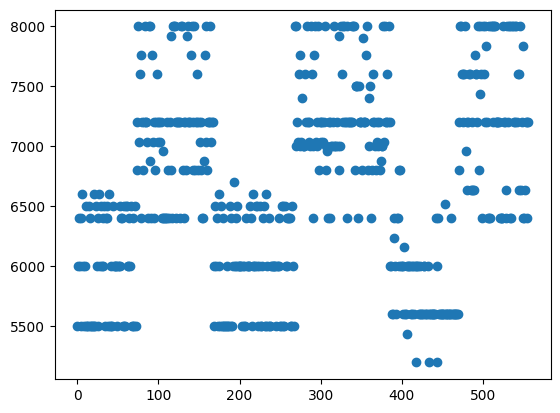

In [6]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(557),Train_Full_feature['Rice Yield (kg/ha)'])

In [7]:
#Train_Full_feature['Rice Yield (kg/ha)'].value_counts()

In [8]:
Test_data = pd.read_csv("Level2_test_data_NDVI22_RVI19.csv")
Test_feature = pd.read_csv("Level2_test_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")
Test_feature = Test_feature.drop(['Field size (ha)', 'Rice Crop Intensity(D=Double, T=Triple)'],axis=1)
print(Test_feature.shape)
Test_vh_vv = pd.read_csv("submission_features_data_vh_vv.csv")
print(Test_vh_vv.shape)
Test_Full = pd.concat([Test_data,Test_feature, Test_vh_vv], axis=1)
print(Test_Full.shape)
Test_Full_feature = Test_Full.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                                     'Date of Harvest'],axis=1)
Test_NDVI_RVI_features = pd.read_csv("Level2_Test_NDVI_RVI_features_corr_permutation_entropy.csv")
Test_VH_VV_NDVI_RVI_features = pd.concat([Test_Full_feature, Test_NDVI_RVI_features], axis=1)
Test_VH_VV_NDVI_RVI_features['Rice Crop Intensity(D=Double, T=Triple)'] = Test_VH_VV_NDVI_RVI_features['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1,'D':0})
Test_X = Test_VH_VV_NDVI_RVI_features.drop(['Predicted Rice Yield (kg/ha)'],axis=1) 
Test_X.columns

(100, 14)
(100, 18)
(100, 81)


Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)', 'ndvi1',
       'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9',
       'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16',
       'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1',
       'rvi2', 'rvi3', 'rvi4', 'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10',
       'rvi11', 'rvi12', 'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18',
       'rvi19', 'Nmean', 'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod',
       'RVImean', 'RVIvar', 'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod',
       'min_vv', 'max_vv', 'range_vv', 'mean_vv', 'correlation_vv',
       'permutation_entropy_vv', 'min_vh', 'max_vh', 'range_vh', 'mean_vh',
       'correlation_vh', 'permutation_entropy_vh', 'min_vv_by_vh',
       'max_vv_by_vh', 'range_vv_by_vh', 'mean_vv_by_vh',
       'correlation_vv_by_vh', 'permutation_entropy_vv_by_vh', 'min_ndvi',
       'max_ndvi', 'range_ndvi', 'm

In [42]:
X = VH_VV_NDVI_RVI_features.drop(['Rice Yield (kg/ha)'],axis=1)
X.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)', 'ndvi1',
       'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9',
       'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16',
       'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1',
       'rvi2', 'rvi3', 'rvi4', 'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10',
       'rvi11', 'rvi12', 'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18',
       'rvi19', 'Nmean', 'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod',
       'RVImean', 'RVIvar', 'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod',
       'min_vv', 'max_vv', 'range_vv', 'mean_vv', 'correlation_vv',
       'permutation_entropy_vv', 'min_vh', 'max_vh', 'range_vh', 'mean_vh',
       'correlation_vh', 'permutation_entropy_vh', 'min_vv_by_vh',
       'max_vv_by_vh', 'range_vv_by_vh', 'mean_vv_by_vh',
       'correlation_vv_by_vh', 'permutation_entropy_vv_by_vh', 'min_ndvi',
       'max_ndvi', 'range_ndvi', 'm

In [43]:
y = Train_data['Rice Yield (kg/ha)']

In [44]:
IMP_Features_Lst = ['permutation_entropy_vv', 'permutation_entropy_vv_by_vh', 'permutation_entropy_vh',
                    'permutation_entropy_ndvi' , 'permutation_entropy_rvi', 'correlation_ndvi',
                    'correlation_rvi','correlation_vh', 'correlation_vv','correlation_vv_by_vh',
                    'Nmax', 'RVImax','max_vv','max_vh', 'ndvi3','Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',]
                    


X_imp = X[IMP_Features_Lst]
X_imp

,permutation_entropy_vv,permutation_entropy_vv_by_vh,permutation_entropy_vh,permutation_entropy_ndvi,permutation_entropy_rvi,correlation_ndvi,correlation_rvi,correlation_vh,correlation_vv,correlation_vv_by_vh,Nmax,RVImax,max_vv,max_vh,ndvi3,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha)
0,0.333963,0.333963,0.333963,0.281894,0.401118,0.853596,0.520075,0.042602,0.621781,0.342336,0.570087,1.298704,0.357296,0.051663,0.378848,1,3.40
1,0.333963,0.310551,0.333963,0.381050,0.401118,0.802596,-0.658225,0.201433,0.186905,-0.212126,0.556371,0.817069,0.294100,0.072512,0.412102,1,2.43
2,0.333963,0.333963,0.333963,0.224760,0.386068,0.857084,0.637547,0.026166,0.200432,0.171531,0.503938,1.298710,0.627878,0.114186,0.503938,0,1.95
3,0.333963,0.333963,0.333963,0.334510,0.401118,0.813600,0.455390,0.192489,0.219432,0.502445,0.552316,1.352689,0.335494,0.082565,0.496026,1,4.30
4,0.389854,0.389854,0.389854,0.381050,0.401118,0.823584,0.694662,-0.039257,-0.002048,0.520591,0.580595,1.316121,0.859671,0.098161,0.357247,0,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.349977,0.349977,0.349977,0.430629,0.401118,0.722432,0.304482,0.073995,0.249518,0.356639,0.607354,1.346688,0.435711,0.048116,0.607354,1,7.80
553,0.349977,0.349977,0.349977,0.430629,0.401118,0.749776,0.509392,-0.053630,0.438803,-0.027531,0.748630,1.374105,0.222888,0.080506,0.748630,1,2.00
554,0.349977,0.349977,0.349977,0.418234,0.401118,0.844358,0.707476,0.350006,0.273595,0.326386,0.766792,1.100254,0.401048,0.114566,0.766792,1,6.20
555,0.349977,0.349977,0.349977,0.405839,0.401118,0.842742,0.433056,0.501659,0.327969,0.194271,0.813530,1.343741,0.321706,0.063610,0.813530,1,3.00


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, shuffle=True, random_state=2023)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200, 300, 400,500],
    'max_depth': [1,2,3,4,5,6,7,8],
    'max_features': ['sqrt',],
    'criterion' :['squared_error',]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters , cv= 5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=1)

In [48]:
print(clf.best_score_)
clf.best_estimator_

0.5602353676518848


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=50,
                      random_state=0)

In [49]:
model = clf.best_estimator_
insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.83
Outsample R2 Score: 0.64


In [50]:
params = pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'], ascending=True)
#params = pd.DataFrame(clf.cv_results_)
params.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.248438,0.031082,0.017922,0.004428,squared_error,7,sqrt,50,"{'criterion': 'squared_error', 'max_depth': 7,...",0.639477,0.610541,0.483967,0.543544,0.523648,0.560235,0.056998,1
28,1.680600,0.047817,0.075310,0.002042,squared_error,5,sqrt,400,"{'criterion': 'squared_error', 'max_depth': 5,...",0.615443,0.614432,0.485181,0.544180,0.535008,0.558849,0.050006,2
29,2.060094,0.010484,0.098728,0.008890,squared_error,5,sqrt,500,"{'criterion': 'squared_error', 'max_depth': 5,...",0.618812,0.615770,0.478659,0.541144,0.536122,0.558101,0.053091,3
37,0.486796,0.039285,0.023188,0.003826,squared_error,7,sqrt,100,"{'criterion': 'squared_error', 'max_depth': 7,...",0.629140,0.605941,0.476055,0.539847,0.530009,0.556198,0.055084,4
27,1.256221,0.036041,0.056359,0.004836,squared_error,5,sqrt,300,"{'criterion': 'squared_error', 'max_depth': 5,...",0.611108,0.612036,0.481701,0.541548,0.533971,0.556073,0.049782,5


In [20]:
sxc = params[params['rank_test_score']==1]['params'].values
sxc

array([{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 400}],
      dtype=object)

In [21]:
regr = RandomForestRegressor(random_state=0, criterion='squared_error', max_depth= 8,min_samples_split= 4,
                             max_features= 'sqrt', n_estimators= 400)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      n_estimators=400, random_state=0)

In [42]:
lst1=regr.feature_names_in_
lst2=regr.feature_importances_
IMP_Features = pd.DataFrame(list(zip(lst1, lst2)))
IMP_Features.columns =[ 'Name', 'Weight']
IMP_Features = IMP_Features.sort_values(by=['Weight'], ascending=False)
IMP_Features_Lst = IMP_Features.head(25)['Name'].values
print(len(IMP_Features_Lst))
IMP_Features_Lst

25


array(['permutation_entropy_vv', 'permutation_entropy_vv_by_vh', 'Nmax',
       'permutation_entropy_vh', 'ndvi3', 'max_ndvi', 'range_ndvi',
       'rvi13', 'ndvi2', 'ndvi18', 'rvi11', 'rvi18', 'correlation_ndvi',
       'ndvi19', 'ndvi8', 'ndvi7', 'ndvi4', 'ndvi6', 'rvi8',
       'permutation_entropy_ndvi', 'ndvi12', 'Nvar', 'ndvi17', 'ndvi11',
       'rvi10'], dtype=object)

In [22]:
insample_predictions = regr.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = regr.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.89
Outsample R2 Score: 0.65


In [54]:
#XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor(random_state=2023,eval_metric= 'mphe')
def huber_approx_obj(preds,dtrain):
    d = preds - dtrain.get_labels()
    h = 1
    scale = 1+ (d/h) **2
    scale_sqrt = np.sqrt(scale)
    grad = d/scale_sqrt
    hess = 1/scale/scale_sqrt
    return grad,hess

parameters = {
    'max_depth':[1,2,3,5] , #range (2, 10, 2)
    'n_estimators': [20,30,50,100,200,250], #range(60, 220, 40)
    'learning_rate': [0.01,0.05], #[0.1, 0.01, 0.05]
    'reg_lambda': [0.1,0.5],
    'reg_alpha': [0.1]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 3,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='mphe', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2023, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [1, 2, 3, 5],
                         'n_estimators': [20, 30, 50, 100, 200, 250],
                         'reg_alpha': [0.1], 'reg_lambda': [0.1, 0.5]},
             scoring='neg_mean_squared_error', verbose=True)

In [55]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mphe', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)

In [56]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.69
Outsample R2 Score: 0.60


In [62]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor( criterion='squared_error', splitter='best',
                            random_state=2023, max_leaf_nodes=None, ccp_alpha=0.0)

parameters = {
    'max_depth':[1,2,3,5,10] , #range (2, 10, 2)
    'min_samples_split': [2,3,5,10,12,14],
    'min_samples_leaf': [1,2,3,5,10],#range(60, 220, 40)
    
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 3,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=2023),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10, 12, 14]},
             scoring='neg_mean_squared_error', verbose=True)

In [63]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=2, random_state=2023)

In [64]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.58
Outsample R2 Score: 0.62


In [60]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [61]:
model = lr

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.52
Outsample R2 Score: 0.53


In [54]:
#catboost
import catboost as cb

model = cb.CatBoostRegressor(loss_function='RMSE',verbose=1) #R2

    
    
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'early_stopping_rounds':[50,100],
         'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, X_train,y_train)

0:	learn: 6449.0843827	test: 6674.8968593	best: 6674.8968593 (0)	total: 28.8ms	remaining: 2.85s
1:	learn: 6258.9363331	test: 6485.0217318	best: 6485.0217318 (1)	total: 30.4ms	remaining: 1.49s
2:	learn: 6074.5736212	test: 6300.5451141	best: 6300.5451141 (2)	total: 31.4ms	remaining: 1.01s
3:	learn: 5895.8305150	test: 6121.6304623	best: 6121.6304623 (3)	total: 32.3ms	remaining: 775ms
4:	learn: 5722.5311573	test: 5948.2980133	best: 5948.2980133 (4)	total: 33.2ms	remaining: 630ms
5:	learn: 5554.5294234	test: 5780.0967827	best: 5780.0967827 (5)	total: 34.1ms	remaining: 534ms
6:	learn: 5391.6063713	test: 5617.6145608	best: 5617.6145608 (6)	total: 34.9ms	remaining: 464ms
7:	learn: 5233.6859893	test: 5459.3079367	best: 5459.3079367 (7)	total: 35.8ms	remaining: 412ms
8:	learn: 5080.5262895	test: 5305.1383157	best: 5305.1383157 (8)	total: 36.7ms	remaining: 371ms
9:	learn: 4931.9994096	test: 5155.7637560	best: 5155.7637560 (9)	total: 37.6ms	remaining: 338ms
10:	learn: 4787.8953619	test: 5011.60433

1:	learn: 6260.3599670	test: 6486.6284826	best: 6486.6284826 (1)	total: 2.95ms	remaining: 145ms
2:	learn: 6076.6347520	test: 6303.8326222	best: 6303.8326222 (2)	total: 4.12ms	remaining: 133ms
3:	learn: 5898.5149662	test: 6125.3897173	best: 6125.3897173 (3)	total: 5.08ms	remaining: 122ms
4:	learn: 5725.8019108	test: 5952.5949620	best: 5952.5949620 (4)	total: 6.19ms	remaining: 118ms
5:	learn: 5558.3462226	test: 5784.9321002	best: 5784.9321002 (5)	total: 7.29ms	remaining: 114ms
6:	learn: 5395.9294001	test: 5622.9943191	best: 5622.9943191 (6)	total: 8.29ms	remaining: 110ms
7:	learn: 5238.4855267	test: 5465.3508615	best: 5465.3508615 (7)	total: 9.2ms	remaining: 106ms
8:	learn: 5085.8008768	test: 5311.9726944	best: 5311.9726944 (8)	total: 10.1ms	remaining: 102ms
9:	learn: 4937.7013266	test: 5163.3637445	best: 5163.3637445 (9)	total: 11.1ms	remaining: 99.7ms
10:	learn: 4793.9706097	test: 5019.6077205	best: 5019.6077205 (10)	total: 12ms	remaining: 97.1ms
11:	learn: 4654.8007251	test: 4879.5516

80:	learn: 409.2288424	test: 586.2211238	best: 582.8946848 (70)	total: 84.5ms	remaining: 19.8ms
81:	learn: 407.2776718	test: 585.7238684	best: 582.8946848 (70)	total: 86ms	remaining: 18.9ms
82:	learn: 405.2658106	test: 585.3764618	best: 582.8946848 (70)	total: 87.5ms	remaining: 17.9ms
83:	learn: 402.6395876	test: 583.3177866	best: 582.8946848 (70)	total: 89.3ms	remaining: 17ms
84:	learn: 399.9554245	test: 584.1329474	best: 582.8946848 (70)	total: 90.4ms	remaining: 16ms
85:	learn: 398.7042901	test: 584.1572144	best: 582.8946848 (70)	total: 92.1ms	remaining: 15ms
86:	learn: 396.5937708	test: 585.3793769	best: 582.8946848 (70)	total: 93ms	remaining: 13.9ms
87:	learn: 395.4888418	test: 584.4819365	best: 582.8946848 (70)	total: 94.2ms	remaining: 12.8ms
88:	learn: 393.1300199	test: 585.2894250	best: 582.8946848 (70)	total: 95.2ms	remaining: 11.8ms
89:	learn: 391.6852297	test: 585.0546937	best: 582.8946848 (70)	total: 96.3ms	remaining: 10.7ms
90:	learn: 390.2236006	test: 584.9923928	best: 582

49:	learn: 476.6842827	test: 602.1634211	best: 602.1634211 (49)	total: 66.3ms	remaining: 66.3ms
50:	learn: 473.6799848	test: 600.2796698	best: 600.2796698 (50)	total: 67.7ms	remaining: 65ms
51:	learn: 469.9733664	test: 598.6036395	best: 598.6036395 (51)	total: 68.9ms	remaining: 63.6ms
52:	learn: 466.6818232	test: 593.5689478	best: 593.5689478 (52)	total: 70ms	remaining: 62.1ms
53:	learn: 464.5209548	test: 591.7094589	best: 591.7094589 (53)	total: 71.4ms	remaining: 60.8ms
54:	learn: 461.8545440	test: 592.0974723	best: 591.7094589 (53)	total: 72.6ms	remaining: 59.4ms
55:	learn: 459.8284963	test: 591.9369267	best: 591.7094589 (53)	total: 73.6ms	remaining: 57.8ms
56:	learn: 458.0556804	test: 590.9683284	best: 590.9683284 (56)	total: 74.6ms	remaining: 56.3ms
57:	learn: 456.2652154	test: 590.1380638	best: 590.1380638 (57)	total: 75.8ms	remaining: 54.9ms
58:	learn: 454.1965341	test: 590.6640191	best: 590.1380638 (57)	total: 76.8ms	remaining: 53.4ms
59:	learn: 451.6393581	test: 588.3848592	bes

28:	learn: 677.9669626	test: 835.2508974	best: 835.2508974 (28)	total: 36.7ms	remaining: 89.8ms
29:	learn: 652.2908630	test: 804.9918030	best: 804.9918030 (29)	total: 37.7ms	remaining: 88ms
30:	learn: 630.6526455	test: 780.3463662	best: 780.3463662 (30)	total: 39ms	remaining: 86.9ms
31:	learn: 611.1110289	test: 758.7613740	best: 758.7613740 (31)	total: 40.3ms	remaining: 85.5ms
32:	learn: 593.9360917	test: 738.9166308	best: 738.9166308 (32)	total: 41.3ms	remaining: 83.9ms
33:	learn: 579.3066948	test: 724.2345174	best: 724.2345174 (33)	total: 42.4ms	remaining: 82.3ms
34:	learn: 565.6225626	test: 708.3017218	best: 708.3017218 (34)	total: 43.5ms	remaining: 80.8ms
35:	learn: 558.4052837	test: 698.5271475	best: 698.5271475 (35)	total: 44.4ms	remaining: 79ms
36:	learn: 548.4634027	test: 686.1191998	best: 686.1191998 (36)	total: 45.5ms	remaining: 77.5ms
37:	learn: 540.5220900	test: 680.0557701	best: 680.0557701 (37)	total: 46.6ms	remaining: 76ms
38:	learn: 529.8090493	test: 667.5318368	best: 6

89:	learn: 722.0964946	test: 866.2144053	best: 866.2144053 (89)	total: 124ms	remaining: 82.8ms
90:	learn: 713.6340320	test: 857.8248806	best: 857.8248806 (90)	total: 128ms	remaining: 83.1ms
91:	learn: 704.1613283	test: 847.8742770	best: 847.8742770 (91)	total: 130ms	remaining: 81.9ms
92:	learn: 695.4902761	test: 838.2940520	best: 838.2940520 (92)	total: 131ms	remaining: 80.3ms
93:	learn: 686.1084114	test: 827.3090597	best: 827.3090597 (93)	total: 132ms	remaining: 78.8ms
94:	learn: 676.8478757	test: 816.3834715	best: 816.3834715 (94)	total: 133ms	remaining: 77.2ms
95:	learn: 668.1982291	test: 806.9985583	best: 806.9985583 (95)	total: 135ms	remaining: 75.8ms
96:	learn: 660.1163081	test: 798.0220421	best: 798.0220421 (96)	total: 137ms	remaining: 74.9ms
97:	learn: 653.8553049	test: 790.5022254	best: 790.5022254 (97)	total: 140ms	remaining: 74.1ms
98:	learn: 646.9743561	test: 782.9521902	best: 782.9521902 (98)	total: 141ms	remaining: 72.7ms
99:	learn: 639.5866210	test: 774.2966393	best: 774

50:	learn: 473.6018320	test: 589.7260976	best: 589.7260976 (50)	total: 80.7ms	remaining: 157ms
51:	learn: 469.1227003	test: 588.5395409	best: 588.5395409 (51)	total: 81.9ms	remaining: 154ms
52:	learn: 466.3052051	test: 584.8140788	best: 584.8140788 (52)	total: 83.1ms	remaining: 152ms
53:	learn: 462.5003151	test: 579.3101320	best: 579.3101320 (53)	total: 84.4ms	remaining: 150ms
54:	learn: 459.8658125	test: 578.9633554	best: 578.9633554 (54)	total: 85.3ms	remaining: 147ms
55:	learn: 457.9197365	test: 579.1536827	best: 578.9633554 (54)	total: 86.3ms	remaining: 145ms
56:	learn: 456.1644233	test: 578.8125456	best: 578.8125456 (56)	total: 87.7ms	remaining: 143ms
57:	learn: 454.1224193	test: 578.4840711	best: 578.4840711 (57)	total: 91.2ms	remaining: 145ms
58:	learn: 451.9820532	test: 579.1640457	best: 578.4840711 (57)	total: 93.6ms	remaining: 144ms
59:	learn: 449.1858971	test: 576.6677639	best: 576.6677639 (59)	total: 95.4ms	remaining: 143ms
60:	learn: 447.0457816	test: 573.7209894	best: 573

48:	learn: 1662.0687555	test: 1857.2295137	best: 1857.2295137 (48)	total: 64.4ms	remaining: 133ms
49:	learn: 1621.4143645	test: 1816.0569452	best: 1816.0569452 (49)	total: 68.7ms	remaining: 137ms
50:	learn: 1581.8586929	test: 1774.4393483	best: 1774.4393483 (50)	total: 69.9ms	remaining: 136ms
51:	learn: 1544.2118226	test: 1735.5288999	best: 1735.5288999 (51)	total: 70.9ms	remaining: 134ms
52:	learn: 1507.8050111	test: 1698.0118492	best: 1698.0118492 (52)	total: 71.8ms	remaining: 131ms
53:	learn: 1472.4729550	test: 1660.9592965	best: 1660.9592965 (53)	total: 72.7ms	remaining: 129ms
54:	learn: 1435.3670569	test: 1622.8633806	best: 1622.8633806 (54)	total: 73.5ms	remaining: 127ms
55:	learn: 1402.8763116	test: 1589.8629629	best: 1589.8629629 (55)	total: 74.5ms	remaining: 125ms
56:	learn: 1371.0298223	test: 1557.4517710	best: 1557.4517710 (56)	total: 75.3ms	remaining: 123ms
57:	learn: 1340.9407066	test: 1525.7714571	best: 1525.7714571 (57)	total: 76.2ms	remaining: 121ms
58:	learn: 1308.8472

16:	learn: 1323.2234981	test: 1502.5719995	best: 1502.5719995 (16)	total: 31.3ms	remaining: 245ms
17:	learn: 1215.7292045	test: 1385.9791998	best: 1385.9791998 (17)	total: 32.5ms	remaining: 238ms
18:	learn: 1122.7206213	test: 1296.1870958	best: 1296.1870958 (18)	total: 33.5ms	remaining: 231ms
19:	learn: 1050.6599750	test: 1218.6467322	best: 1218.6467322 (19)	total: 34.4ms	remaining: 224ms
20:	learn: 979.0051228	test: 1147.2970807	best: 1147.2970807 (20)	total: 35.4ms	remaining: 217ms
21:	learn: 911.5324059	test: 1074.0360035	best: 1074.0360035 (21)	total: 36.3ms	remaining: 211ms
22:	learn: 864.7620909	test: 1023.7474645	best: 1023.7474645 (22)	total: 37.4ms	remaining: 207ms
23:	learn: 817.8493156	test: 974.2207459	best: 974.2207459 (23)	total: 38.3ms	remaining: 201ms
24:	learn: 781.9174379	test: 934.9621141	best: 934.9621141 (24)	total: 39.1ms	remaining: 196ms
25:	learn: 740.6749592	test: 888.7149973	best: 888.7149973 (25)	total: 40ms	remaining: 191ms
26:	learn: 707.6458283	test: 856.4

135:	learn: 336.4884411	test: 574.2528622	best: 574.2528622 (135)	total: 225ms	remaining: 23.1ms
136:	learn: 334.9571474	test: 574.2175002	best: 574.2175002 (136)	total: 226ms	remaining: 21.4ms
137:	learn: 334.0085613	test: 575.3208656	best: 574.2175002 (136)	total: 227ms	remaining: 19.7ms
138:	learn: 333.1779494	test: 574.7937265	best: 574.2175002 (136)	total: 228ms	remaining: 18ms
139:	learn: 332.1366819	test: 574.7555848	best: 574.2175002 (136)	total: 229ms	remaining: 16.3ms
140:	learn: 330.7124954	test: 573.8559203	best: 573.8559203 (140)	total: 230ms	remaining: 14.7ms
141:	learn: 329.6487961	test: 573.4936085	best: 573.4936085 (141)	total: 231ms	remaining: 13ms
142:	learn: 329.0480624	test: 573.6229829	best: 573.4936085 (141)	total: 231ms	remaining: 11.3ms
143:	learn: 328.0982008	test: 573.7229190	best: 573.4936085 (141)	total: 232ms	remaining: 9.68ms
144:	learn: 327.5697275	test: 573.9299324	best: 573.4936085 (141)	total: 233ms	remaining: 8.04ms
145:	learn: 326.0179935	test: 573.

111:	learn: 582.3212609	test: 716.6615262	best: 716.6615262 (111)	total: 180ms	remaining: 61ms
112:	learn: 579.1880588	test: 713.0637510	best: 713.0637510 (112)	total: 181ms	remaining: 59.2ms
113:	learn: 573.6084092	test: 706.9035392	best: 706.9035392 (113)	total: 182ms	remaining: 57.5ms
114:	learn: 569.6611464	test: 702.0845844	best: 702.0845844 (114)	total: 183ms	remaining: 55.8ms
115:	learn: 565.2945566	test: 697.4233192	best: 697.4233192 (115)	total: 184ms	remaining: 54ms
116:	learn: 561.3871424	test: 693.7380917	best: 693.7380917 (116)	total: 185ms	remaining: 52.3ms
117:	learn: 556.7852308	test: 687.9024590	best: 687.9024590 (117)	total: 186ms	remaining: 50.6ms
118:	learn: 553.7526825	test: 684.3004425	best: 684.3004425 (118)	total: 188ms	remaining: 48.8ms
119:	learn: 550.6873640	test: 681.7848757	best: 681.7848757 (119)	total: 189ms	remaining: 47.1ms
120:	learn: 548.3908270	test: 678.8615930	best: 678.8615930 (120)	total: 190ms	remaining: 45.4ms
121:	learn: 545.5523102	test: 675.

105:	learn: 369.8855293	test: 571.0860446	best: 569.6091264 (100)	total: 124ms	remaining: 51.5ms
106:	learn: 368.0236284	test: 569.0766481	best: 569.0766481 (106)	total: 126ms	remaining: 50.4ms
107:	learn: 365.5867627	test: 569.3517695	best: 569.0766481 (106)	total: 127ms	remaining: 49.3ms
108:	learn: 364.4347855	test: 569.4921012	best: 569.0766481 (106)	total: 128ms	remaining: 48ms
109:	learn: 363.1237608	test: 569.6150290	best: 569.0766481 (106)	total: 129ms	remaining: 46.8ms
110:	learn: 362.3756652	test: 569.6638856	best: 569.0766481 (106)	total: 130ms	remaining: 45.7ms
111:	learn: 361.4910538	test: 569.6092306	best: 569.0766481 (106)	total: 131ms	remaining: 44.5ms
112:	learn: 360.5453802	test: 569.8494714	best: 569.0766481 (106)	total: 132ms	remaining: 43.2ms
113:	learn: 359.3711222	test: 568.8036266	best: 568.8036266 (113)	total: 133ms	remaining: 41.9ms
114:	learn: 358.3088007	test: 568.7028984	best: 568.7028984 (114)	total: 134ms	remaining: 40.7ms
115:	learn: 357.8355540	test: 56

131:	learn: 530.4024707	test: 662.1013455	best: 662.1013455 (131)	total: 140ms	remaining: 19.1ms
132:	learn: 528.5416684	test: 660.0673660	best: 660.0673660 (132)	total: 142ms	remaining: 18.1ms
133:	learn: 526.9804522	test: 658.3276816	best: 658.3276816 (133)	total: 143ms	remaining: 17.1ms
134:	learn: 525.1579671	test: 656.0962014	best: 656.0962014 (134)	total: 144ms	remaining: 16ms
135:	learn: 523.6949036	test: 654.9440664	best: 654.9440664 (135)	total: 145ms	remaining: 14.9ms
136:	learn: 521.8431482	test: 652.3329704	best: 652.3329704 (136)	total: 146ms	remaining: 13.9ms
137:	learn: 520.4463820	test: 650.4513134	best: 650.4513134 (137)	total: 147ms	remaining: 12.8ms
138:	learn: 517.7203680	test: 647.5426325	best: 647.5426325 (138)	total: 148ms	remaining: 11.7ms
139:	learn: 515.9034343	test: 645.9121491	best: 645.9121491 (139)	total: 149ms	remaining: 10.7ms
140:	learn: 514.5365148	test: 644.0675992	best: 644.0675992 (140)	total: 150ms	remaining: 9.59ms
141:	learn: 512.7810288	test: 64

130:	learn: 353.1531139	test: 586.3754131	best: 584.1735694 (119)	total: 174ms	remaining: 25.2ms
131:	learn: 352.8698947	test: 586.4273587	best: 584.1735694 (119)	total: 176ms	remaining: 24ms
132:	learn: 352.6620937	test: 586.0425085	best: 584.1735694 (119)	total: 177ms	remaining: 22.6ms
133:	learn: 351.5470925	test: 586.3315610	best: 584.1735694 (119)	total: 178ms	remaining: 21.3ms
134:	learn: 351.0507279	test: 585.8456626	best: 584.1735694 (119)	total: 179ms	remaining: 19.9ms
135:	learn: 350.5690504	test: 585.9391364	best: 584.1735694 (119)	total: 180ms	remaining: 18.5ms
136:	learn: 349.5182711	test: 584.9707201	best: 584.1735694 (119)	total: 181ms	remaining: 17.2ms
137:	learn: 348.8654843	test: 585.1707372	best: 584.1735694 (119)	total: 182ms	remaining: 15.8ms
138:	learn: 348.6325574	test: 585.3177891	best: 584.1735694 (119)	total: 183ms	remaining: 14.5ms
139:	learn: 347.0537987	test: 584.0668918	best: 584.0668918 (139)	total: 184ms	remaining: 13.1ms
140:	learn: 345.2423881	test: 58

128:	learn: 528.1546533	test: 651.8659282	best: 651.8659282 (128)	total: 180ms	remaining: 99.1ms
129:	learn: 526.3420253	test: 649.5663630	best: 649.5663630 (129)	total: 181ms	remaining: 97.6ms
130:	learn: 524.1993181	test: 647.4145635	best: 647.4145635 (130)	total: 183ms	remaining: 96.1ms
131:	learn: 522.5222603	test: 644.9202550	best: 644.9202550 (131)	total: 183ms	remaining: 94.5ms
132:	learn: 519.9608301	test: 642.0681340	best: 642.0681340 (132)	total: 185ms	remaining: 93ms
133:	learn: 518.4784421	test: 639.1297096	best: 639.1297096 (133)	total: 185ms	remaining: 91.3ms
134:	learn: 516.8361975	test: 637.2912278	best: 637.2912278 (134)	total: 186ms	remaining: 89.7ms
135:	learn: 515.3659761	test: 636.3142161	best: 636.3142161 (135)	total: 187ms	remaining: 88.1ms
136:	learn: 513.8658786	test: 636.1741063	best: 636.1741063 (136)	total: 188ms	remaining: 86.5ms
137:	learn: 512.5902687	test: 634.5443577	best: 634.5443577 (137)	total: 189ms	remaining: 84.9ms
138:	learn: 510.0476222	test: 63

91:	learn: 383.5443841	test: 560.9119306	best: 560.9119306 (91)	total: 117ms	remaining: 137ms
92:	learn: 380.8053959	test: 561.5766954	best: 560.9119306 (91)	total: 118ms	remaining: 136ms
93:	learn: 379.6668577	test: 561.0974092	best: 560.9119306 (91)	total: 119ms	remaining: 135ms
94:	learn: 377.9790048	test: 561.0615253	best: 560.9119306 (91)	total: 120ms	remaining: 133ms
95:	learn: 376.1190545	test: 561.2600644	best: 560.9119306 (91)	total: 121ms	remaining: 131ms
96:	learn: 374.3433211	test: 561.8559403	best: 560.9119306 (91)	total: 122ms	remaining: 130ms
97:	learn: 372.9900106	test: 562.2337523	best: 560.9119306 (91)	total: 123ms	remaining: 128ms
98:	learn: 371.1539422	test: 563.2716215	best: 560.9119306 (91)	total: 124ms	remaining: 127ms
99:	learn: 369.9535033	test: 562.7980803	best: 560.9119306 (91)	total: 125ms	remaining: 125ms
100:	learn: 367.6614017	test: 560.9310033	best: 560.9119306 (91)	total: 126ms	remaining: 123ms
101:	learn: 366.6138871	test: 560.3220843	best: 560.3220843

36:	learn: 2277.5795499	test: 2487.1467230	best: 2487.1467230 (36)	total: 53.7ms	remaining: 237ms
37:	learn: 2216.5183334	test: 2424.6910461	best: 2424.6910461 (37)	total: 57.7ms	remaining: 246ms
38:	learn: 2157.7986901	test: 2364.8674583	best: 2364.8674583 (38)	total: 58.9ms	remaining: 243ms
39:	learn: 2101.0090161	test: 2307.4926913	best: 2307.4926913 (39)	total: 60.1ms	remaining: 240ms
40:	learn: 2045.7013068	test: 2251.7963991	best: 2251.7963991 (40)	total: 61.1ms	remaining: 237ms
41:	learn: 1991.7379188	test: 2195.7972582	best: 2195.7972582 (41)	total: 62ms	remaining: 233ms
42:	learn: 1940.4549402	test: 2144.3315865	best: 2144.3315865 (42)	total: 62.8ms	remaining: 229ms
43:	learn: 1890.4582555	test: 2093.9732230	best: 2093.9732230 (43)	total: 63.7ms	remaining: 226ms
44:	learn: 1842.1896795	test: 2044.3099068	best: 2044.3099068 (44)	total: 64.6ms	remaining: 222ms
45:	learn: 1795.5922051	test: 1996.4078262	best: 1996.4078262 (45)	total: 65.4ms	remaining: 219ms
46:	learn: 1750.472364

169:	learn: 473.8308382	test: 599.0781463	best: 599.0781463 (169)	total: 266ms	remaining: 46.9ms
170:	learn: 473.3611856	test: 599.0693135	best: 599.0693135 (170)	total: 267ms	remaining: 45.3ms
171:	learn: 472.2514285	test: 598.0653048	best: 598.0653048 (171)	total: 269ms	remaining: 43.7ms
172:	learn: 471.6273637	test: 597.8797817	best: 597.8797817 (172)	total: 270ms	remaining: 42.1ms
173:	learn: 470.4777058	test: 597.0335099	best: 597.0335099 (173)	total: 271ms	remaining: 40.5ms
174:	learn: 469.7939139	test: 596.3109450	best: 596.3109450 (174)	total: 272ms	remaining: 38.9ms
175:	learn: 468.4971694	test: 595.5798332	best: 595.5798332 (175)	total: 273ms	remaining: 37.3ms
176:	learn: 467.8424927	test: 594.9573952	best: 594.9573952 (176)	total: 274ms	remaining: 35.6ms
177:	learn: 467.0367266	test: 594.5645021	best: 594.5645021 (177)	total: 276ms	remaining: 34.1ms
178:	learn: 465.9663529	test: 594.4360003	best: 594.4360003 (178)	total: 279ms	remaining: 32.7ms
179:	learn: 465.2900604	test: 

82:	learn: 405.2658106	test: 585.3764618	best: 582.8946848 (70)	total: 144ms	remaining: 203ms
83:	learn: 402.6395876	test: 583.3177866	best: 582.8946848 (70)	total: 146ms	remaining: 201ms
84:	learn: 399.9554245	test: 584.1329474	best: 582.8946848 (70)	total: 147ms	remaining: 199ms
85:	learn: 398.7042901	test: 584.1572144	best: 582.8946848 (70)	total: 148ms	remaining: 196ms
86:	learn: 396.5937708	test: 585.3793769	best: 582.8946848 (70)	total: 149ms	remaining: 194ms
87:	learn: 395.4888418	test: 584.4819365	best: 582.8946848 (70)	total: 151ms	remaining: 192ms
88:	learn: 393.1300199	test: 585.2894250	best: 582.8946848 (70)	total: 152ms	remaining: 189ms
89:	learn: 391.6852297	test: 585.0546937	best: 582.8946848 (70)	total: 153ms	remaining: 187ms
90:	learn: 390.2236006	test: 584.9923928	best: 582.8946848 (70)	total: 154ms	remaining: 184ms
91:	learn: 389.0075045	test: 585.0340712	best: 582.8946848 (70)	total: 155ms	remaining: 182ms
92:	learn: 388.0691367	test: 585.0911020	best: 582.8946848 (

49:	learn: 1633.7454876	test: 1832.3871196	best: 1832.3871196 (49)	total: 59ms	remaining: 177ms
50:	learn: 1594.0181830	test: 1790.6045793	best: 1790.6045793 (50)	total: 60.2ms	remaining: 176ms
51:	learn: 1556.1922988	test: 1751.5144000	best: 1751.5144000 (51)	total: 61.2ms	remaining: 174ms
52:	learn: 1519.5672643	test: 1713.9174781	best: 1713.9174781 (52)	total: 62.2ms	remaining: 173ms
53:	learn: 1484.0243340	test: 1676.6300831	best: 1676.6300831 (53)	total: 63.2ms	remaining: 171ms
54:	learn: 1446.7825620	test: 1638.3706027	best: 1638.3706027 (54)	total: 64.5ms	remaining: 170ms
55:	learn: 1414.1359715	test: 1605.2405808	best: 1605.2405808 (55)	total: 65.7ms	remaining: 169ms
56:	learn: 1382.1573726	test: 1572.7152130	best: 1572.7152130 (56)	total: 66.6ms	remaining: 167ms
57:	learn: 1351.8763955	test: 1540.9502763	best: 1540.9502763 (57)	total: 67.4ms	remaining: 165ms
58:	learn: 1319.6549628	test: 1509.4579474	best: 1509.4579474 (58)	total: 68.3ms	remaining: 163ms
59:	learn: 1291.184800

41:	learn: 511.2432003	test: 630.5594054	best: 630.5594054 (41)	total: 41.4ms	remaining: 156ms
42:	learn: 506.3343724	test: 628.6246139	best: 628.6246139 (42)	total: 43ms	remaining: 157ms
43:	learn: 499.6510790	test: 621.8605031	best: 621.8605031 (43)	total: 44.2ms	remaining: 157ms
44:	learn: 495.9824817	test: 618.7468571	best: 618.7468571 (44)	total: 45.3ms	remaining: 156ms
45:	learn: 491.9690469	test: 613.0003997	best: 613.0003997 (45)	total: 46.5ms	remaining: 156ms
46:	learn: 489.2243425	test: 608.2463479	best: 608.2463479 (46)	total: 47.5ms	remaining: 155ms
47:	learn: 486.0979104	test: 605.6668753	best: 605.6668753 (47)	total: 48.4ms	remaining: 153ms
48:	learn: 480.2904960	test: 605.9439630	best: 605.6668753 (47)	total: 49.3ms	remaining: 152ms
49:	learn: 476.6842827	test: 602.1634211	best: 602.1634211 (49)	total: 50.1ms	remaining: 150ms
50:	learn: 473.6799848	test: 600.2796698	best: 600.2796698 (50)	total: 51ms	remaining: 149ms
51:	learn: 469.9733664	test: 598.6036395	best: 598.603

40:	learn: 2111.9451248	test: 2333.2279887	best: 2333.2279887 (40)	total: 40.7ms	remaining: 158ms
41:	learn: 2057.0409817	test: 2276.1976151	best: 2276.1976151 (41)	total: 42.2ms	remaining: 159ms
42:	learn: 2005.2310811	test: 2223.9055201	best: 2223.9055201 (42)	total: 43.4ms	remaining: 158ms
43:	learn: 1954.5640035	test: 2173.0978273	best: 2173.0978273 (43)	total: 44.4ms	remaining: 157ms
44:	learn: 1905.6562236	test: 2122.6605873	best: 2122.6605873 (44)	total: 46.2ms	remaining: 159ms
45:	learn: 1858.1553424	test: 2074.5057435	best: 2074.5057435 (45)	total: 47.4ms	remaining: 159ms
46:	learn: 1812.4885584	test: 2027.2566829	best: 2027.2566829 (46)	total: 48.4ms	remaining: 158ms
47:	learn: 1768.3440178	test: 1982.5043975	best: 1982.5043975 (47)	total: 50.2ms	remaining: 159ms
48:	learn: 1722.3860534	test: 1933.2281314	best: 1933.2281314 (48)	total: 52ms	remaining: 160ms
49:	learn: 1681.0148860	test: 1891.3091931	best: 1891.3091931 (49)	total: 53.8ms	remaining: 161ms
50:	learn: 1640.709039

13:	learn: 1753.9625290	test: 1976.0136564	best: 1976.0136564 (13)	total: 12.8ms	remaining: 169ms
14:	learn: 1615.0595077	test: 1830.5944484	best: 1830.5944484 (14)	total: 14ms	remaining: 172ms
15:	learn: 1491.5289676	test: 1703.5068794	best: 1703.5068794 (15)	total: 15ms	remaining: 172ms
16:	learn: 1375.0535348	test: 1582.4180425	best: 1582.4180425 (16)	total: 16.1ms	remaining: 173ms
17:	learn: 1263.7436047	test: 1462.3184291	best: 1462.3184291 (17)	total: 17ms	remaining: 172ms
18:	learn: 1170.1101138	test: 1368.1407555	best: 1368.1407555 (18)	total: 17.9ms	remaining: 170ms
19:	learn: 1094.0592534	test: 1286.1707332	best: 1286.1707332 (19)	total: 18.8ms	remaining: 169ms
20:	learn: 1019.6853944	test: 1211.7766552	best: 1211.7766552 (20)	total: 19.7ms	remaining: 168ms
21:	learn: 961.7339947	test: 1146.9182824	best: 1146.9182824 (21)	total: 20.6ms	remaining: 166ms
22:	learn: 912.5874604	test: 1093.3896833	best: 1093.3896833 (22)	total: 21.4ms	remaining: 165ms
23:	learn: 863.0514519	test:

187:	learn: 300.9642979	test: 569.6810141	best: 569.6810141 (187)	total: 212ms	remaining: 13.5ms
188:	learn: 299.9231530	test: 570.0502479	best: 569.6810141 (187)	total: 215ms	remaining: 12.5ms
189:	learn: 299.5298416	test: 569.9743912	best: 569.6810141 (187)	total: 217ms	remaining: 11.4ms
190:	learn: 298.5587934	test: 568.2092952	best: 568.2092952 (190)	total: 218ms	remaining: 10.3ms
191:	learn: 298.3019750	test: 568.0280397	best: 568.0280397 (191)	total: 219ms	remaining: 9.12ms
192:	learn: 297.5623243	test: 568.2149646	best: 568.0280397 (191)	total: 220ms	remaining: 7.98ms
193:	learn: 296.8815530	test: 568.0888588	best: 568.0280397 (191)	total: 222ms	remaining: 6.86ms
194:	learn: 295.8875868	test: 567.7109449	best: 567.7109449 (194)	total: 223ms	remaining: 5.71ms
195:	learn: 294.9519838	test: 567.8516357	best: 567.7109449 (194)	total: 224ms	remaining: 4.57ms
196:	learn: 294.3511871	test: 568.0644926	best: 567.7109449 (194)	total: 225ms	remaining: 3.42ms
197:	learn: 294.1138084	test: 

18:	learn: 1116.6087550	test: 1284.8286044	best: 1284.8286044 (18)	total: 29.4ms	remaining: 125ms
19:	learn: 1045.1036634	test: 1207.9026283	best: 1207.9026283 (19)	total: 30.7ms	remaining: 123ms
20:	learn: 973.8730695	test: 1137.0204568	best: 1137.0204568 (20)	total: 32ms	remaining: 120ms
21:	learn: 906.7203607	test: 1064.3598093	best: 1064.3598093 (21)	total: 33ms	remaining: 117ms
22:	learn: 860.3688087	test: 1014.5404534	best: 1014.5404534 (22)	total: 33.9ms	remaining: 113ms
23:	learn: 813.9461970	test: 965.6053690	best: 965.6053690 (23)	total: 34.8ms	remaining: 110ms
24:	learn: 778.4185078	test: 926.8543921	best: 926.8543921 (24)	total: 35.9ms	remaining: 108ms
25:	learn: 737.5259996	test: 881.0961193	best: 881.0961193 (25)	total: 36.7ms	remaining: 105ms
26:	learn: 702.2517243	test: 840.2498317	best: 840.2498317 (26)	total: 37.7ms	remaining: 102ms
27:	learn: 672.4944535	test: 806.9976519	best: 806.9976519 (27)	total: 38.6ms	remaining: 99.2ms
28:	learn: 651.4960393	test: 781.5479389	

88:	learn: 738.7164110	test: 886.5659033	best: 886.5659033 (88)	total: 108ms	remaining: 13.3ms
89:	learn: 727.7932805	test: 874.2027227	best: 874.2027227 (89)	total: 109ms	remaining: 12.1ms
90:	learn: 719.2476590	test: 865.7140357	best: 865.7140357 (90)	total: 111ms	remaining: 10.9ms
91:	learn: 709.6335075	test: 855.6170003	best: 855.6170003 (91)	total: 112ms	remaining: 9.71ms
92:	learn: 700.8669333	test: 845.9213643	best: 845.9213643 (92)	total: 113ms	remaining: 8.5ms
93:	learn: 690.6784377	test: 834.0411673	best: 834.0411673 (93)	total: 114ms	remaining: 7.27ms
94:	learn: 681.3992134	test: 823.6827332	best: 823.6827332 (94)	total: 115ms	remaining: 6.04ms
95:	learn: 672.5864046	test: 814.0914314	best: 814.0914314 (95)	total: 116ms	remaining: 4.82ms
96:	learn: 663.9311808	test: 804.0653366	best: 804.0653366 (96)	total: 117ms	remaining: 3.61ms
97:	learn: 657.3577481	test: 796.5879590	best: 796.5879590 (97)	total: 118ms	remaining: 2.4ms
98:	learn: 650.3391292	test: 788.8821246	best: 788.8

62:	learn: 1202.3454872	test: 1388.8778488	best: 1388.8778488 (62)	total: 67.9ms	remaining: 39.9ms
63:	learn: 1176.5984989	test: 1362.5422485	best: 1362.5422485 (63)	total: 69.3ms	remaining: 39ms
64:	learn: 1151.6322666	test: 1337.2218509	best: 1337.2218509 (64)	total: 70.4ms	remaining: 37.9ms
65:	learn: 1124.7725789	test: 1308.0949973	best: 1308.0949973 (65)	total: 71.8ms	remaining: 37ms
66:	learn: 1103.1764175	test: 1284.9942795	best: 1284.9942795 (66)	total: 72.9ms	remaining: 35.9ms
67:	learn: 1078.2885807	test: 1257.6856071	best: 1257.6856071 (67)	total: 73.8ms	remaining: 34.7ms
68:	learn: 1053.8266215	test: 1230.1609402	best: 1230.1609402 (68)	total: 74.7ms	remaining: 33.6ms
69:	learn: 1034.2413649	test: 1209.2859441	best: 1209.2859441 (69)	total: 75.6ms	remaining: 32.4ms
70:	learn: 1013.0834335	test: 1187.6018813	best: 1187.6018813 (70)	total: 77.2ms	remaining: 31.5ms
71:	learn: 995.3430796	test: 1168.8579135	best: 1168.8579135 (71)	total: 78.3ms	remaining: 30.4ms
72:	learn: 974.

11:	learn: 4702.3385225	test: 4937.7874117	best: 4937.7874117 (11)	total: 18.3ms	remaining: 134ms
12:	learn: 4569.1084860	test: 4806.7766117	best: 4806.7766117 (12)	total: 19.5ms	remaining: 130ms
13:	learn: 4439.7528073	test: 4677.7043960	best: 4677.7043960 (13)	total: 21.1ms	remaining: 130ms
14:	learn: 4315.4284929	test: 4553.2647972	best: 4553.2647972 (14)	total: 22.2ms	remaining: 126ms
15:	learn: 4193.5594367	test: 4430.2837518	best: 4430.2837518 (15)	total: 23.3ms	remaining: 122ms
16:	learn: 4076.6395365	test: 4313.4249058	best: 4313.4249058 (16)	total: 24.3ms	remaining: 119ms
17:	learn: 3961.3580759	test: 4199.6283635	best: 4199.6283635 (17)	total: 25.4ms	remaining: 116ms
18:	learn: 3851.2062507	test: 4089.7374512	best: 4089.7374512 (18)	total: 26.3ms	remaining: 112ms
19:	learn: 3743.3850237	test: 3980.0658872	best: 3980.0658872 (19)	total: 27.3ms	remaining: 109ms
20:	learn: 3639.0504735	test: 3877.6129346	best: 3877.6129346 (20)	total: 28.5ms	remaining: 107ms
21:	learn: 3538.2111

75:	learn: 428.9664393	test: 593.7083265	best: 592.9706232 (74)	total: 76ms	remaining: 24ms
76:	learn: 426.2648113	test: 593.9420156	best: 592.9706232 (74)	total: 77.6ms	remaining: 23.2ms
77:	learn: 423.9271221	test: 593.3610096	best: 592.9706232 (74)	total: 79ms	remaining: 22.3ms
78:	learn: 422.2824980	test: 592.6717248	best: 592.6717248 (78)	total: 80.3ms	remaining: 21.3ms
79:	learn: 420.8421176	test: 592.5750329	best: 592.5750329 (79)	total: 81.5ms	remaining: 20.4ms
80:	learn: 420.2700415	test: 592.4701402	best: 592.4701402 (80)	total: 82.5ms	remaining: 19.4ms
81:	learn: 418.9370776	test: 591.2226081	best: 591.2226081 (81)	total: 83.5ms	remaining: 18.3ms
82:	learn: 416.6971647	test: 591.5783607	best: 591.2226081 (81)	total: 84.5ms	remaining: 17.3ms
83:	learn: 414.5723599	test: 591.9574786	best: 591.2226081 (81)	total: 85.6ms	remaining: 16.3ms
84:	learn: 412.7985854	test: 591.7001856	best: 591.2226081 (81)	total: 86.6ms	remaining: 15.3ms
85:	learn: 411.3724269	test: 591.5169002	best:

25:	learn: 737.5259996	test: 881.0961193	best: 881.0961193 (25)	total: 27.2ms	remaining: 129ms
26:	learn: 702.2517243	test: 840.2498317	best: 840.2498317 (26)	total: 28.6ms	remaining: 130ms
27:	learn: 672.4944535	test: 806.9976519	best: 806.9976519 (27)	total: 29.8ms	remaining: 130ms
28:	learn: 651.4960393	test: 781.5479389	best: 781.5479389 (28)	total: 30.8ms	remaining: 129ms
29:	learn: 629.0628207	test: 756.1113642	best: 756.1113642 (29)	total: 32.1ms	remaining: 128ms
30:	learn: 607.2653941	test: 733.8552248	best: 733.8552248 (30)	total: 33.3ms	remaining: 128ms
31:	learn: 590.4971726	test: 715.5350565	best: 715.5350565 (31)	total: 34.3ms	remaining: 127ms
32:	learn: 575.7830827	test: 698.9237032	best: 698.9237032 (32)	total: 35.4ms	remaining: 125ms
33:	learn: 566.1603566	test: 687.9695129	best: 687.9695129 (33)	total: 36.4ms	remaining: 124ms
34:	learn: 555.1380706	test: 674.6483540	best: 674.6483540 (34)	total: 37.5ms	remaining: 123ms
35:	learn: 547.1708014	test: 665.6902779	best: 665

56:	learn: 1371.0298223	test: 1557.4517710	best: 1557.4517710 (56)	total: 61.3ms	remaining: 100ms
57:	learn: 1340.9407066	test: 1525.7714571	best: 1525.7714571 (57)	total: 63ms	remaining: 99.9ms
58:	learn: 1308.8472241	test: 1494.4187172	best: 1494.4187172 (58)	total: 64.2ms	remaining: 99.1ms
59:	learn: 1280.5751321	test: 1465.0898182	best: 1465.0898182 (59)	total: 65.6ms	remaining: 98.4ms
60:	learn: 1251.2691396	test: 1434.7891070	best: 1434.7891070 (60)	total: 66.8ms	remaining: 97.5ms
61:	learn: 1222.1990572	test: 1406.1684896	best: 1406.1684896 (61)	total: 67.9ms	remaining: 96.4ms
62:	learn: 1192.8536783	test: 1373.8765058	best: 1373.8765058 (62)	total: 68.9ms	remaining: 95.2ms
63:	learn: 1167.2665001	test: 1347.7042200	best: 1347.7042200 (63)	total: 70ms	remaining: 94ms
64:	learn: 1142.4749858	test: 1322.4352544	best: 1322.4352544 (64)	total: 71ms	remaining: 92.9ms
65:	learn: 1115.8130985	test: 1293.5079271	best: 1293.5079271 (65)	total: 72.1ms	remaining: 91.8ms
66:	learn: 1094.428

106:	learn: 366.3484052	test: 580.4624484	best: 580.4624484 (106)	total: 107ms	remaining: 43ms
107:	learn: 364.7478515	test: 580.2537998	best: 580.2537998 (107)	total: 108ms	remaining: 42ms
108:	learn: 364.2912105	test: 580.3254732	best: 580.2537998 (107)	total: 109ms	remaining: 41.1ms
109:	learn: 363.8993825	test: 580.1110645	best: 580.1110645 (109)	total: 110ms	remaining: 40.1ms
110:	learn: 363.4960871	test: 580.0071657	best: 580.0071657 (110)	total: 111ms	remaining: 39.1ms
111:	learn: 362.4565890	test: 580.0117275	best: 580.0071657 (110)	total: 112ms	remaining: 38ms
112:	learn: 361.1779819	test: 579.8531968	best: 579.8531968 (112)	total: 113ms	remaining: 37ms
113:	learn: 359.4488954	test: 578.2219665	best: 578.2219665 (113)	total: 114ms	remaining: 35.9ms
114:	learn: 357.6982219	test: 578.9863892	best: 578.2219665 (113)	total: 115ms	remaining: 34.9ms
115:	learn: 356.4045450	test: 578.8429733	best: 578.2219665 (113)	total: 116ms	remaining: 33.9ms
116:	learn: 355.1370996	test: 579.2855

10:	learn: 2228.2852949	test: 2436.8720488	best: 2436.8720488 (10)	total: 10.9ms	remaining: 138ms
11:	learn: 2033.0643282	test: 2237.4959803	best: 2237.4959803 (11)	total: 12.2ms	remaining: 140ms
12:	learn: 1859.5969404	test: 2063.0048536	best: 2063.0048536 (12)	total: 13.3ms	remaining: 140ms
13:	learn: 1704.2911346	test: 1904.5339541	best: 1904.5339541 (13)	total: 14.4ms	remaining: 140ms
14:	learn: 1568.1709468	test: 1763.1438487	best: 1763.1438487 (14)	total: 15.3ms	remaining: 138ms
15:	learn: 1447.4965420	test: 1639.6320167	best: 1639.6320167 (15)	total: 16.3ms	remaining: 136ms
16:	learn: 1333.3119905	test: 1520.8196232	best: 1520.8196232 (16)	total: 17.4ms	remaining: 136ms
17:	learn: 1225.0402336	test: 1403.6406704	best: 1403.6406704 (17)	total: 19ms	remaining: 139ms
18:	learn: 1131.6874546	test: 1313.2393416	best: 1313.2393416 (18)	total: 20.2ms	remaining: 139ms
19:	learn: 1058.6672230	test: 1234.8330349	best: 1234.8330349 (19)	total: 21.2ms	remaining: 138ms
20:	learn: 986.6792846

45:	learn: 1858.1553424	test: 2074.5057435	best: 2074.5057435 (45)	total: 43ms	remaining: 97.2ms
46:	learn: 1812.4885584	test: 2027.2566829	best: 2027.2566829 (46)	total: 44.4ms	remaining: 97.4ms
47:	learn: 1768.3440178	test: 1982.5043975	best: 1982.5043975 (47)	total: 45.6ms	remaining: 97ms
48:	learn: 1722.3860534	test: 1933.2281314	best: 1933.2281314 (48)	total: 47.6ms	remaining: 98.1ms
49:	learn: 1681.0148860	test: 1891.3091931	best: 1891.3091931 (49)	total: 49ms	remaining: 98ms
50:	learn: 1640.7090390	test: 1848.9476394	best: 1848.9476394 (50)	total: 50.2ms	remaining: 97.5ms
51:	learn: 1602.2977427	test: 1809.2585013	best: 1809.2585013 (51)	total: 51.4ms	remaining: 96.8ms
52:	learn: 1564.8684906	test: 1771.1725767	best: 1771.1725767 (52)	total: 52.6ms	remaining: 96.2ms
53:	learn: 1528.5730496	test: 1733.0277749	best: 1733.0277749 (53)	total: 53.9ms	remaining: 95.8ms
54:	learn: 1490.8605025	test: 1694.2115640	best: 1694.2115640 (54)	total: 55.7ms	remaining: 96.3ms
55:	learn: 1457.54

98:	learn: 391.6509208	test: 588.5566481	best: 588.5566481 (98)	total: 94.5ms	remaining: 48.7ms
99:	learn: 390.9076843	test: 588.0621127	best: 588.0621127 (99)	total: 95.6ms	remaining: 47.8ms
100:	learn: 388.5123462	test: 587.9412223	best: 587.9412223 (100)	total: 96.8ms	remaining: 47ms
101:	learn: 387.5861072	test: 587.8744383	best: 587.8744383 (101)	total: 97.8ms	remaining: 46ms
102:	learn: 385.7306015	test: 586.7295105	best: 586.7295105 (102)	total: 98.8ms	remaining: 45.1ms
103:	learn: 384.8718914	test: 586.5405878	best: 586.5405878 (103)	total: 99.7ms	remaining: 44.1ms
104:	learn: 383.5767688	test: 586.6923913	best: 586.5405878 (103)	total: 101ms	remaining: 43.1ms
105:	learn: 381.7271943	test: 587.5057887	best: 586.5405878 (103)	total: 102ms	remaining: 42.2ms
106:	learn: 381.3150164	test: 587.7380005	best: 586.5405878 (103)	total: 102ms	remaining: 41.2ms
107:	learn: 380.9921832	test: 587.7903193	best: 586.5405878 (103)	total: 103ms	remaining: 40.2ms
108:	learn: 380.3794391	test: 58

121:	learn: 542.3840251	test: 668.5400608	best: 668.5400608 (121)	total: 134ms	remaining: 86ms
122:	learn: 540.3330935	test: 666.0073154	best: 666.0073154 (122)	total: 136ms	remaining: 84.9ms
123:	learn: 538.1853267	test: 663.1793948	best: 663.1793948 (123)	total: 137ms	remaining: 84ms
124:	learn: 536.3401735	test: 661.2134364	best: 661.2134364 (124)	total: 138ms	remaining: 83ms
125:	learn: 534.6431808	test: 659.8568807	best: 659.8568807 (125)	total: 139ms	remaining: 81.9ms
126:	learn: 532.2886606	test: 657.1146010	best: 657.1146010 (126)	total: 140ms	remaining: 80.7ms
127:	learn: 530.5133845	test: 655.1143566	best: 655.1143566 (127)	total: 142ms	remaining: 79.6ms
128:	learn: 528.1546533	test: 651.8659282	best: 651.8659282 (128)	total: 143ms	remaining: 79ms
129:	learn: 526.3420253	test: 649.5663630	best: 649.5663630 (129)	total: 145ms	remaining: 78ms
130:	learn: 524.1993181	test: 647.4145635	best: 647.4145635 (130)	total: 146ms	remaining: 76.9ms
131:	learn: 522.5222603	test: 644.920255

80:	learn: 404.8441640	test: 563.4293829	best: 562.8496791 (77)	total: 79ms	remaining: 116ms
81:	learn: 402.7178756	test: 563.3517598	best: 562.8496791 (77)	total: 80.6ms	remaining: 116ms
82:	learn: 401.3788098	test: 563.1361218	best: 562.8496791 (77)	total: 81.8ms	remaining: 115ms
83:	learn: 399.2077945	test: 563.2589732	best: 562.8496791 (77)	total: 82.7ms	remaining: 114ms
84:	learn: 397.1376880	test: 563.4629889	best: 562.8496791 (77)	total: 84ms	remaining: 114ms
85:	learn: 395.7475124	test: 562.5658121	best: 562.5658121 (85)	total: 85.3ms	remaining: 113ms
86:	learn: 393.7708482	test: 562.1432173	best: 562.1432173 (86)	total: 86.7ms	remaining: 113ms
87:	learn: 390.6458370	test: 562.1947404	best: 562.1432173 (86)	total: 88.2ms	remaining: 112ms
88:	learn: 389.0789285	test: 562.0945816	best: 562.0945816 (88)	total: 89.5ms	remaining: 112ms
89:	learn: 387.3949045	test: 561.5422916	best: 561.5422916 (89)	total: 90.8ms	remaining: 111ms
90:	learn: 385.1134128	test: 561.5534678	best: 561.542

63:	learn: 1167.2665001	test: 1347.7042200	best: 1347.7042200 (63)	total: 65.4ms	remaining: 139ms
64:	learn: 1142.4749858	test: 1322.4352544	best: 1322.4352544 (64)	total: 67.1ms	remaining: 139ms
65:	learn: 1115.8130985	test: 1293.5079271	best: 1293.5079271 (65)	total: 68.3ms	remaining: 139ms
66:	learn: 1094.4288844	test: 1270.5456538	best: 1270.5456538 (66)	total: 69.6ms	remaining: 138ms
67:	learn: 1069.7765650	test: 1243.4341263	best: 1243.4341263 (67)	total: 70.6ms	remaining: 137ms
68:	learn: 1045.4162604	test: 1217.3099655	best: 1217.3099655 (68)	total: 71.5ms	remaining: 136ms
69:	learn: 1025.7940214	test: 1195.7739264	best: 1195.7739264 (69)	total: 72.4ms	remaining: 135ms
70:	learn: 1004.8674786	test: 1174.3400746	best: 1174.3400746 (70)	total: 73.3ms	remaining: 133ms
71:	learn: 987.3423791	test: 1155.7997274	best: 1155.7997274 (71)	total: 74.3ms	remaining: 132ms
72:	learn: 966.7398598	test: 1132.8400159	best: 1132.8400159 (72)	total: 75.2ms	remaining: 131ms
73:	learn: 946.6144981

59:	learn: 449.5567315	test: 591.0371834	best: 591.0371834 (59)	total: 57.2ms	remaining: 133ms
60:	learn: 447.3896639	test: 588.1998700	best: 588.1998700 (60)	total: 58.4ms	remaining: 133ms
61:	learn: 444.6715909	test: 587.5003654	best: 587.5003654 (61)	total: 59.5ms	remaining: 133ms
62:	learn: 443.3257258	test: 588.1154474	best: 587.5003654 (61)	total: 60.5ms	remaining: 132ms
63:	learn: 441.1612553	test: 586.1497432	best: 586.1497432 (63)	total: 61.6ms	remaining: 131ms
64:	learn: 439.0378282	test: 585.9095261	best: 585.9095261 (64)	total: 62.9ms	remaining: 131ms
65:	learn: 437.5984968	test: 584.3218657	best: 584.3218657 (65)	total: 64.1ms	remaining: 130ms
66:	learn: 435.9350552	test: 583.9108018	best: 583.9108018 (66)	total: 65.2ms	remaining: 129ms
67:	learn: 433.4900569	test: 584.0805762	best: 583.9108018 (66)	total: 66.3ms	remaining: 129ms
68:	learn: 431.4964051	test: 583.9667840	best: 583.9108018 (66)	total: 67.4ms	remaining: 128ms
69:	learn: 429.3370965	test: 583.2183184	best: 583

40:	learn: 2059.5578457	test: 2269.7152408	best: 2269.7152408 (40)	total: 40.1ms	remaining: 155ms
41:	learn: 2005.4001640	test: 2213.4975532	best: 2213.4975532 (41)	total: 41.4ms	remaining: 156ms
42:	learn: 1954.0010484	test: 2161.8464884	best: 2161.8464884 (42)	total: 42.6ms	remaining: 156ms
43:	learn: 1903.8562700	test: 2111.3969592	best: 2111.3969592 (43)	total: 43.9ms	remaining: 156ms
44:	learn: 1855.4360498	test: 2061.5595915	best: 2061.5595915 (44)	total: 45.2ms	remaining: 156ms
45:	learn: 1808.5782084	test: 2013.4086460	best: 2013.4086460 (45)	total: 46.3ms	remaining: 155ms
46:	learn: 1763.3225873	test: 1966.5383270	best: 1966.5383270 (46)	total: 47.4ms	remaining: 154ms
47:	learn: 1719.9628219	test: 1922.4950874	best: 1922.4950874 (47)	total: 48.4ms	remaining: 153ms
48:	learn: 1674.5417571	test: 1873.7610935	best: 1873.7610935 (48)	total: 49.5ms	remaining: 152ms
49:	learn: 1633.7454876	test: 1832.3871196	best: 1832.3871196 (49)	total: 50.5ms	remaining: 152ms
50:	learn: 1594.0181

195:	learn: 454.8917069	test: 584.2536988	best: 584.2536988 (195)	total: 235ms	remaining: 4.79ms
196:	learn: 454.1438124	test: 584.0739273	best: 584.0739273 (196)	total: 237ms	remaining: 3.61ms
197:	learn: 453.3436381	test: 584.1468347	best: 584.0739273 (196)	total: 239ms	remaining: 2.41ms
198:	learn: 452.7190454	test: 583.7405103	best: 583.7405103 (198)	total: 241ms	remaining: 1.21ms
199:	learn: 452.1218196	test: 583.3143829	best: 583.3143829 (199)	total: 242ms	remaining: 0us

bestTest = 583.3143829
bestIteration = 199

44:	loss: 583.3143829	best: 553.2897056 (17)	total: 8.4s	remaining: 27.5s
0:	learn: 5998.5223490	test: 6221.2108216	best: 6221.2108216 (0)	total: 1.47ms	remaining: 292ms
1:	learn: 5416.3025961	test: 5640.4637102	best: 5640.4637102 (1)	total: 2.65ms	remaining: 262ms
2:	learn: 4892.7406937	test: 5123.1621305	best: 5123.1621305 (2)	total: 3.82ms	remaining: 251ms
3:	learn: 4422.4080200	test: 4651.0588707	best: 4651.0588707 (3)	total: 4.88ms	remaining: 239ms
4:	learn: 3999.

178:	learn: 290.9377952	test: 564.7730634	best: 563.5765915 (160)	total: 187ms	remaining: 22ms
179:	learn: 290.2174217	test: 564.5272150	best: 563.5765915 (160)	total: 189ms	remaining: 21ms
180:	learn: 288.8379866	test: 564.7697954	best: 563.5765915 (160)	total: 190ms	remaining: 19.9ms
181:	learn: 287.3409230	test: 564.3764824	best: 563.5765915 (160)	total: 192ms	remaining: 19ms
182:	learn: 286.4984381	test: 565.3461943	best: 563.5765915 (160)	total: 194ms	remaining: 18ms
183:	learn: 285.2666444	test: 566.2485311	best: 563.5765915 (160)	total: 196ms	remaining: 17ms
184:	learn: 284.0723630	test: 566.5038476	best: 563.5765915 (160)	total: 197ms	remaining: 16ms
185:	learn: 283.3041828	test: 566.4309392	best: 563.5765915 (160)	total: 199ms	remaining: 15ms
186:	learn: 282.5155175	test: 565.7422167	best: 563.5765915 (160)	total: 201ms	remaining: 14ms
187:	learn: 281.9611804	test: 565.7104695	best: 563.5765915 (160)	total: 203ms	remaining: 12.9ms
188:	learn: 281.3873911	test: 565.6944798	best

88:	learn: 763.9896346	test: 924.9079837	best: 924.9079837 (88)	total: 168ms	remaining: 209ms
89:	learn: 752.3454880	test: 911.7848608	best: 911.7848608 (89)	total: 169ms	remaining: 206ms
90:	learn: 743.3888272	test: 902.0126043	best: 902.0126043 (90)	total: 170ms	remaining: 204ms
91:	learn: 733.0851199	test: 891.1923861	best: 891.1923861 (91)	total: 171ms	remaining: 201ms
92:	learn: 723.5886846	test: 880.6855145	best: 880.6855145 (92)	total: 172ms	remaining: 198ms
93:	learn: 713.2990001	test: 868.6534617	best: 868.6534617 (93)	total: 173ms	remaining: 195ms
94:	learn: 703.4202909	test: 857.2549137	best: 857.2549137 (94)	total: 174ms	remaining: 193ms
95:	learn: 694.0180364	test: 846.9085729	best: 846.9085729 (95)	total: 176ms	remaining: 190ms
96:	learn: 685.1009454	test: 837.0407638	best: 837.0407638 (96)	total: 177ms	remaining: 188ms
97:	learn: 678.0998106	test: 828.7179666	best: 828.7179666 (97)	total: 178ms	remaining: 185ms
98:	learn: 670.3167270	test: 820.2044804	best: 820.2044804 (

48:	learn: 482.2001082	test: 626.5780420	best: 626.3576245 (47)	total: 52.4ms	remaining: 161ms
49:	learn: 480.7561278	test: 625.7384971	best: 625.7384971 (49)	total: 53.7ms	remaining: 161ms
50:	learn: 478.8455764	test: 622.9498500	best: 622.9498500 (50)	total: 54.7ms	remaining: 160ms
51:	learn: 474.9541805	test: 621.3195462	best: 621.3195462 (51)	total: 55.7ms	remaining: 159ms
52:	learn: 471.6934397	test: 616.5255063	best: 616.5255063 (52)	total: 56.6ms	remaining: 157ms
53:	learn: 469.4036500	test: 614.1443149	best: 614.1443149 (53)	total: 57.8ms	remaining: 156ms
54:	learn: 466.5687061	test: 614.9000325	best: 614.1443149 (53)	total: 58.7ms	remaining: 155ms
55:	learn: 465.2623526	test: 612.7629168	best: 612.7629168 (55)	total: 59.6ms	remaining: 153ms
56:	learn: 463.6124709	test: 611.4973698	best: 611.4973698 (56)	total: 60.5ms	remaining: 152ms
57:	learn: 462.1827227	test: 609.9435646	best: 609.9435646 (57)	total: 61.5ms	remaining: 151ms
58:	learn: 460.2785933	test: 610.3185482	best: 609

4:	learn: 5724.6414093	test: 5949.2030876	best: 5949.2030876 (4)	total: 17ms	remaining: 324ms
5:	learn: 5557.0887546	test: 5787.5413812	best: 5787.5413812 (5)	total: 19.7ms	remaining: 309ms
6:	learn: 5394.9119600	test: 5625.1888673	best: 5625.1888673 (6)	total: 22.3ms	remaining: 296ms
7:	learn: 5237.3998494	test: 5469.7759377	best: 5469.7759377 (7)	total: 25.3ms	remaining: 291ms
8:	learn: 5084.1223432	test: 5315.0455812	best: 5315.0455812 (8)	total: 29.4ms	remaining: 298ms
9:	learn: 4936.0309061	test: 5168.4013752	best: 5168.4013752 (9)	total: 33.6ms	remaining: 302ms
10:	learn: 4792.2430447	test: 5023.7265001	best: 5023.7265001 (10)	total: 36.6ms	remaining: 296ms
11:	learn: 4652.8564865	test: 4883.5354459	best: 4883.5354459 (11)	total: 39.9ms	remaining: 292ms
12:	learn: 4517.9955458	test: 4750.2378499	best: 4750.2378499 (12)	total: 45.8ms	remaining: 307ms
13:	learn: 4386.9626586	test: 4617.6136980	best: 4617.6136980 (13)	total: 49.8ms	remaining: 306ms
14:	learn: 4259.7881730	test: 4488

97:	learn: 602.1967138	test: 797.4222716	best: 797.4222716 (97)	total: 415ms	remaining: 8.46ms
98:	learn: 593.7243339	test: 787.0596105	best: 787.0596105 (98)	total: 421ms	remaining: 4.25ms
99:	learn: 585.3348208	test: 778.2242926	best: 778.2242926 (99)	total: 424ms	remaining: 0us

bestTest = 778.2242926
bestIteration = 99

48:	loss: 778.2242926	best: 553.2897056 (17)	total: 9.64s	remaining: 28.1s
0:	learn: 5995.0383897	test: 6223.7180018	best: 6223.7180018 (0)	total: 3.07ms	remaining: 304ms
1:	learn: 5406.6903973	test: 5634.6605611	best: 5634.6605611 (1)	total: 5.26ms	remaining: 258ms
2:	learn: 4879.0486723	test: 5096.5522391	best: 5096.5522391 (2)	total: 9.17ms	remaining: 297ms
3:	learn: 4406.1695160	test: 4621.8014603	best: 4621.8014603 (3)	total: 12.3ms	remaining: 295ms
4:	learn: 3981.0868037	test: 4197.0062555	best: 4197.0062555 (4)	total: 15.7ms	remaining: 299ms
5:	learn: 3599.3086493	test: 3829.8279207	best: 3829.8279207 (5)	total: 18.8ms	remaining: 295ms
6:	learn: 3256.9684038	

86:	learn: 270.8831091	test: 540.0956540	best: 540.0956540 (86)	total: 402ms	remaining: 60.1ms
87:	learn: 266.8309138	test: 541.7278522	best: 540.0956540 (86)	total: 407ms	remaining: 55.5ms
88:	learn: 264.9014305	test: 542.3201142	best: 540.0956540 (86)	total: 410ms	remaining: 50.7ms
89:	learn: 262.8320846	test: 541.9316517	best: 540.0956540 (86)	total: 415ms	remaining: 46.1ms
90:	learn: 260.2851697	test: 542.3130906	best: 540.0956540 (86)	total: 418ms	remaining: 41.4ms
91:	learn: 256.5705934	test: 544.6774376	best: 540.0956540 (86)	total: 422ms	remaining: 36.7ms
92:	learn: 254.4983638	test: 544.7808659	best: 540.0956540 (86)	total: 425ms	remaining: 32ms
93:	learn: 251.7992418	test: 545.9595334	best: 540.0956540 (86)	total: 428ms	remaining: 27.3ms
94:	learn: 248.6174498	test: 545.5348553	best: 540.0956540 (86)	total: 433ms	remaining: 22.8ms
95:	learn: 246.5690681	test: 545.4759342	best: 540.0956540 (86)	total: 437ms	remaining: 18.2ms
96:	learn: 245.4054491	test: 545.6193432	best: 540.0

97:	learn: 614.8491941	test: 821.8351292	best: 821.8351292 (97)	total: 362ms	remaining: 7.39ms
98:	learn: 606.4114473	test: 812.8840189	best: 812.8840189 (98)	total: 367ms	remaining: 3.7ms
99:	learn: 598.1268410	test: 803.6976192	best: 803.6976192 (99)	total: 371ms	remaining: 0us

bestTest = 803.6976192
bestIteration = 99

50:	loss: 803.6976192	best: 540.0956540 (49)	total: 10.5s	remaining: 29s
0:	learn: 6003.8221584	test: 6237.1846114	best: 6237.1846114 (0)	total: 5.05ms	remaining: 500ms
1:	learn: 5415.6948659	test: 5648.3403520	best: 5648.3403520 (1)	total: 6.37ms	remaining: 312ms
2:	learn: 4892.9317291	test: 5115.8441504	best: 5115.8441504 (2)	total: 9.68ms	remaining: 313ms
3:	learn: 4423.7187999	test: 4645.8828218	best: 4645.8828218 (3)	total: 13ms	remaining: 312ms
4:	learn: 4001.1894828	test: 4223.5644977	best: 4223.5644977 (4)	total: 18.1ms	remaining: 343ms
5:	learn: 3621.6412754	test: 3858.7373961	best: 3858.7373961 (5)	total: 22.6ms	remaining: 353ms
6:	learn: 3282.3521284	test:

87:	learn: 269.9195932	test: 540.6817691	best: 539.1329340 (85)	total: 407ms	remaining: 55.5ms
88:	learn: 266.3268505	test: 541.5196894	best: 539.1329340 (85)	total: 417ms	remaining: 51.5ms
89:	learn: 263.7909153	test: 541.2380268	best: 539.1329340 (85)	total: 421ms	remaining: 46.7ms
90:	learn: 260.4992494	test: 542.1997922	best: 539.1329340 (85)	total: 424ms	remaining: 41.9ms
91:	learn: 257.5700191	test: 542.9719534	best: 539.1329340 (85)	total: 430ms	remaining: 37.4ms
92:	learn: 256.3568365	test: 542.2576416	best: 539.1329340 (85)	total: 435ms	remaining: 32.8ms
93:	learn: 253.5162170	test: 540.8890502	best: 539.1329340 (85)	total: 441ms	remaining: 28.1ms
94:	learn: 250.7671751	test: 540.4765072	best: 539.1329340 (85)	total: 446ms	remaining: 23.5ms
95:	learn: 248.0381267	test: 540.0014265	best: 539.1329340 (85)	total: 449ms	remaining: 18.7ms
96:	learn: 245.9666546	test: 539.2403168	best: 539.1329340 (85)	total: 453ms	remaining: 14ms
97:	learn: 243.3905822	test: 538.6134077	best: 538.6

79:	learn: 846.0847069	test: 1072.9626560	best: 1072.9626560 (79)	total: 346ms	remaining: 86.5ms
80:	learn: 828.7705819	test: 1054.6324886	best: 1054.6324886 (80)	total: 349ms	remaining: 81.9ms
81:	learn: 813.4921968	test: 1039.0559639	best: 1039.0559639 (81)	total: 352ms	remaining: 77.3ms
82:	learn: 797.5512971	test: 1023.1752995	best: 1023.1752995 (82)	total: 355ms	remaining: 72.7ms
83:	learn: 784.8034967	test: 1010.7915672	best: 1010.7915672 (83)	total: 358ms	remaining: 68.2ms
84:	learn: 772.2447410	test: 998.4893215	best: 998.4893215 (84)	total: 364ms	remaining: 64.2ms
85:	learn: 759.4428850	test: 985.4280555	best: 985.4280555 (85)	total: 367ms	remaining: 59.7ms
86:	learn: 746.5430184	test: 971.8729147	best: 971.8729147 (86)	total: 371ms	remaining: 55.4ms
87:	learn: 734.2115715	test: 959.5808172	best: 959.5808172 (87)	total: 376ms	remaining: 51.2ms
88:	learn: 722.9555572	test: 948.3621621	best: 948.3621621 (88)	total: 380ms	remaining: 47ms
89:	learn: 710.5577360	test: 934.5712374	b

53:	loss: 555.0259152	best: 537.2364671 (51)	total: 11.8s	remaining: 30s
0:	learn: 6471.7973058	test: 6706.8581795	best: 6706.8581795 (0)	total: 3.88ms	remaining: 384ms
1:	learn: 6284.0245464	test: 6518.8824857	best: 6518.8824857 (1)	total: 5.1ms	remaining: 250ms
2:	learn: 6114.9936641	test: 6348.6114724	best: 6348.6114724 (2)	total: 8.43ms	remaining: 273ms
3:	learn: 5949.8628018	test: 6185.6251445	best: 6185.6251445 (3)	total: 11.5ms	remaining: 276ms
4:	learn: 5789.5857623	test: 6026.6054959	best: 6026.6054959 (4)	total: 14.7ms	remaining: 279ms
5:	learn: 5634.3461945	test: 5878.7713387	best: 5878.7713387 (5)	total: 18.2ms	remaining: 285ms
6:	learn: 5481.8099578	test: 5724.5258945	best: 5724.5258945 (6)	total: 21.4ms	remaining: 284ms
7:	learn: 5332.6143860	test: 5584.9003640	best: 5584.9003640 (7)	total: 25.8ms	remaining: 297ms
8:	learn: 5194.1012809	test: 5447.9775958	best: 5447.9775958 (8)	total: 29.7ms	remaining: 300ms
9:	learn: 5054.8809621	test: 5315.9693597	best: 5315.9693597 (9)

42:	learn: 464.9350490	test: 676.1753019	best: 676.1753019 (42)	total: 119ms	remaining: 157ms
43:	learn: 458.9140717	test: 669.8229417	best: 669.8229417 (43)	total: 122ms	remaining: 155ms
44:	learn: 453.2819909	test: 664.2513331	best: 664.2513331 (44)	total: 125ms	remaining: 153ms
45:	learn: 448.4140855	test: 659.3599961	best: 659.3599961 (45)	total: 128ms	remaining: 151ms
46:	learn: 443.4043272	test: 656.5976070	best: 656.5976070 (46)	total: 132ms	remaining: 148ms
47:	learn: 437.7043769	test: 651.4318570	best: 651.4318570 (47)	total: 135ms	remaining: 146ms
48:	learn: 433.2832358	test: 648.8020537	best: 648.8020537 (48)	total: 139ms	remaining: 145ms
49:	learn: 429.4990260	test: 645.9413213	best: 645.9413213 (49)	total: 144ms	remaining: 144ms
50:	learn: 424.3954628	test: 643.4658329	best: 643.4658329 (50)	total: 147ms	remaining: 142ms
51:	learn: 421.5171981	test: 637.4958224	best: 637.4958224 (51)	total: 152ms	remaining: 140ms
52:	learn: 417.4316396	test: 635.3935896	best: 635.3935896 (

55:	learn: 1366.2661200	test: 1579.9595012	best: 1579.9595012 (55)	total: 226ms	remaining: 379ms
56:	learn: 1333.3724553	test: 1546.4799722	best: 1546.4799722 (56)	total: 229ms	remaining: 373ms
57:	learn: 1301.5470221	test: 1513.8290906	best: 1513.8290906 (57)	total: 232ms	remaining: 367ms
58:	learn: 1269.7469306	test: 1482.9099564	best: 1482.9099564 (58)	total: 234ms	remaining: 361ms
59:	learn: 1239.3908342	test: 1452.3023550	best: 1452.3023550 (59)	total: 240ms	remaining: 360ms
60:	learn: 1208.2430449	test: 1419.9166230	best: 1419.9166230 (60)	total: 243ms	remaining: 354ms
61:	learn: 1178.4630574	test: 1387.7367294	best: 1387.7367294 (61)	total: 246ms	remaining: 349ms
62:	learn: 1149.5271357	test: 1357.4805291	best: 1357.4805291 (62)	total: 250ms	remaining: 345ms
63:	learn: 1123.7925243	test: 1332.0130314	best: 1332.0130314 (63)	total: 257ms	remaining: 345ms
64:	learn: 1098.8149878	test: 1306.6111796	best: 1306.6111796 (64)	total: 261ms	remaining: 341ms
65:	learn: 1074.5882606	test: 

15:	learn: 1409.0064444	test: 1624.5734196	best: 1624.5734196 (15)	total: 56.8ms	remaining: 476ms
16:	learn: 1292.4551074	test: 1504.2274277	best: 1504.2274277 (16)	total: 62.3ms	remaining: 487ms
17:	learn: 1183.3390346	test: 1386.1831227	best: 1386.1831227 (17)	total: 65.3ms	remaining: 479ms
18:	learn: 1090.3137829	test: 1295.2032417	best: 1295.2032417 (18)	total: 68.2ms	remaining: 470ms
19:	learn: 1014.9328151	test: 1218.2776330	best: 1218.2776330 (19)	total: 71ms	remaining: 462ms
20:	learn: 939.7657727	test: 1142.8291440	best: 1142.8291440 (20)	total: 74.3ms	remaining: 457ms
21:	learn: 880.6744695	test: 1083.5609206	best: 1083.5609206 (21)	total: 79.3ms	remaining: 461ms
22:	learn: 818.8401237	test: 1014.4484875	best: 1014.4484875 (22)	total: 81.9ms	remaining: 452ms
23:	learn: 764.9029268	test: 958.4221009	best: 958.4221009 (23)	total: 84.8ms	remaining: 445ms
24:	learn: 715.1270055	test: 901.0830704	best: 901.0830704 (24)	total: 88ms	remaining: 440ms
25:	learn: 674.0777566	test: 858.

123:	learn: 190.0633409	test: 537.8419975	best: 537.3989136 (117)	total: 471ms	remaining: 98.7ms
124:	learn: 188.5004508	test: 536.2398547	best: 536.2398547 (124)	total: 474ms	remaining: 94.8ms
125:	learn: 186.2507811	test: 537.1760792	best: 536.2398547 (124)	total: 477ms	remaining: 90.9ms
126:	learn: 185.2554725	test: 537.1908834	best: 536.2398547 (124)	total: 481ms	remaining: 87.1ms
127:	learn: 183.1540778	test: 538.1883821	best: 536.2398547 (124)	total: 486ms	remaining: 83.5ms
128:	learn: 181.2520710	test: 536.4709625	best: 536.2398547 (124)	total: 490ms	remaining: 79.7ms
129:	learn: 179.2823618	test: 536.5341094	best: 536.2398547 (124)	total: 493ms	remaining: 75.9ms
130:	learn: 177.1570508	test: 537.3294330	best: 536.2398547 (124)	total: 498ms	remaining: 72.3ms
131:	learn: 176.0736891	test: 537.1567673	best: 536.2398547 (124)	total: 502ms	remaining: 68.5ms
132:	learn: 174.4460243	test: 537.0563739	best: 536.2398547 (124)	total: 505ms	remaining: 64.6ms
133:	learn: 173.1395234	test: 

99:	learn: 598.1268410	test: 803.6976192	best: 803.6976192 (99)	total: 294ms	remaining: 147ms
100:	learn: 590.4344042	test: 795.3964402	best: 795.3964402 (100)	total: 297ms	remaining: 144ms
101:	learn: 584.3751107	test: 788.3571333	best: 788.3571333 (101)	total: 300ms	remaining: 141ms
102:	learn: 577.1460154	test: 781.8699093	best: 781.8699093 (102)	total: 304ms	remaining: 139ms
103:	learn: 570.0814995	test: 774.6080091	best: 774.6080091 (103)	total: 307ms	remaining: 136ms
104:	learn: 563.8273552	test: 767.3846684	best: 767.3846684 (104)	total: 310ms	remaining: 133ms
105:	learn: 558.9527095	test: 762.0153208	best: 762.0153208 (105)	total: 314ms	remaining: 130ms
106:	learn: 552.5666148	test: 756.0547838	best: 756.0547838 (106)	total: 317ms	remaining: 127ms
107:	learn: 546.7237466	test: 749.8237493	best: 749.8237493 (107)	total: 321ms	remaining: 125ms
108:	learn: 541.7153330	test: 744.1462534	best: 744.1462534 (108)	total: 324ms	remaining: 122ms
109:	learn: 536.3055910	test: 738.1293289	

85:	learn: 277.7333601	test: 539.1329340	best: 539.1329340 (85)	total: 260ms	remaining: 193ms
86:	learn: 273.4030126	test: 539.9951874	best: 539.1329340 (85)	total: 263ms	remaining: 190ms
87:	learn: 269.9195932	test: 540.6817691	best: 539.1329340 (85)	total: 267ms	remaining: 188ms
88:	learn: 266.3268505	test: 541.5196894	best: 539.1329340 (85)	total: 270ms	remaining: 185ms
89:	learn: 263.7909153	test: 541.2380268	best: 539.1329340 (85)	total: 274ms	remaining: 182ms
90:	learn: 260.4992494	test: 542.1997922	best: 539.1329340 (85)	total: 277ms	remaining: 179ms
91:	learn: 257.5700191	test: 542.9719534	best: 539.1329340 (85)	total: 280ms	remaining: 176ms
92:	learn: 256.3568365	test: 542.2576416	best: 539.1329340 (85)	total: 282ms	remaining: 173ms
93:	learn: 253.5162170	test: 540.8890502	best: 539.1329340 (85)	total: 285ms	remaining: 170ms
94:	learn: 250.7671751	test: 540.4765072	best: 539.1329340 (85)	total: 288ms	remaining: 167ms
95:	learn: 248.0381267	test: 540.0014265	best: 539.1329340 (

65:	learn: 1125.0850293	test: 1358.3736004	best: 1358.3736004 (65)	total: 199ms	remaining: 254ms
66:	learn: 1100.4316582	test: 1333.6546068	best: 1333.6546068 (66)	total: 203ms	remaining: 251ms
67:	learn: 1077.1285346	test: 1309.8064028	best: 1309.8064028 (67)	total: 206ms	remaining: 248ms
68:	learn: 1054.2801542	test: 1287.1571470	best: 1287.1571470 (68)	total: 209ms	remaining: 245ms
69:	learn: 1030.4724088	test: 1261.3664861	best: 1261.3664861 (69)	total: 213ms	remaining: 243ms
70:	learn: 1007.5062559	test: 1237.4144847	best: 1237.4144847 (70)	total: 216ms	remaining: 240ms
71:	learn: 987.5493154	test: 1217.0154132	best: 1217.0154132 (71)	total: 220ms	remaining: 238ms
72:	learn: 967.3620733	test: 1196.8968822	best: 1196.8968822 (72)	total: 223ms	remaining: 235ms
73:	learn: 948.6375246	test: 1178.1357353	best: 1178.1357353 (73)	total: 227ms	remaining: 233ms
74:	learn: 928.0496722	test: 1156.0758565	best: 1156.0758565 (74)	total: 230ms	remaining: 230ms
75:	learn: 909.7430615	test: 1138.

48:	learn: 406.8693868	test: 610.4983902	best: 610.4983902 (48)	total: 145ms	remaining: 299ms
49:	learn: 402.7766368	test: 607.2008976	best: 607.2008976 (49)	total: 148ms	remaining: 297ms
50:	learn: 400.0123271	test: 602.8624313	best: 602.8624313 (50)	total: 152ms	remaining: 294ms
51:	learn: 397.2081168	test: 600.3469393	best: 600.3469393 (51)	total: 155ms	remaining: 292ms
52:	learn: 393.1461640	test: 599.5366622	best: 599.5366622 (52)	total: 158ms	remaining: 289ms
53:	learn: 389.7436472	test: 596.4861446	best: 596.4861446 (53)	total: 162ms	remaining: 287ms
54:	learn: 384.9226818	test: 595.8747777	best: 595.8747777 (54)	total: 165ms	remaining: 285ms
55:	learn: 382.0661990	test: 593.7723132	best: 593.7723132 (55)	total: 168ms	remaining: 282ms
56:	learn: 378.0939335	test: 591.2567581	best: 591.2567581 (56)	total: 172ms	remaining: 280ms
57:	learn: 373.9079434	test: 585.3965179	best: 585.3965179 (57)	total: 175ms	remaining: 278ms
58:	learn: 371.3957873	test: 586.2579202	best: 585.3965179 (

24:	learn: 3380.9192488	test: 3645.4437019	best: 3645.4437019 (24)	total: 79.1ms	remaining: 396ms
25:	learn: 3295.2495319	test: 3560.5244071	best: 3560.5244071 (25)	total: 82.7ms	remaining: 394ms
26:	learn: 3212.1777712	test: 3477.5302913	best: 3477.5302913 (26)	total: 85.9ms	remaining: 391ms
27:	learn: 3129.9114250	test: 3395.8115970	best: 3395.8115970 (27)	total: 89.4ms	remaining: 390ms
28:	learn: 3047.4191063	test: 3314.2619549	best: 3314.2619549 (28)	total: 92.8ms	remaining: 387ms
29:	learn: 2967.7092760	test: 3236.6949164	best: 3236.6949164 (29)	total: 96.1ms	remaining: 384ms
30:	learn: 2888.8426019	test: 3156.3821259	best: 3156.3821259 (30)	total: 99.5ms	remaining: 382ms
31:	learn: 2812.6389294	test: 3076.8962686	best: 3076.8962686 (31)	total: 103ms	remaining: 379ms
32:	learn: 2738.2129001	test: 3000.6168115	best: 3000.6168115 (32)	total: 106ms	remaining: 375ms
33:	learn: 2670.7268533	test: 2932.8337739	best: 2932.8337739 (33)	total: 110ms	remaining: 377ms
34:	learn: 2604.7457293

10:	learn: 2414.3688568	test: 2713.6964740	best: 2713.6964740 (10)	total: 36.9ms	remaining: 466ms
11:	learn: 2211.2120485	test: 2502.4570443	best: 2502.4570443 (11)	total: 40ms	remaining: 460ms
12:	learn: 2036.0945675	test: 2332.6619754	best: 2332.6619754 (12)	total: 44.1ms	remaining: 465ms
13:	learn: 1872.4972162	test: 2166.2276139	best: 2166.2276139 (13)	total: 48.4ms	remaining: 470ms
14:	learn: 1725.5976808	test: 2015.0573422	best: 2015.0573422 (14)	total: 53.8ms	remaining: 484ms
15:	learn: 1594.5217920	test: 1884.8013742	best: 1884.8013742 (15)	total: 58.3ms	remaining: 489ms
16:	learn: 1475.3441176	test: 1759.6074288	best: 1759.6074288 (16)	total: 63.4ms	remaining: 496ms
17:	learn: 1358.4131017	test: 1629.1663916	best: 1629.1663916 (17)	total: 68.4ms	remaining: 501ms
18:	learn: 1258.0202306	test: 1530.0574861	best: 1530.0574861 (18)	total: 73.9ms	remaining: 510ms
19:	learn: 1175.6819037	test: 1443.0481962	best: 1443.0481962 (19)	total: 78.1ms	remaining: 508ms
20:	learn: 1097.619350

135:	learn: 227.5193890	test: 579.7409447	best: 576.2010465 (128)	total: 470ms	remaining: 48.4ms
136:	learn: 225.8705926	test: 580.7265167	best: 576.2010465 (128)	total: 473ms	remaining: 44.9ms
137:	learn: 222.9724321	test: 578.3733088	best: 576.2010465 (128)	total: 477ms	remaining: 41.5ms
138:	learn: 222.0477629	test: 577.3501240	best: 576.2010465 (128)	total: 482ms	remaining: 38.1ms
139:	learn: 219.7671418	test: 577.0928230	best: 576.2010465 (128)	total: 485ms	remaining: 34.7ms
140:	learn: 218.0562048	test: 576.0137901	best: 576.0137901 (140)	total: 490ms	remaining: 31.2ms
141:	learn: 216.4594714	test: 575.7949553	best: 575.7949553 (141)	total: 493ms	remaining: 27.8ms
142:	learn: 215.0959052	test: 575.6150697	best: 575.6150697 (142)	total: 499ms	remaining: 24.4ms
143:	learn: 213.1761219	test: 575.0823023	best: 575.0823023 (143)	total: 502ms	remaining: 20.9ms
144:	learn: 210.6511701	test: 574.0740011	best: 574.0740011 (144)	total: 505ms	remaining: 17.4ms
145:	learn: 208.8958528	test: 

117:	learn: 492.8361921	test: 683.0362790	best: 683.0362790 (117)	total: 360ms	remaining: 250ms
118:	learn: 488.8242390	test: 679.4507512	best: 679.4507512 (118)	total: 363ms	remaining: 247ms
119:	learn: 485.5695501	test: 675.9784310	best: 675.9784310 (119)	total: 367ms	remaining: 244ms
120:	learn: 482.1808972	test: 672.0746304	best: 672.0746304 (120)	total: 370ms	remaining: 242ms
121:	learn: 478.3311872	test: 669.9737201	best: 669.9737201 (121)	total: 374ms	remaining: 239ms
122:	learn: 475.4574006	test: 667.4659276	best: 667.4659276 (122)	total: 377ms	remaining: 236ms
123:	learn: 472.2521581	test: 664.5464840	best: 664.5464840 (123)	total: 381ms	remaining: 233ms
124:	learn: 469.3263962	test: 661.3425288	best: 661.3425288 (124)	total: 384ms	remaining: 230ms
125:	learn: 466.5249035	test: 659.0272022	best: 659.0272022 (125)	total: 388ms	remaining: 228ms
126:	learn: 464.4211884	test: 656.4297285	best: 656.4297285 (126)	total: 391ms	remaining: 225ms
127:	learn: 462.5617080	test: 654.034937

50:	learn: 377.4018062	test: 567.3015091	best: 567.3015091 (50)	total: 149ms	remaining: 434ms
51:	learn: 374.4002718	test: 565.4781521	best: 565.4781521 (51)	total: 152ms	remaining: 431ms
52:	learn: 369.8734357	test: 564.0254445	best: 564.0254445 (52)	total: 154ms	remaining: 428ms
53:	learn: 364.3718226	test: 563.4818060	best: 563.4818060 (53)	total: 158ms	remaining: 426ms
54:	learn: 361.3671603	test: 561.9392096	best: 561.9392096 (54)	total: 161ms	remaining: 424ms
55:	learn: 359.0771047	test: 561.5489253	best: 561.5489253 (55)	total: 164ms	remaining: 422ms
56:	learn: 356.0291750	test: 559.5655758	best: 559.5655758 (56)	total: 167ms	remaining: 420ms
57:	learn: 351.5028391	test: 560.0037096	best: 559.5655758 (56)	total: 170ms	remaining: 417ms
58:	learn: 349.7358843	test: 558.9712019	best: 558.9712019 (58)	total: 174ms	remaining: 415ms
59:	learn: 345.5190973	test: 558.8644773	best: 558.8644773 (59)	total: 177ms	remaining: 414ms
60:	learn: 343.2103689	test: 555.2752142	best: 555.2752142 (

177:	learn: 112.0975345	test: 543.2297472	best: 535.8233657 (139)	total: 553ms	remaining: 68.4ms
178:	learn: 110.9910775	test: 543.3069806	best: 535.8233657 (139)	total: 557ms	remaining: 65.3ms
179:	learn: 110.3659660	test: 543.2485242	best: 535.8233657 (139)	total: 560ms	remaining: 62.3ms
180:	learn: 109.1526351	test: 543.3998141	best: 535.8233657 (139)	total: 564ms	remaining: 59.2ms
181:	learn: 107.9187213	test: 542.7176991	best: 535.8233657 (139)	total: 568ms	remaining: 56.2ms
182:	learn: 106.8670277	test: 542.9504027	best: 535.8233657 (139)	total: 571ms	remaining: 53.1ms
183:	learn: 106.1139568	test: 542.6455596	best: 535.8233657 (139)	total: 576ms	remaining: 50ms
184:	learn: 105.1306761	test: 542.8318900	best: 535.8233657 (139)	total: 579ms	remaining: 46.9ms
185:	learn: 104.4926958	test: 542.5956197	best: 535.8233657 (139)	total: 583ms	remaining: 43.9ms
186:	learn: 103.7315435	test: 543.6157881	best: 535.8233657 (139)	total: 588ms	remaining: 40.9ms
187:	learn: 103.1599975	test: 54

121:	learn: 487.3152833	test: 688.1490471	best: 688.1490471 (121)	total: 363ms	remaining: 232ms
122:	learn: 484.4372070	test: 685.5430303	best: 685.5430303 (122)	total: 367ms	remaining: 230ms
123:	learn: 481.1699384	test: 682.4187304	best: 682.4187304 (123)	total: 371ms	remaining: 227ms
124:	learn: 477.5119838	test: 679.5121622	best: 679.5121622 (124)	total: 374ms	remaining: 224ms
125:	learn: 475.0799611	test: 676.9374241	best: 676.9374241 (125)	total: 378ms	remaining: 222ms
126:	learn: 472.8989303	test: 674.1414292	best: 674.1414292 (126)	total: 381ms	remaining: 219ms
127:	learn: 470.5162388	test: 672.1274704	best: 672.1274704 (127)	total: 385ms	remaining: 216ms
128:	learn: 467.8069310	test: 669.1673439	best: 669.1673439 (128)	total: 388ms	remaining: 214ms
129:	learn: 465.2530233	test: 666.7082170	best: 666.7082170 (129)	total: 391ms	remaining: 211ms
130:	learn: 462.2404095	test: 663.7010448	best: 663.7010448 (130)	total: 395ms	remaining: 208ms
131:	learn: 459.6671175	test: 662.070430

45:	learn: 410.6026734	test: 589.1999975	best: 589.1999975 (45)	total: 154ms	remaining: 516ms
46:	learn: 406.1515804	test: 587.2556485	best: 587.2556485 (46)	total: 158ms	remaining: 514ms
47:	learn: 402.8791715	test: 586.5906666	best: 586.5906666 (47)	total: 161ms	remaining: 510ms
48:	learn: 397.7149953	test: 582.7081283	best: 582.7081283 (48)	total: 164ms	remaining: 506ms
49:	learn: 393.4530243	test: 581.3484438	best: 581.3484438 (49)	total: 168ms	remaining: 503ms
50:	learn: 390.6685778	test: 579.4550773	best: 579.4550773 (50)	total: 171ms	remaining: 500ms
51:	learn: 386.6512023	test: 579.1546344	best: 579.1546344 (51)	total: 174ms	remaining: 497ms
52:	learn: 383.5549587	test: 577.1438652	best: 577.1438652 (52)	total: 178ms	remaining: 495ms
53:	learn: 379.7942275	test: 574.4422788	best: 574.4422788 (53)	total: 182ms	remaining: 493ms
54:	learn: 374.8956453	test: 573.8303300	best: 573.8303300 (54)	total: 185ms	remaining: 488ms
55:	learn: 370.4315079	test: 573.6387768	best: 573.6387768 (

169:	learn: 126.2965050	test: 528.8972521	best: 527.6751137 (162)	total: 564ms	remaining: 99.6ms
170:	learn: 124.8550807	test: 528.5884536	best: 527.6751137 (162)	total: 568ms	remaining: 96.3ms
171:	learn: 123.5527886	test: 528.7425666	best: 527.6751137 (162)	total: 571ms	remaining: 93ms
172:	learn: 122.4401567	test: 528.9207918	best: 527.6751137 (162)	total: 574ms	remaining: 89.6ms
173:	learn: 121.9919763	test: 528.7399491	best: 527.6751137 (162)	total: 577ms	remaining: 86.2ms
174:	learn: 121.0189917	test: 528.6882150	best: 527.6751137 (162)	total: 581ms	remaining: 83ms
175:	learn: 120.2777923	test: 528.8475004	best: 527.6751137 (162)	total: 584ms	remaining: 79.7ms
176:	learn: 119.5205836	test: 528.6434152	best: 527.6751137 (162)	total: 588ms	remaining: 76.4ms
177:	learn: 117.9923806	test: 528.4547368	best: 527.6751137 (162)	total: 591ms	remaining: 73.1ms
178:	learn: 117.4234091	test: 528.1734152	best: 527.6751137 (162)	total: 596ms	remaining: 69.9ms
179:	learn: 116.1332317	test: 528.

78:	learn: 861.9789242	test: 1089.6781690	best: 1089.6781690 (78)	total: 298ms	remaining: 456ms
79:	learn: 846.0847069	test: 1072.9626560	best: 1072.9626560 (79)	total: 302ms	remaining: 453ms
80:	learn: 828.7705819	test: 1054.6324886	best: 1054.6324886 (80)	total: 307ms	remaining: 451ms
81:	learn: 813.4921968	test: 1039.0559639	best: 1039.0559639 (81)	total: 314ms	remaining: 451ms
82:	learn: 797.5512971	test: 1023.1752995	best: 1023.1752995 (82)	total: 318ms	remaining: 449ms
83:	learn: 784.8034967	test: 1010.7915672	best: 1010.7915672 (83)	total: 325ms	remaining: 448ms
84:	learn: 772.2447410	test: 998.4893215	best: 998.4893215 (84)	total: 330ms	remaining: 446ms
85:	learn: 759.4428850	test: 985.4280555	best: 985.4280555 (85)	total: 334ms	remaining: 443ms
86:	learn: 746.5430184	test: 971.8729147	best: 971.8729147 (86)	total: 338ms	remaining: 439ms
87:	learn: 734.2115715	test: 959.5808172	best: 959.5808172 (87)	total: 341ms	remaining: 434ms
88:	learn: 722.9555572	test: 948.3621621	best: 9

172:	learn: 401.7560707	test: 614.3923916	best: 614.3923916 (172)	total: 680ms	remaining: 106ms
173:	learn: 400.0483302	test: 614.0899756	best: 614.0899756 (173)	total: 685ms	remaining: 102ms
174:	learn: 398.8078063	test: 613.4535919	best: 613.4535919 (174)	total: 690ms	remaining: 98.6ms
175:	learn: 397.7750921	test: 613.5679983	best: 613.4535919 (174)	total: 694ms	remaining: 94.6ms
176:	learn: 396.7981141	test: 614.0292939	best: 613.4535919 (174)	total: 698ms	remaining: 90.7ms
177:	learn: 395.3103495	test: 613.0914166	best: 613.0914166 (177)	total: 702ms	remaining: 86.8ms
178:	learn: 393.4676902	test: 611.7988874	best: 611.7988874 (178)	total: 708ms	remaining: 83ms
179:	learn: 392.1803076	test: 611.3211431	best: 611.3211431 (179)	total: 713ms	remaining: 79.2ms
180:	learn: 390.8376331	test: 610.5036092	best: 610.5036092 (180)	total: 718ms	remaining: 75.4ms
181:	learn: 390.0259785	test: 610.0648308	best: 610.0648308 (181)	total: 723ms	remaining: 71.5ms
182:	learn: 388.9843084	test: 609.

77:	learn: 323.8352710	test: 563.5588041	best: 562.4748356 (74)	total: 287ms	remaining: 448ms
78:	learn: 322.2978347	test: 563.4833450	best: 562.4748356 (74)	total: 290ms	remaining: 445ms
79:	learn: 319.6469196	test: 561.5999161	best: 561.5999161 (79)	total: 295ms	remaining: 442ms
80:	learn: 316.2477519	test: 560.7314202	best: 560.7314202 (80)	total: 299ms	remaining: 439ms
81:	learn: 313.0680869	test: 559.9329504	best: 559.9329504 (81)	total: 303ms	remaining: 436ms
82:	learn: 311.1378741	test: 558.9783116	best: 558.9783116 (82)	total: 307ms	remaining: 432ms
83:	learn: 307.1080077	test: 559.4003380	best: 558.9783116 (82)	total: 311ms	remaining: 429ms
84:	learn: 304.4508880	test: 560.6529339	best: 558.9783116 (82)	total: 315ms	remaining: 426ms
85:	learn: 302.9924713	test: 559.4443789	best: 558.9783116 (82)	total: 318ms	remaining: 422ms
86:	learn: 299.5596625	test: 558.9043366	best: 558.9043366 (86)	total: 323ms	remaining: 420ms
87:	learn: 297.0941722	test: 557.9562392	best: 557.9562392 (

181:	learn: 130.3461591	test: 545.3761837	best: 544.7839241 (179)	total: 694ms	remaining: 68.6ms
182:	learn: 129.0663063	test: 545.2726685	best: 544.7839241 (179)	total: 698ms	remaining: 64.8ms
183:	learn: 128.6630513	test: 545.3688318	best: 544.7839241 (179)	total: 701ms	remaining: 61ms
184:	learn: 127.3904498	test: 545.5884367	best: 544.7839241 (179)	total: 706ms	remaining: 57.3ms
185:	learn: 126.4437760	test: 545.8880613	best: 544.7839241 (179)	total: 712ms	remaining: 53.6ms
186:	learn: 124.9100538	test: 546.4279957	best: 544.7839241 (179)	total: 718ms	remaining: 49.9ms
187:	learn: 123.2521224	test: 546.6931425	best: 544.7839241 (179)	total: 722ms	remaining: 46.1ms
188:	learn: 122.5180943	test: 546.9458338	best: 544.7839241 (179)	total: 728ms	remaining: 42.3ms
189:	learn: 121.4912770	test: 545.9719006	best: 544.7839241 (179)	total: 732ms	remaining: 38.5ms
190:	learn: 120.9958796	test: 546.0745619	best: 544.7839241 (179)	total: 737ms	remaining: 34.7ms
191:	learn: 120.3280181	test: 54

86:	learn: 827.1702779	test: 1082.8018763	best: 1082.8018763 (86)	total: 332ms	remaining: 432ms
87:	learn: 813.8150698	test: 1069.5106924	best: 1069.5106924 (87)	total: 337ms	remaining: 428ms
88:	learn: 799.7287128	test: 1054.5560354	best: 1054.5560354 (88)	total: 341ms	remaining: 425ms
89:	learn: 785.1463910	test: 1038.7339418	best: 1038.7339418 (89)	total: 345ms	remaining: 421ms
90:	learn: 774.3530047	test: 1026.2917796	best: 1026.2917796 (90)	total: 349ms	remaining: 418ms
91:	learn: 761.3261321	test: 1011.7979267	best: 1011.7979267 (91)	total: 353ms	remaining: 414ms
92:	learn: 750.5859720	test: 1000.6684865	best: 1000.6684865 (92)	total: 357ms	remaining: 411ms
93:	learn: 740.3031971	test: 989.2870418	best: 989.2870418 (93)	total: 362ms	remaining: 408ms
94:	learn: 728.3659570	test: 976.3076303	best: 976.3076303 (94)	total: 366ms	remaining: 405ms
95:	learn: 718.8965071	test: 966.1084339	best: 966.1084339 (95)	total: 370ms	remaining: 401ms
96:	learn: 707.9148265	test: 954.0445087	best:

187:	learn: 404.8910878	test: 635.4998868	best: 635.4998868 (187)	total: 750ms	remaining: 47.9ms
188:	learn: 403.5884719	test: 635.4538513	best: 635.4538513 (188)	total: 753ms	remaining: 43.9ms
189:	learn: 402.7698231	test: 634.4818244	best: 634.4818244 (189)	total: 758ms	remaining: 39.9ms
190:	learn: 401.8919568	test: 634.0310679	best: 634.0310679 (190)	total: 762ms	remaining: 35.9ms
191:	learn: 399.9890304	test: 633.5917288	best: 633.5917288 (191)	total: 766ms	remaining: 31.9ms
192:	learn: 398.6941616	test: 633.4762744	best: 633.4762744 (192)	total: 771ms	remaining: 27.9ms
193:	learn: 397.0788922	test: 632.6742612	best: 632.6742612 (193)	total: 776ms	remaining: 24ms
194:	learn: 396.4392356	test: 631.3176340	best: 631.3176340 (194)	total: 782ms	remaining: 20ms
195:	learn: 395.2257474	test: 630.1839268	best: 630.1839268 (195)	total: 785ms	remaining: 16ms
196:	learn: 394.0259744	test: 629.8668263	best: 629.8668263 (196)	total: 790ms	remaining: 12ms
197:	learn: 393.0009798	test: 629.6573

105:	learn: 281.3371802	test: 584.3904714	best: 584.3904714 (105)	total: 572ms	remaining: 507ms
106:	learn: 278.4733377	test: 583.1098919	best: 583.1098919 (106)	total: 576ms	remaining: 500ms
107:	learn: 276.4878150	test: 582.5527312	best: 582.5527312 (107)	total: 579ms	remaining: 493ms
108:	learn: 275.1130397	test: 582.3687502	best: 582.3687502 (108)	total: 586ms	remaining: 489ms
109:	learn: 272.4980704	test: 583.1859847	best: 582.3687502 (108)	total: 590ms	remaining: 483ms
110:	learn: 270.7981677	test: 582.5976530	best: 582.3687502 (108)	total: 594ms	remaining: 476ms
111:	learn: 267.7028215	test: 583.3479518	best: 582.3687502 (108)	total: 600ms	remaining: 471ms
112:	learn: 264.9481648	test: 582.0730337	best: 582.0730337 (112)	total: 605ms	remaining: 466ms
113:	learn: 263.2314478	test: 581.1216378	best: 581.1216378 (113)	total: 609ms	remaining: 459ms
114:	learn: 261.9101625	test: 580.6676889	best: 580.6676889 (114)	total: 614ms	remaining: 454ms
115:	learn: 259.0471434	test: 579.684072

29:	learn: 2759.2342154	test: 2983.5223652	best: 2983.5223652 (29)	total: 149ms	remaining: 348ms
30:	learn: 2681.2380293	test: 2904.7100711	best: 2904.7100711 (30)	total: 153ms	remaining: 340ms
31:	learn: 2604.3898595	test: 2824.6510596	best: 2824.6510596 (31)	total: 156ms	remaining: 331ms
32:	learn: 2531.8563055	test: 2749.6593715	best: 2749.6593715 (32)	total: 162ms	remaining: 329ms
33:	learn: 2461.3144208	test: 2679.6601151	best: 2679.6601151 (33)	total: 166ms	remaining: 323ms
34:	learn: 2393.4871423	test: 2610.0146207	best: 2610.0146207 (34)	total: 170ms	remaining: 316ms
35:	learn: 2327.7537543	test: 2543.4813825	best: 2543.4813825 (35)	total: 174ms	remaining: 310ms
36:	learn: 2262.5117619	test: 2477.3417705	best: 2477.3417705 (36)	total: 181ms	remaining: 308ms
37:	learn: 2200.9904140	test: 2414.5626665	best: 2414.5626665 (37)	total: 185ms	remaining: 303ms
38:	learn: 2141.5292953	test: 2355.5148275	best: 2355.5148275 (38)	total: 191ms	remaining: 299ms
39:	learn: 2083.7553981	test: 

42:	learn: 421.0332077	test: 597.5518109	best: 597.5518109 (42)	total: 190ms	remaining: 252ms
43:	learn: 415.1182734	test: 590.1477946	best: 590.1477946 (43)	total: 194ms	remaining: 247ms
44:	learn: 408.5884892	test: 583.5193318	best: 583.5193318 (44)	total: 198ms	remaining: 242ms
45:	learn: 403.0156964	test: 581.8985055	best: 581.8985055 (45)	total: 203ms	remaining: 239ms
46:	learn: 397.4657141	test: 578.5201659	best: 578.5201659 (46)	total: 209ms	remaining: 235ms
47:	learn: 390.5969276	test: 578.6902657	best: 578.5201659 (46)	total: 214ms	remaining: 232ms
48:	learn: 385.4834857	test: 575.5581360	best: 575.5581360 (48)	total: 218ms	remaining: 227ms
49:	learn: 380.6529510	test: 570.4740596	best: 570.4740596 (49)	total: 223ms	remaining: 223ms
50:	learn: 377.4018062	test: 567.3015091	best: 567.3015091 (50)	total: 229ms	remaining: 220ms
51:	learn: 374.4002718	test: 565.4781521	best: 565.4781521 (51)	total: 235ms	remaining: 217ms
52:	learn: 369.8734357	test: 564.0254445	best: 564.0254445 (

40:	learn: 2053.3441947	test: 2278.3480876	best: 2278.3480876 (40)	total: 175ms	remaining: 252ms
41:	learn: 1997.7980092	test: 2223.1839980	best: 2223.1839980 (41)	total: 181ms	remaining: 250ms
42:	learn: 1945.3220354	test: 2171.1261281	best: 2171.1261281 (42)	total: 185ms	remaining: 245ms
43:	learn: 1894.4272076	test: 2121.4483961	best: 2121.4483961 (43)	total: 190ms	remaining: 242ms
44:	learn: 1843.3154754	test: 2069.8550379	best: 2069.8550379 (44)	total: 194ms	remaining: 237ms
45:	learn: 1794.6288632	test: 2022.2028675	best: 2022.2028675 (45)	total: 198ms	remaining: 233ms
46:	learn: 1747.1459864	test: 1973.9251776	best: 1973.9251776 (46)	total: 205ms	remaining: 231ms
47:	learn: 1702.8361119	test: 1933.0559997	best: 1933.0559997 (47)	total: 211ms	remaining: 228ms
48:	learn: 1658.1051122	test: 1887.4776736	best: 1887.4776736 (48)	total: 215ms	remaining: 224ms
49:	learn: 1613.8571349	test: 1841.8924585	best: 1841.8924585 (49)	total: 221ms	remaining: 221ms
50:	learn: 1573.2993429	test: 

64:	learn: 338.6020326	test: 554.1712896	best: 554.1712896 (64)	total: 311ms	remaining: 168ms
65:	learn: 336.0731279	test: 552.7316973	best: 552.7316973 (65)	total: 315ms	remaining: 162ms
66:	learn: 333.3825387	test: 551.4598481	best: 551.4598481 (66)	total: 320ms	remaining: 157ms
67:	learn: 330.8240094	test: 549.9765785	best: 549.9765785 (67)	total: 324ms	remaining: 152ms
68:	learn: 327.4192212	test: 550.8665016	best: 549.9765785 (67)	total: 328ms	remaining: 147ms
69:	learn: 324.6972395	test: 551.3848625	best: 549.9765785 (67)	total: 332ms	remaining: 142ms
70:	learn: 321.8040281	test: 550.7079383	best: 549.9765785 (67)	total: 336ms	remaining: 137ms
71:	learn: 320.0596844	test: 550.9125538	best: 549.9765785 (67)	total: 340ms	remaining: 132ms
72:	learn: 318.1560310	test: 550.6305780	best: 549.9765785 (67)	total: 345ms	remaining: 128ms
73:	learn: 314.4268991	test: 548.9184009	best: 548.9184009 (73)	total: 349ms	remaining: 123ms
74:	learn: 311.1530200	test: 549.7377183	best: 548.9184009 (

69:	learn: 1030.4724088	test: 1261.3664861	best: 1261.3664861 (69)	total: 266ms	remaining: 114ms
70:	learn: 1007.5062559	test: 1237.4144847	best: 1237.4144847 (70)	total: 270ms	remaining: 110ms
71:	learn: 987.5493154	test: 1217.0154132	best: 1217.0154132 (71)	total: 274ms	remaining: 106ms
72:	learn: 967.3620733	test: 1196.8968822	best: 1196.8968822 (72)	total: 278ms	remaining: 103ms
73:	learn: 948.6375246	test: 1178.1357353	best: 1178.1357353 (73)	total: 282ms	remaining: 99.1ms
74:	learn: 928.0496722	test: 1156.0758565	best: 1156.0758565 (74)	total: 286ms	remaining: 95.4ms
75:	learn: 909.7430615	test: 1138.0505764	best: 1138.0505764 (75)	total: 291ms	remaining: 91.7ms
76:	learn: 892.9020912	test: 1121.5092522	best: 1121.5092522 (76)	total: 296ms	remaining: 88.3ms
77:	learn: 877.2387761	test: 1104.7924305	best: 1104.7924305 (77)	total: 301ms	remaining: 84.9ms
78:	learn: 861.9789242	test: 1089.6781690	best: 1089.6781690 (78)	total: 306ms	remaining: 81.3ms
79:	learn: 846.0847069	test: 107

67:	learn: 344.5228337	test: 571.0368803	best: 571.0368803 (67)	total: 270ms	remaining: 127ms
68:	learn: 342.9224375	test: 571.7833519	best: 571.0368803 (67)	total: 275ms	remaining: 123ms
69:	learn: 341.3907540	test: 570.1565635	best: 570.1565635 (69)	total: 280ms	remaining: 120ms
70:	learn: 338.4218346	test: 569.3124730	best: 569.3124730 (70)	total: 284ms	remaining: 116ms
71:	learn: 336.6126444	test: 569.1031383	best: 569.1031383 (71)	total: 289ms	remaining: 112ms
72:	learn: 335.7300248	test: 566.9670334	best: 566.9670334 (72)	total: 294ms	remaining: 109ms
73:	learn: 333.6907219	test: 565.7784390	best: 565.7784390 (73)	total: 298ms	remaining: 105ms
74:	learn: 331.0565608	test: 562.4748356	best: 562.4748356 (74)	total: 302ms	remaining: 101ms
75:	learn: 329.1516634	test: 563.8409664	best: 562.4748356 (74)	total: 310ms	remaining: 97.8ms
76:	learn: 327.0064255	test: 564.5930900	best: 562.4748356 (74)	total: 314ms	remaining: 93.7ms
77:	learn: 323.8352710	test: 563.5588041	best: 562.4748356

95:	learn: 718.8965071	test: 966.1084339	best: 966.1084339 (95)	total: 449ms	remaining: 18.7ms
96:	learn: 707.9148265	test: 954.0445087	best: 954.0445087 (96)	total: 454ms	remaining: 14ms
97:	learn: 696.6945079	test: 941.7586615	best: 941.7586615 (97)	total: 457ms	remaining: 9.34ms
98:	learn: 686.5846881	test: 931.5553571	best: 931.5553571 (98)	total: 461ms	remaining: 4.66ms
99:	learn: 675.9892435	test: 919.4084219	best: 919.4084219 (99)	total: 466ms	remaining: 0us

bestTest = 919.4084219
bestIteration = 99

78:	loss: 919.4084219	best: 526.4346525 (67)	total: 25.9s	remaining: 37s
0:	learn: 6067.6224737	test: 6320.5038308	best: 6320.5038308 (0)	total: 6.03ms	remaining: 597ms
1:	learn: 5482.0505481	test: 5734.1196895	best: 5734.1196895 (1)	total: 8.04ms	remaining: 394ms
2:	learn: 4992.6512475	test: 5240.1998487	best: 5240.1998487 (2)	total: 12ms	remaining: 387ms
3:	learn: 4546.9559037	test: 4799.6258162	best: 4799.6258162 (3)	total: 16ms	remaining: 383ms
4:	learn: 4143.0377726	test: 4396

96:	learn: 294.8736298	test: 589.1678354	best: 588.8657160 (94)	total: 384ms	remaining: 11.9ms
97:	learn: 294.2746638	test: 589.2938710	best: 588.8657160 (94)	total: 388ms	remaining: 7.92ms
98:	learn: 291.5476710	test: 588.8968251	best: 588.8657160 (94)	total: 392ms	remaining: 3.96ms
99:	learn: 290.5178099	test: 587.3752659	best: 587.3752659 (99)	total: 396ms	remaining: 0us

bestTest = 587.3752659
bestIteration = 99

79:	loss: 587.3752659	best: 526.4346525 (67)	total: 26.3s	remaining: 36.8s
0:	learn: 6450.0496821	test: 6677.9049393	best: 6677.9049393 (0)	total: 5.35ms	remaining: 797ms
1:	learn: 6259.6523545	test: 6487.3270579	best: 6487.3270579 (1)	total: 7.07ms	remaining: 523ms
2:	learn: 6075.5625520	test: 6300.0164105	best: 6300.0164105 (2)	total: 12.2ms	remaining: 598ms
3:	learn: 5897.4486736	test: 6121.4200869	best: 6121.4200869 (3)	total: 17.5ms	remaining: 638ms
4:	learn: 5724.6414093	test: 5949.2030876	best: 5949.2030876 (4)	total: 23ms	remaining: 666ms
5:	learn: 5557.0887546	tes

97:	learn: 602.1967138	test: 797.4222716	best: 797.4222716 (97)	total: 387ms	remaining: 206ms
98:	learn: 593.7243339	test: 787.0596105	best: 787.0596105 (98)	total: 392ms	remaining: 202ms
99:	learn: 585.3348208	test: 778.2242926	best: 778.2242926 (99)	total: 396ms	remaining: 198ms
100:	learn: 577.9538702	test: 770.3402142	best: 770.3402142 (100)	total: 400ms	remaining: 194ms
101:	learn: 572.1096213	test: 763.6655747	best: 763.6655747 (101)	total: 404ms	remaining: 190ms
102:	learn: 566.6483584	test: 758.4385284	best: 758.4385284 (102)	total: 408ms	remaining: 186ms
103:	learn: 559.7113269	test: 751.4523483	best: 751.4523483 (103)	total: 412ms	remaining: 182ms
104:	learn: 553.4675614	test: 744.8729605	best: 744.8729605 (104)	total: 416ms	remaining: 178ms
105:	learn: 549.0225279	test: 740.0373773	best: 740.0373773 (105)	total: 419ms	remaining: 174ms
106:	learn: 542.7708723	test: 734.4034211	best: 734.4034211 (106)	total: 423ms	remaining: 170ms
107:	learn: 537.0587062	test: 728.4081254	best

50:	learn: 377.4018062	test: 567.3015091	best: 567.3015091 (50)	total: 208ms	remaining: 403ms
51:	learn: 374.4002718	test: 565.4781521	best: 565.4781521 (51)	total: 212ms	remaining: 399ms
52:	learn: 369.8734357	test: 564.0254445	best: 564.0254445 (52)	total: 216ms	remaining: 395ms
53:	learn: 364.3718226	test: 563.4818060	best: 563.4818060 (53)	total: 220ms	remaining: 390ms
54:	learn: 361.3671603	test: 561.9392096	best: 561.9392096 (54)	total: 224ms	remaining: 387ms
55:	learn: 359.0771047	test: 561.5489253	best: 561.5489253 (55)	total: 228ms	remaining: 383ms
56:	learn: 356.0291750	test: 559.5655758	best: 559.5655758 (56)	total: 233ms	remaining: 380ms
57:	learn: 351.5028391	test: 560.0037096	best: 559.5655758 (56)	total: 237ms	remaining: 375ms
58:	learn: 349.7358843	test: 558.9712019	best: 558.9712019 (58)	total: 241ms	remaining: 372ms
59:	learn: 345.5190973	test: 558.8644773	best: 558.8644773 (59)	total: 245ms	remaining: 368ms
60:	learn: 343.2103689	test: 555.2752142	best: 555.2752142 (

7:	learn: 5250.5433432	test: 5487.3175583	best: 5487.3175583 (7)	total: 29.2ms	remaining: 518ms
8:	learn: 5099.0937122	test: 5334.9169920	best: 5334.9169920 (8)	total: 34.1ms	remaining: 535ms
9:	learn: 4952.2745849	test: 5190.6852200	best: 5190.6852200 (9)	total: 37.9ms	remaining: 530ms
10:	learn: 4809.4778384	test: 5046.9807935	best: 5046.9807935 (10)	total: 41.9ms	remaining: 529ms
11:	learn: 4670.9866238	test: 4907.0341046	best: 4907.0341046 (11)	total: 47.6ms	remaining: 547ms
12:	learn: 4537.5156013	test: 4775.5883541	best: 4775.5883541 (12)	total: 52.4ms	remaining: 552ms
13:	learn: 4407.4062297	test: 4644.1939912	best: 4644.1939912 (13)	total: 57.5ms	remaining: 558ms
14:	learn: 4281.0001044	test: 4516.3663066	best: 4516.3663066 (14)	total: 61.8ms	remaining: 556ms
15:	learn: 4158.2500632	test: 4394.0064717	best: 4394.0064717 (15)	total: 65.2ms	remaining: 546ms
16:	learn: 4039.8798324	test: 4277.1954145	best: 4277.1954145 (16)	total: 69.8ms	remaining: 546ms
17:	learn: 3924.9101591	te

114:	learn: 513.5965435	test: 712.7648517	best: 712.7648517 (114)	total: 436ms	remaining: 133ms
115:	learn: 509.8066062	test: 708.1661498	best: 708.1661498 (115)	total: 440ms	remaining: 129ms
116:	learn: 504.6744379	test: 705.4224752	best: 705.4224752 (116)	total: 444ms	remaining: 125ms
117:	learn: 501.6915936	test: 702.7705019	best: 702.7705019 (117)	total: 447ms	remaining: 121ms
118:	learn: 497.5190094	test: 698.9454435	best: 698.9454435 (118)	total: 451ms	remaining: 117ms
119:	learn: 494.3413079	test: 695.4089603	best: 695.4089603 (119)	total: 455ms	remaining: 114ms
120:	learn: 490.8407424	test: 691.2514224	best: 691.2514224 (120)	total: 459ms	remaining: 110ms
121:	learn: 487.3152833	test: 688.1490471	best: 688.1490471 (121)	total: 463ms	remaining: 106ms
122:	learn: 484.4372070	test: 685.5430303	best: 685.5430303 (122)	total: 469ms	remaining: 103ms
123:	learn: 481.1699384	test: 682.4187304	best: 682.4187304 (123)	total: 474ms	remaining: 99.3ms
124:	learn: 477.5119838	test: 679.51216

72:	learn: 318.1560310	test: 550.6305780	best: 549.9765785 (67)	total: 272ms	remaining: 287ms
73:	learn: 314.4268991	test: 548.9184009	best: 548.9184009 (73)	total: 276ms	remaining: 284ms
74:	learn: 311.1530200	test: 549.7377183	best: 548.9184009 (73)	total: 280ms	remaining: 280ms
75:	learn: 309.0701814	test: 549.7886647	best: 548.9184009 (73)	total: 284ms	remaining: 276ms
76:	learn: 304.3853889	test: 549.5340130	best: 548.9184009 (73)	total: 288ms	remaining: 273ms
77:	learn: 301.5690098	test: 549.0046027	best: 548.9184009 (73)	total: 293ms	remaining: 271ms
78:	learn: 299.8133356	test: 548.6517986	best: 548.6517986 (78)	total: 297ms	remaining: 267ms
79:	learn: 296.4871929	test: 546.7248780	best: 546.7248780 (79)	total: 302ms	remaining: 264ms
80:	learn: 295.2969117	test: 547.0653119	best: 546.7248780 (79)	total: 306ms	remaining: 261ms
81:	learn: 292.3454836	test: 547.0016525	best: 546.7248780 (79)	total: 310ms	remaining: 257ms
82:	learn: 288.3605198	test: 544.4454050	best: 544.4454050 (

17:	learn: 3960.1743695	test: 4202.9668003	best: 4202.9668003 (17)	total: 87.2ms	remaining: 640ms
18:	learn: 3848.0517707	test: 4091.0781973	best: 4091.0781973 (18)	total: 91.3ms	remaining: 629ms
19:	learn: 3741.4417262	test: 3984.5594551	best: 3984.5594551 (19)	total: 97.4ms	remaining: 633ms
20:	learn: 3637.6500904	test: 3881.2591263	best: 3881.2591263 (20)	total: 104ms	remaining: 637ms
21:	learn: 3535.7198829	test: 3777.9034076	best: 3777.9034076 (21)	total: 111ms	remaining: 647ms
22:	learn: 3438.2619955	test: 3681.6076231	best: 3681.6076231 (22)	total: 118ms	remaining: 649ms
23:	learn: 3342.4057131	test: 3586.7950336	best: 3586.7950336 (23)	total: 124ms	remaining: 651ms
24:	learn: 3249.1623964	test: 3493.5680564	best: 3493.5680564 (24)	total: 130ms	remaining: 650ms
25:	learn: 3160.5522419	test: 3404.1559926	best: 3404.1559926 (25)	total: 136ms	remaining: 649ms
26:	learn: 3074.4329653	test: 3317.9249086	best: 3317.9249086 (26)	total: 143ms	remaining: 652ms
27:	learn: 2990.5207646	tes

137:	learn: 456.9271733	test: 658.4568658	best: 658.4568658 (137)	total: 710ms	remaining: 61.7ms
138:	learn: 455.1078509	test: 656.7317829	best: 656.7317829 (138)	total: 714ms	remaining: 56.5ms
139:	learn: 453.1526561	test: 654.7093176	best: 654.7093176 (139)	total: 718ms	remaining: 51.3ms
140:	learn: 451.0307577	test: 653.6236057	best: 653.6236057 (140)	total: 722ms	remaining: 46.1ms
141:	learn: 448.7010607	test: 652.1125177	best: 652.1125177 (141)	total: 728ms	remaining: 41ms
142:	learn: 446.8619053	test: 650.6358636	best: 650.6358636 (142)	total: 735ms	remaining: 36ms
143:	learn: 444.8841752	test: 649.4499332	best: 649.4499332 (143)	total: 742ms	remaining: 30.9ms
144:	learn: 442.7948355	test: 648.0846161	best: 648.0846161 (144)	total: 749ms	remaining: 25.8ms
145:	learn: 440.7467478	test: 646.4354176	best: 646.4354176 (145)	total: 755ms	remaining: 20.7ms
146:	learn: 439.1359402	test: 645.3431311	best: 645.3431311 (146)	total: 760ms	remaining: 15.5ms
147:	learn: 437.4351772	test: 644.

114:	learn: 227.3822014	test: 550.9687423	best: 549.8051600 (111)	total: 553ms	remaining: 168ms
115:	learn: 224.6810636	test: 551.5489973	best: 549.8051600 (111)	total: 557ms	remaining: 163ms
116:	learn: 223.3911329	test: 550.7402611	best: 549.8051600 (111)	total: 561ms	remaining: 158ms
117:	learn: 222.3764826	test: 550.4577538	best: 549.8051600 (111)	total: 565ms	remaining: 153ms
118:	learn: 219.8373163	test: 550.7999667	best: 549.8051600 (111)	total: 571ms	remaining: 149ms
119:	learn: 217.3934941	test: 551.1839696	best: 549.8051600 (111)	total: 576ms	remaining: 144ms
120:	learn: 215.0069440	test: 550.9904806	best: 549.8051600 (111)	total: 581ms	remaining: 139ms
121:	learn: 212.9041025	test: 551.8586822	best: 549.8051600 (111)	total: 586ms	remaining: 135ms
122:	learn: 212.2070005	test: 551.4991560	best: 549.8051600 (111)	total: 590ms	remaining: 130ms
123:	learn: 211.2730279	test: 551.1813243	best: 549.8051600 (111)	total: 593ms	remaining: 124ms
124:	learn: 209.5038382	test: 551.212494

74:	learn: 1027.8954527	test: 1288.0017201	best: 1288.0017201 (74)	total: 281ms	remaining: 281ms
75:	learn: 1007.4108250	test: 1267.8158699	best: 1267.8158699 (75)	total: 286ms	remaining: 278ms
76:	learn: 988.9817074	test: 1249.7902121	best: 1249.7902121 (76)	total: 290ms	remaining: 275ms
77:	learn: 971.4279112	test: 1231.3419571	best: 1231.3419571 (77)	total: 294ms	remaining: 271ms
78:	learn: 952.9383298	test: 1212.9392083	best: 1212.9392083 (78)	total: 298ms	remaining: 268ms
79:	learn: 936.5047686	test: 1197.4187625	best: 1197.4187625 (79)	total: 302ms	remaining: 264ms
80:	learn: 917.4456161	test: 1177.0130355	best: 1177.0130355 (80)	total: 307ms	remaining: 261ms
81:	learn: 900.4068869	test: 1159.6484898	best: 1159.6484898 (81)	total: 311ms	remaining: 258ms
82:	learn: 885.4520576	test: 1143.7099427	best: 1143.7099427 (82)	total: 315ms	remaining: 254ms
83:	learn: 871.0736894	test: 1129.7507123	best: 1129.7507123 (83)	total: 319ms	remaining: 251ms
84:	learn: 856.7652898	test: 1115.0431

23:	learn: 903.3268585	test: 1159.7553634	best: 1159.7553634 (23)	total: 92.2ms	remaining: 484ms
24:	learn: 844.0620434	test: 1096.3946154	best: 1096.3946154 (24)	total: 96.6ms	remaining: 483ms
25:	learn: 794.1144423	test: 1041.5668821	best: 1041.5668821 (25)	total: 101ms	remaining: 480ms
26:	learn: 754.6306860	test: 1003.0782703	best: 1003.0782703 (26)	total: 105ms	remaining: 480ms
27:	learn: 714.2779938	test: 960.8305084	best: 960.8305084 (27)	total: 111ms	remaining: 482ms
28:	learn: 678.3332170	test: 919.8803620	best: 919.8803620 (28)	total: 117ms	remaining: 487ms
29:	learn: 646.7214962	test: 881.6903902	best: 881.6903902 (29)	total: 124ms	remaining: 494ms
30:	learn: 617.0858116	test: 851.3694750	best: 851.3694750 (30)	total: 129ms	remaining: 496ms
31:	learn: 594.5760792	test: 825.0346213	best: 825.0346213 (31)	total: 134ms	remaining: 493ms
32:	learn: 576.1577360	test: 802.6432404	best: 802.6432404 (32)	total: 139ms	remaining: 493ms
33:	learn: 561.8358174	test: 786.8712288	best: 786

126:	learn: 239.2272267	test: 576.7417629	best: 576.4399825 (125)	total: 500ms	remaining: 90.5ms
127:	learn: 238.7983125	test: 576.5166382	best: 576.4399825 (125)	total: 505ms	remaining: 86.8ms
128:	learn: 238.2272777	test: 576.2010465	best: 576.2010465 (128)	total: 510ms	remaining: 83.1ms
129:	learn: 235.9901366	test: 577.3123196	best: 576.2010465 (128)	total: 516ms	remaining: 79.3ms
130:	learn: 235.3250161	test: 577.2771608	best: 576.2010465 (128)	total: 520ms	remaining: 75.5ms
131:	learn: 233.8084473	test: 577.0674829	best: 576.2010465 (128)	total: 524ms	remaining: 71.5ms
132:	learn: 231.8181424	test: 576.6351619	best: 576.2010465 (128)	total: 540ms	remaining: 69.1ms
133:	learn: 231.3045823	test: 577.2902500	best: 576.2010465 (128)	total: 546ms	remaining: 65.2ms
134:	learn: 229.9997838	test: 577.1397866	best: 576.2010465 (128)	total: 555ms	remaining: 61.6ms
135:	learn: 227.5193890	test: 579.7409447	best: 576.2010465 (128)	total: 562ms	remaining: 57.9ms
136:	learn: 225.8705926	test: 

69:	learn: 983.4428736	test: 1191.5872876	best: 1191.5872876 (69)	total: 284ms	remaining: 528ms
70:	learn: 961.2963449	test: 1168.0156744	best: 1168.0156744 (70)	total: 289ms	remaining: 525ms
71:	learn: 942.3919204	test: 1148.2246932	best: 1148.2246932 (71)	total: 293ms	remaining: 520ms
72:	learn: 922.9862893	test: 1129.0073294	best: 1129.0073294 (72)	total: 299ms	remaining: 519ms
73:	learn: 904.5051612	test: 1109.2134753	best: 1109.2134753 (73)	total: 303ms	remaining: 515ms
74:	learn: 886.1980760	test: 1090.6942072	best: 1090.6942072 (74)	total: 306ms	remaining: 511ms
75:	learn: 868.3135644	test: 1072.3401133	best: 1072.3401133 (75)	total: 311ms	remaining: 507ms
76:	learn: 852.9749133	test: 1057.1893054	best: 1057.1893054 (76)	total: 316ms	remaining: 504ms
77:	learn: 838.0168468	test: 1041.0398407	best: 1041.0398407 (77)	total: 319ms	remaining: 499ms
78:	learn: 820.4176567	test: 1023.7297503	best: 1023.7297503 (78)	total: 323ms	remaining: 495ms
79:	learn: 806.3152283	test: 1010.383971

177:	learn: 375.8250509	test: 589.8543813	best: 589.8543813 (177)	total: 698ms	remaining: 86.3ms
178:	learn: 374.7109962	test: 588.9006738	best: 588.9006738 (178)	total: 702ms	remaining: 82.3ms
179:	learn: 373.5687417	test: 588.6620965	best: 588.6620965 (179)	total: 706ms	remaining: 78.5ms
180:	learn: 372.1689377	test: 587.4005909	best: 587.4005909 (180)	total: 710ms	remaining: 74.5ms
181:	learn: 371.0582310	test: 587.0734481	best: 587.0734481 (181)	total: 714ms	remaining: 70.6ms
182:	learn: 369.3814267	test: 587.1084953	best: 587.0734481 (181)	total: 718ms	remaining: 66.7ms
183:	learn: 368.5861681	test: 586.6496438	best: 586.6496438 (183)	total: 723ms	remaining: 62.9ms
184:	learn: 367.4101944	test: 586.1010964	best: 586.1010964 (184)	total: 727ms	remaining: 59ms
185:	learn: 366.1239809	test: 585.7832808	best: 585.7832808 (185)	total: 732ms	remaining: 55.1ms
186:	learn: 364.8367750	test: 585.8841618	best: 585.7832808 (185)	total: 735ms	remaining: 51.1ms
187:	learn: 364.3351935	test: 58

76:	learn: 297.7248534	test: 544.0086100	best: 542.9740240 (75)	total: 327ms	remaining: 522ms
77:	learn: 294.8365234	test: 543.0049679	best: 542.9740240 (75)	total: 330ms	remaining: 517ms
78:	learn: 292.1318258	test: 543.9915325	best: 542.9740240 (75)	total: 335ms	remaining: 513ms
79:	learn: 289.9782285	test: 545.0595703	best: 542.9740240 (75)	total: 341ms	remaining: 511ms
80:	learn: 287.5923869	test: 543.9905997	best: 542.9740240 (75)	total: 346ms	remaining: 509ms
81:	learn: 286.0197824	test: 543.9557108	best: 542.9740240 (75)	total: 354ms	remaining: 509ms
82:	learn: 283.7786314	test: 543.7105647	best: 542.9740240 (75)	total: 360ms	remaining: 507ms
83:	learn: 280.6427929	test: 543.2171064	best: 542.9740240 (75)	total: 363ms	remaining: 502ms
84:	learn: 277.4682805	test: 543.4175249	best: 542.9740240 (75)	total: 369ms	remaining: 499ms
85:	learn: 273.6824095	test: 540.4265617	best: 540.4265617 (85)	total: 375ms	remaining: 497ms
86:	learn: 270.8831091	test: 540.0956540	best: 540.0956540 (

168:	learn: 121.8187021	test: 542.7817653	best: 535.8233657 (139)	total: 741ms	remaining: 136ms
169:	learn: 120.6715243	test: 542.6134679	best: 535.8233657 (139)	total: 746ms	remaining: 132ms
170:	learn: 119.9622828	test: 543.5790074	best: 535.8233657 (139)	total: 751ms	remaining: 127ms
171:	learn: 118.5389789	test: 543.9187995	best: 535.8233657 (139)	total: 756ms	remaining: 123ms
172:	learn: 117.2864409	test: 543.6587212	best: 535.8233657 (139)	total: 761ms	remaining: 119ms
173:	learn: 115.7267236	test: 543.1227703	best: 535.8233657 (139)	total: 768ms	remaining: 115ms
174:	learn: 114.9087486	test: 543.0188590	best: 535.8233657 (139)	total: 772ms	remaining: 110ms
175:	learn: 113.9321906	test: 542.5357208	best: 535.8233657 (139)	total: 778ms	remaining: 106ms
176:	learn: 112.9784035	test: 543.5388903	best: 535.8233657 (139)	total: 782ms	remaining: 102ms
177:	learn: 112.0975345	test: 543.2297472	best: 535.8233657 (139)	total: 785ms	remaining: 97.1ms
178:	learn: 110.9910775	test: 543.30698

94:	learn: 641.5646659	test: 851.3788372	best: 851.3788372 (94)	total: 461ms	remaining: 509ms
95:	learn: 632.9108420	test: 841.9107887	best: 841.9107887 (95)	total: 465ms	remaining: 504ms
96:	learn: 624.2029413	test: 832.3599458	best: 832.3599458 (96)	total: 469ms	remaining: 498ms
97:	learn: 614.8491941	test: 821.8351292	best: 821.8351292 (97)	total: 473ms	remaining: 492ms
98:	learn: 606.4114473	test: 812.8840189	best: 812.8840189 (98)	total: 478ms	remaining: 488ms
99:	learn: 598.1268410	test: 803.6976192	best: 803.6976192 (99)	total: 484ms	remaining: 484ms
100:	learn: 590.4344042	test: 795.3964402	best: 795.3964402 (100)	total: 488ms	remaining: 478ms
101:	learn: 584.3751107	test: 788.3571333	best: 788.3571333 (101)	total: 492ms	remaining: 473ms
102:	learn: 577.1460154	test: 781.8699093	best: 781.8699093 (102)	total: 496ms	remaining: 467ms
103:	learn: 570.0814995	test: 774.6080091	best: 774.6080091 (103)	total: 499ms	remaining: 461ms
104:	learn: 563.8273552	test: 767.3846684	best: 767.

2:	learn: 4892.9317291	test: 5115.8441504	best: 5115.8441504 (2)	total: 10.1ms	remaining: 666ms
3:	learn: 4423.7187999	test: 4645.8828218	best: 4645.8828218 (3)	total: 13.9ms	remaining: 682ms
4:	learn: 4001.1894828	test: 4223.5644977	best: 4223.5644977 (4)	total: 17.7ms	remaining: 689ms
5:	learn: 3621.6412754	test: 3858.7373961	best: 3858.7373961 (5)	total: 22.3ms	remaining: 720ms
6:	learn: 3282.3521284	test: 3518.6705194	best: 3518.6705194 (6)	total: 26.3ms	remaining: 727ms
7:	learn: 2975.8447761	test: 3219.9747142	best: 3219.9747142 (7)	total: 31.3ms	remaining: 750ms
8:	learn: 2698.1591896	test: 2938.1844812	best: 2938.1844812 (8)	total: 35.3ms	remaining: 749ms
9:	learn: 2451.5265887	test: 2695.6088535	best: 2695.6088535 (9)	total: 39.5ms	remaining: 750ms
10:	learn: 2229.8138912	test: 2471.0828191	best: 2471.0828191 (10)	total: 43.1ms	remaining: 740ms
11:	learn: 2031.8000751	test: 2270.1214672	best: 2270.1214672 (11)	total: 47.6ms	remaining: 745ms
12:	learn: 1855.7259885	test: 2097.1

107:	learn: 219.1869086	test: 535.5364110	best: 535.1912292 (103)	total: 416ms	remaining: 355ms
108:	learn: 216.6009011	test: 535.7545984	best: 535.1912292 (103)	total: 421ms	remaining: 351ms
109:	learn: 215.1698185	test: 534.5254161	best: 534.5254161 (109)	total: 426ms	remaining: 348ms
110:	learn: 213.1381406	test: 534.9441346	best: 534.5254161 (109)	total: 431ms	remaining: 345ms
111:	learn: 211.3703808	test: 535.1190136	best: 534.5254161 (109)	total: 436ms	remaining: 343ms
112:	learn: 210.3004002	test: 534.5313284	best: 534.5254161 (109)	total: 441ms	remaining: 340ms
113:	learn: 209.2211181	test: 533.7234078	best: 533.7234078 (113)	total: 447ms	remaining: 337ms
114:	learn: 207.4223266	test: 532.9731884	best: 532.9731884 (114)	total: 451ms	remaining: 334ms
115:	learn: 204.7525574	test: 534.1196260	best: 532.9731884 (114)	total: 456ms	remaining: 330ms
116:	learn: 202.5534832	test: 534.6445275	best: 532.9731884 (114)	total: 460ms	remaining: 327ms
117:	learn: 201.3126426	test: 534.571319

8:	learn: 5121.9347883	test: 5363.5322390	best: 5363.5322390 (8)	total: 34.6ms	remaining: 734ms
9:	learn: 4976.9907591	test: 5222.6153732	best: 5222.6153732 (9)	total: 38.7ms	remaining: 735ms
10:	learn: 4835.6365778	test: 5080.4578583	best: 5080.4578583 (10)	total: 42.2ms	remaining: 725ms
11:	learn: 4698.4789625	test: 4940.9527018	best: 4940.9527018 (11)	total: 45.9ms	remaining: 720ms
12:	learn: 4567.2051304	test: 4812.3203277	best: 4812.3203277 (12)	total: 49.5ms	remaining: 712ms
13:	learn: 4438.4889123	test: 4682.7778838	best: 4682.7778838 (13)	total: 54.4ms	remaining: 723ms
14:	learn: 4313.3453488	test: 4556.5517047	best: 4556.5517047 (14)	total: 58.4ms	remaining: 721ms
15:	learn: 4191.2515547	test: 4435.0246689	best: 4435.0246689 (15)	total: 62.9ms	remaining: 724ms
16:	learn: 4073.6729051	test: 4317.4421117	best: 4317.4421117 (16)	total: 67.2ms	remaining: 723ms
17:	learn: 3960.1743695	test: 4202.9668003	best: 4202.9668003 (17)	total: 71.8ms	remaining: 726ms
18:	learn: 3848.0517707	

112:	learn: 534.1513893	test: 741.9266561	best: 741.9266561 (112)	total: 430ms	remaining: 331ms
113:	learn: 529.1452597	test: 735.7703311	best: 735.7703311 (113)	total: 434ms	remaining: 327ms
114:	learn: 524.8836702	test: 730.4340933	best: 730.4340933 (114)	total: 435ms	remaining: 322ms
115:	learn: 520.8810795	test: 725.5915873	best: 725.5915873 (115)	total: 439ms	remaining: 318ms
116:	learn: 517.6152567	test: 721.9056886	best: 721.9056886 (116)	total: 443ms	remaining: 314ms
117:	learn: 514.4322353	test: 718.9974821	best: 718.9974821 (117)	total: 447ms	remaining: 311ms
118:	learn: 509.3322092	test: 714.6765859	best: 714.6765859 (118)	total: 451ms	remaining: 307ms
119:	learn: 505.9731157	test: 710.9414736	best: 710.9414736 (119)	total: 455ms	remaining: 303ms
120:	learn: 502.2932360	test: 706.5325603	best: 706.5325603 (120)	total: 459ms	remaining: 300ms
121:	learn: 498.6356895	test: 703.1378272	best: 703.1378272 (121)	total: 463ms	remaining: 296ms
122:	learn: 496.1562407	test: 700.545203

15:	learn: 1468.3196023	test: 1713.6291281	best: 1713.6291281 (15)	total: 57.3ms	remaining: 659ms
16:	learn: 1349.9386391	test: 1591.6523141	best: 1591.6523141 (16)	total: 61.2ms	remaining: 659ms
17:	learn: 1237.9346774	test: 1468.9907534	best: 1468.9907534 (17)	total: 65ms	remaining: 657ms
18:	learn: 1142.5533690	test: 1375.4295931	best: 1375.4295931 (18)	total: 69ms	remaining: 658ms
19:	learn: 1064.5543704	test: 1294.7111715	best: 1294.7111715 (19)	total: 72.9ms	remaining: 656ms
20:	learn: 988.4202605	test: 1217.5690030	best: 1217.5690030 (20)	total: 76.7ms	remaining: 654ms
21:	learn: 926.1212769	test: 1154.3544162	best: 1154.3544162 (21)	total: 80.6ms	remaining: 652ms
22:	learn: 860.7854963	test: 1081.0499885	best: 1081.0499885 (22)	total: 84.6ms	remaining: 651ms
23:	learn: 803.2331642	test: 1020.4525917	best: 1020.4525917 (23)	total: 88.5ms	remaining: 649ms
24:	learn: 752.3716746	test: 966.5511788	best: 966.5511788 (24)	total: 92.7ms	remaining: 649ms
25:	learn: 708.9303856	test: 92

129:	learn: 200.2874214	test: 553.9561049	best: 549.8051600 (111)	total: 478ms	remaining: 257ms
130:	learn: 198.2228572	test: 553.4748703	best: 549.8051600 (111)	total: 481ms	remaining: 253ms
131:	learn: 195.9260557	test: 553.6893995	best: 549.8051600 (111)	total: 485ms	remaining: 250ms
132:	learn: 194.1932639	test: 553.5958210	best: 549.8051600 (111)	total: 489ms	remaining: 246ms
133:	learn: 191.3806271	test: 554.2353143	best: 549.8051600 (111)	total: 493ms	remaining: 243ms
134:	learn: 189.7988201	test: 553.7798103	best: 549.8051600 (111)	total: 497ms	remaining: 239ms
135:	learn: 188.4254993	test: 553.5880536	best: 549.8051600 (111)	total: 501ms	remaining: 236ms
136:	learn: 187.1520307	test: 552.3894852	best: 549.8051600 (111)	total: 505ms	remaining: 232ms
137:	learn: 185.5733149	test: 551.6221306	best: 549.8051600 (111)	total: 510ms	remaining: 229ms
138:	learn: 184.4456802	test: 551.3178600	best: 549.8051600 (111)	total: 514ms	remaining: 226ms
139:	learn: 182.4373509	test: 550.991499

32:	learn: 2738.2129001	test: 3000.6168115	best: 3000.6168115 (32)	total: 145ms	remaining: 734ms
33:	learn: 2670.7268533	test: 2932.8337739	best: 2932.8337739 (33)	total: 149ms	remaining: 728ms
34:	learn: 2604.7457293	test: 2868.3820976	best: 2868.3820976 (34)	total: 154ms	remaining: 727ms
35:	learn: 2539.8183334	test: 2805.5424217	best: 2805.5424217 (35)	total: 158ms	remaining: 722ms
36:	learn: 2475.6467628	test: 2740.7023027	best: 2740.7023027 (36)	total: 163ms	remaining: 718ms
37:	learn: 2413.8304902	test: 2678.5178511	best: 2678.5178511 (37)	total: 168ms	remaining: 715ms
38:	learn: 2351.9535075	test: 2619.0570758	best: 2619.0570758 (38)	total: 172ms	remaining: 711ms
39:	learn: 2290.2928773	test: 2558.7650022	best: 2558.7650022 (39)	total: 177ms	remaining: 708ms
40:	learn: 2233.0187909	test: 2500.7744439	best: 2500.7744439 (40)	total: 183ms	remaining: 710ms
41:	learn: 2177.4836033	test: 2445.2072983	best: 2445.2072983 (41)	total: 186ms	remaining: 701ms
42:	learn: 2124.2740513	test: 

136:	learn: 485.7500362	test: 711.4184943	best: 711.4184943 (136)	total: 542ms	remaining: 249ms
137:	learn: 483.5440805	test: 708.6854443	best: 708.6854443 (137)	total: 546ms	remaining: 245ms
138:	learn: 481.3475025	test: 705.5665928	best: 705.5665928 (138)	total: 549ms	remaining: 241ms
139:	learn: 479.3980792	test: 703.4780196	best: 703.4780196 (139)	total: 553ms	remaining: 237ms
140:	learn: 476.5984757	test: 700.7575772	best: 700.7575772 (140)	total: 557ms	remaining: 233ms
141:	learn: 474.2992263	test: 698.7558694	best: 698.7558694 (141)	total: 562ms	remaining: 229ms
142:	learn: 471.5600889	test: 695.7936078	best: 695.7936078 (142)	total: 566ms	remaining: 225ms
143:	learn: 468.8822046	test: 693.7467316	best: 693.7467316 (143)	total: 570ms	remaining: 222ms
144:	learn: 466.7765428	test: 691.7942194	best: 691.7942194 (144)	total: 576ms	remaining: 218ms
145:	learn: 464.5743160	test: 689.6137019	best: 689.6137019 (145)	total: 581ms	remaining: 215ms
146:	learn: 462.4380905	test: 688.275699

42:	learn: 464.9350490	test: 676.1753019	best: 676.1753019 (42)	total: 155ms	remaining: 566ms
43:	learn: 458.9140717	test: 669.8229417	best: 669.8229417 (43)	total: 159ms	remaining: 563ms
44:	learn: 453.2819909	test: 664.2513331	best: 664.2513331 (44)	total: 162ms	remaining: 558ms
45:	learn: 448.4140855	test: 659.3599961	best: 659.3599961 (45)	total: 165ms	remaining: 554ms
46:	learn: 443.4043272	test: 656.5976070	best: 656.5976070 (46)	total: 169ms	remaining: 549ms
47:	learn: 437.7043769	test: 651.4318570	best: 651.4318570 (47)	total: 173ms	remaining: 548ms
48:	learn: 433.2832358	test: 648.8020537	best: 648.8020537 (48)	total: 177ms	remaining: 545ms
49:	learn: 429.4990260	test: 645.9413213	best: 645.9413213 (49)	total: 181ms	remaining: 542ms
50:	learn: 424.3954628	test: 643.4658329	best: 643.4658329 (50)	total: 185ms	remaining: 541ms
51:	learn: 421.5171981	test: 637.4958224	best: 637.4958224 (51)	total: 191ms	remaining: 543ms
52:	learn: 417.4316396	test: 635.3935896	best: 635.3935896 (

146:	learn: 206.5633404	test: 575.0454544	best: 574.0740011 (144)	total: 558ms	remaining: 201ms
147:	learn: 205.2156144	test: 575.7335405	best: 574.0740011 (144)	total: 561ms	remaining: 197ms
148:	learn: 203.1757907	test: 575.3478431	best: 574.0740011 (144)	total: 565ms	remaining: 194ms
149:	learn: 201.2076197	test: 576.4286417	best: 574.0740011 (144)	total: 569ms	remaining: 190ms
150:	learn: 198.8887472	test: 575.8797086	best: 574.0740011 (144)	total: 574ms	remaining: 186ms
151:	learn: 196.5524331	test: 574.7618842	best: 574.0740011 (144)	total: 577ms	remaining: 182ms
152:	learn: 195.5270397	test: 574.8581582	best: 574.0740011 (144)	total: 581ms	remaining: 179ms
153:	learn: 194.8083778	test: 574.6534414	best: 574.0740011 (144)	total: 586ms	remaining: 175ms
154:	learn: 193.8162677	test: 574.9533437	best: 574.0740011 (144)	total: 591ms	remaining: 171ms
155:	learn: 192.3780814	test: 574.7169439	best: 574.0740011 (144)	total: 594ms	remaining: 168ms
156:	learn: 191.2622715	test: 574.975629

37:	learn: 2209.7687737	test: 2543.4448944	best: 2543.4448944 (37)	total: 413ms	remaining: 674ms
38:	learn: 2149.6322103	test: 2486.8157933	best: 2486.8157933 (38)	total: 424ms	remaining: 664ms
39:	learn: 2090.9645322	test: 2428.4093349	best: 2428.4093349 (39)	total: 437ms	remaining: 656ms
40:	learn: 2034.1895188	test: 2373.1875645	best: 2373.1875645 (40)	total: 449ms	remaining: 646ms
41:	learn: 1977.0044082	test: 2317.5066614	best: 2317.5066614 (41)	total: 462ms	remaining: 638ms
42:	learn: 1924.2634612	test: 2267.2774494	best: 2267.2774494 (42)	total: 475ms	remaining: 630ms
43:	learn: 1871.4513566	test: 2215.6175298	best: 2215.6175298 (43)	total: 487ms	remaining: 620ms
44:	learn: 1820.6137772	test: 2166.4168828	best: 2166.4168828 (44)	total: 498ms	remaining: 609ms
45:	learn: 1770.0736407	test: 2113.9518299	best: 2113.9518299 (45)	total: 509ms	remaining: 598ms
46:	learn: 1723.0916992	test: 2072.6630094	best: 2072.6630094 (46)	total: 520ms	remaining: 587ms
47:	learn: 1677.7339022	test: 

29:	learn: 519.7329792	test: 913.4698990	best: 913.4698990 (29)	total: 329ms	remaining: 768ms
30:	learn: 491.9008120	test: 883.8263053	best: 883.8263053 (30)	total: 342ms	remaining: 760ms
31:	learn: 467.7489451	test: 862.6192223	best: 862.6192223 (31)	total: 355ms	remaining: 754ms
32:	learn: 446.2563711	test: 849.7557121	best: 849.7557121 (32)	total: 369ms	remaining: 748ms
33:	learn: 430.9096880	test: 835.3303698	best: 835.3303698 (33)	total: 381ms	remaining: 740ms
34:	learn: 413.3893622	test: 822.0338145	best: 822.0338145 (34)	total: 395ms	remaining: 733ms
35:	learn: 399.6799939	test: 812.8083670	best: 812.8083670 (35)	total: 408ms	remaining: 725ms
36:	learn: 386.9633648	test: 804.0092763	best: 804.0092763 (36)	total: 420ms	remaining: 715ms
37:	learn: 376.8322207	test: 793.2145567	best: 793.2145567 (37)	total: 432ms	remaining: 704ms
38:	learn: 367.5768768	test: 786.1138748	best: 786.1138748 (38)	total: 442ms	remaining: 692ms
39:	learn: 357.3170950	test: 779.9735119	best: 779.9735119 (

18:	learn: 3854.1810162	test: 4147.4535646	best: 4147.4535646 (18)	total: 214ms	remaining: 911ms
19:	learn: 3747.5270374	test: 4039.0634174	best: 4039.0634174 (19)	total: 227ms	remaining: 907ms
20:	learn: 3643.5064365	test: 3940.3499193	best: 3940.3499193 (20)	total: 240ms	remaining: 904ms
21:	learn: 3543.7996619	test: 3842.8349904	best: 3842.8349904 (21)	total: 256ms	remaining: 907ms
22:	learn: 3445.7006238	test: 3749.7973460	best: 3749.7973460 (22)	total: 270ms	remaining: 905ms
23:	learn: 3349.7485683	test: 3661.3001879	best: 3661.3001879 (23)	total: 282ms	remaining: 894ms
24:	learn: 3253.7732753	test: 3565.1533686	best: 3565.1533686 (24)	total: 284ms	remaining: 851ms
25:	learn: 3164.4552959	test: 3485.2078859	best: 3485.2078859 (25)	total: 295ms	remaining: 839ms
26:	learn: 3077.4010294	test: 3399.8387641	best: 3399.8387641 (26)	total: 307ms	remaining: 829ms
27:	learn: 2993.0288488	test: 3318.3295316	best: 3318.3295316 (27)	total: 317ms	remaining: 816ms
28:	learn: 2911.6994658	test: 

5:	learn: 3671.8658747	test: 3995.7367181	best: 3995.7367181 (5)	total: 80.6ms	remaining: 1.26s
6:	learn: 3328.8633452	test: 3654.8601548	best: 3654.8601548 (6)	total: 98.6ms	remaining: 1.31s
7:	learn: 3017.7934877	test: 3345.5183283	best: 3345.5183283 (7)	total: 115ms	remaining: 1.32s
8:	learn: 2741.2017375	test: 3085.8457260	best: 3085.8457260 (8)	total: 131ms	remaining: 1.32s
9:	learn: 2491.1187440	test: 2833.6729972	best: 2833.6729972 (9)	total: 148ms	remaining: 1.33s
10:	learn: 2270.1813593	test: 2615.4400085	best: 2615.4400085 (10)	total: 163ms	remaining: 1.32s
11:	learn: 2066.6033844	test: 2415.8427645	best: 2415.8427645 (11)	total: 181ms	remaining: 1.33s
12:	learn: 1883.2027665	test: 2232.4829890	best: 2232.4829890 (12)	total: 197ms	remaining: 1.32s
13:	learn: 1717.2192941	test: 2064.1166621	best: 2064.1166621 (13)	total: 211ms	remaining: 1.3s
14:	learn: 1569.2257714	test: 1917.4469547	best: 1917.4469547 (14)	total: 225ms	remaining: 1.27s
15:	learn: 1439.5032419	test: 1790.2628

3:	learn: 5942.0597958	test: 6202.7101044	best: 6202.7101044 (3)	total: 48.1ms	remaining: 1.15s
4:	learn: 5781.8342724	test: 6043.4779584	best: 6043.4779584 (4)	total: 59.9ms	remaining: 1.14s
5:	learn: 5624.1249795	test: 5885.7318622	best: 5885.7318622 (5)	total: 72.4ms	remaining: 1.13s
6:	learn: 5468.4422476	test: 5729.6202357	best: 5729.6202357 (6)	total: 85.1ms	remaining: 1.13s
7:	learn: 5315.1285244	test: 5577.8303982	best: 5577.8303982 (7)	total: 98.7ms	remaining: 1.13s
8:	learn: 5169.1284729	test: 5439.2026244	best: 5439.2026244 (8)	total: 110ms	remaining: 1.11s
9:	learn: 5031.9291447	test: 5302.9417668	best: 5302.9417668 (9)	total: 122ms	remaining: 1.1s
10:	learn: 4900.1100046	test: 5172.9704623	best: 5172.9704623 (10)	total: 134ms	remaining: 1.08s
11:	learn: 4766.0417599	test: 5042.4564367	best: 5042.4564367 (11)	total: 145ms	remaining: 1.07s
12:	learn: 4635.4661020	test: 4912.8701897	best: 4912.8701897 (12)	total: 160ms	remaining: 1.07s
13:	learn: 4508.5977381	test: 4788.26400

1:	learn: 5505.9418202	test: 5808.0842708	best: 5808.0842708 (1)	total: 22.6ms	remaining: 1.11s
2:	learn: 4993.3452345	test: 5297.1669011	best: 5297.1669011 (2)	total: 34.3ms	remaining: 1.11s
3:	learn: 4525.6686153	test: 4858.0645683	best: 4858.0645683 (3)	total: 45.5ms	remaining: 1.09s
4:	learn: 4122.4680843	test: 4455.3529421	best: 4455.3529421 (4)	total: 57ms	remaining: 1.08s
5:	learn: 3752.4435694	test: 4084.1586379	best: 4084.1586379 (5)	total: 68.8ms	remaining: 1.08s
6:	learn: 3411.9096256	test: 3742.6334833	best: 3742.6334833 (6)	total: 82.4ms	remaining: 1.09s
7:	learn: 3100.0596490	test: 3432.8454777	best: 3432.8454777 (7)	total: 94.1ms	remaining: 1.08s
8:	learn: 2824.4618285	test: 3173.3787576	best: 3173.3787576 (8)	total: 105ms	remaining: 1.06s
9:	learn: 2579.5529511	test: 2928.7794815	best: 2928.7794815 (9)	total: 116ms	remaining: 1.05s
10:	learn: 2363.0547849	test: 2714.3421806	best: 2714.3421806 (10)	total: 128ms	remaining: 1.03s
11:	learn: 2156.4435674	test: 2512.8099826	

98:	learn: 150.6445384	test: 688.7133003	best: 687.8306720 (96)	total: 1.28s	remaining: 12.9ms
99:	learn: 148.7048178	test: 687.5965427	best: 687.5965427 (99)	total: 1.29s	remaining: 0us

bestTest = 687.5965427
bestIteration = 99

101:	loss: 687.5965427	best: 526.4346525 (67)	total: 45.6s	remaining: 40.3s
0:	learn: 6499.7642043	test: 6753.8931584	best: 6753.8931584 (0)	total: 14.2ms	remaining: 1.4s
1:	learn: 6342.0827701	test: 6602.0128950	best: 6602.0128950 (1)	total: 27.6ms	remaining: 1.35s
2:	learn: 6177.5264465	test: 6438.5640756	best: 6438.5640756 (2)	total: 38.9ms	remaining: 1.26s
3:	learn: 6012.8244964	test: 6285.4301795	best: 6285.4301795 (3)	total: 51.2ms	remaining: 1.23s
4:	learn: 5870.1219857	test: 6145.2265502	best: 6145.2265502 (4)	total: 62.4ms	remaining: 1.19s
5:	learn: 5726.8157834	test: 6001.5856574	best: 6001.5856574 (5)	total: 74.7ms	remaining: 1.17s
6:	learn: 5581.4197903	test: 5853.6879250	best: 5853.6879250 (6)	total: 86.6ms	remaining: 1.15s
7:	learn: 5434.7782241

89:	learn: 866.5934853	test: 1276.0155938	best: 1276.0155938 (89)	total: 1.04s	remaining: 116ms
90:	learn: 852.7083633	test: 1262.0337027	best: 1262.0337027 (90)	total: 1.05s	remaining: 104ms
91:	learn: 838.1598549	test: 1246.7882193	best: 1246.7882193 (91)	total: 1.06s	remaining: 92.5ms
92:	learn: 823.6720512	test: 1231.4749029	best: 1231.4749029 (92)	total: 1.07s	remaining: 80.9ms
93:	learn: 810.2366705	test: 1217.0837497	best: 1217.0837497 (93)	total: 1.09s	remaining: 69.5ms
94:	learn: 798.2088406	test: 1206.7843484	best: 1206.7843484 (94)	total: 1.1s	remaining: 58.1ms
95:	learn: 785.0231490	test: 1194.1244984	best: 1194.1244984 (95)	total: 1.11s	remaining: 46.5ms
96:	learn: 771.4575571	test: 1180.0514084	best: 1180.0514084 (96)	total: 1.12s	remaining: 34.6ms
97:	learn: 759.2766012	test: 1167.0980777	best: 1167.0980777 (97)	total: 1.13s	remaining: 23.1ms
98:	learn: 748.7924393	test: 1157.3282370	best: 1157.3282370 (98)	total: 1.14s	remaining: 11.6ms
99:	learn: 737.8583599	test: 1146

77:	learn: 275.6625873	test: 760.7404494	best: 760.6461198 (76)	total: 909ms	remaining: 256ms
78:	learn: 270.3914986	test: 761.5835373	best: 760.6461198 (76)	total: 920ms	remaining: 245ms
79:	learn: 266.8559786	test: 760.0340051	best: 760.0340051 (79)	total: 931ms	remaining: 233ms
80:	learn: 263.9734638	test: 757.7913268	best: 757.7913268 (80)	total: 943ms	remaining: 221ms
81:	learn: 261.5400057	test: 754.2717222	best: 754.2717222 (81)	total: 956ms	remaining: 210ms
82:	learn: 258.3271050	test: 753.1922237	best: 753.1922237 (82)	total: 967ms	remaining: 198ms
83:	learn: 254.1705908	test: 751.1134026	best: 751.1134026 (83)	total: 979ms	remaining: 186ms
84:	learn: 250.8135522	test: 749.2717232	best: 749.2717232 (84)	total: 991ms	remaining: 175ms
85:	learn: 247.6981867	test: 749.2665815	best: 749.2665815 (85)	total: 1s	remaining: 163ms
86:	learn: 244.1881587	test: 748.2924782	best: 748.2924782 (86)	total: 1.02s	remaining: 152ms
87:	learn: 240.6758776	test: 745.8607077	best: 745.8607077 (87)

70:	learn: 942.1687160	test: 1311.7397867	best: 1311.7397867 (70)	total: 810ms	remaining: 901ms
71:	learn: 920.9102512	test: 1292.6456824	best: 1292.6456824 (71)	total: 822ms	remaining: 890ms
72:	learn: 899.8359793	test: 1272.8481468	best: 1272.8481468 (72)	total: 833ms	remaining: 879ms
73:	learn: 879.7986640	test: 1252.7125131	best: 1252.7125131 (73)	total: 846ms	remaining: 869ms
74:	learn: 861.6613205	test: 1235.8256120	best: 1235.8256120 (74)	total: 889ms	remaining: 889ms
75:	learn: 841.7395356	test: 1214.6545915	best: 1214.6545915 (75)	total: 901ms	remaining: 877ms
76:	learn: 822.5339361	test: 1195.2963975	best: 1195.2963975 (76)	total: 913ms	remaining: 866ms
77:	learn: 804.5838057	test: 1178.6187916	best: 1178.6187916 (77)	total: 925ms	remaining: 854ms
78:	learn: 787.8344693	test: 1162.2925108	best: 1162.2925108 (78)	total: 937ms	remaining: 842ms
79:	learn: 772.2435319	test: 1149.2343749	best: 1149.2343749 (79)	total: 955ms	remaining: 836ms
80:	learn: 755.3777375	test: 1133.159794

8:	learn: 2683.4713199	test: 3028.6961986	best: 3028.6961986 (8)	total: 95.7ms	remaining: 1.5s
9:	learn: 2430.1678688	test: 2771.6382184	best: 2771.6382184 (9)	total: 107ms	remaining: 1.5s
10:	learn: 2206.5628744	test: 2551.2143890	best: 2551.2143890 (10)	total: 121ms	remaining: 1.53s
11:	learn: 2004.3702249	test: 2353.3487467	best: 2353.3487467 (11)	total: 133ms	remaining: 1.53s
12:	learn: 1822.9579607	test: 2172.4565835	best: 2172.4565835 (12)	total: 146ms	remaining: 1.54s
13:	learn: 1658.7919550	test: 2006.3607058	best: 2006.3607058 (13)	total: 157ms	remaining: 1.52s
14:	learn: 1513.1488879	test: 1863.2362394	best: 1863.2362394 (14)	total: 168ms	remaining: 1.51s
15:	learn: 1384.8397702	test: 1738.6346182	best: 1738.6346182 (15)	total: 178ms	remaining: 1.49s
16:	learn: 1269.8331948	test: 1633.7193983	best: 1633.7193983 (16)	total: 189ms	remaining: 1.48s
17:	learn: 1165.4150725	test: 1528.4574470	best: 1528.4574470 (17)	total: 199ms	remaining: 1.46s
18:	learn: 1066.2599094	test: 1427.

100:	learn: 109.6538990	test: 714.4025279	best: 714.1199672 (87)	total: 1.16s	remaining: 561ms
101:	learn: 107.0719739	test: 713.2143274	best: 713.2143274 (101)	total: 1.17s	remaining: 549ms
102:	learn: 104.8831298	test: 713.8696137	best: 713.2143274 (101)	total: 1.18s	remaining: 538ms
103:	learn: 102.2903010	test: 712.4321837	best: 712.4321837 (103)	total: 1.19s	remaining: 527ms
104:	learn: 100.2910958	test: 712.5525538	best: 712.4321837 (103)	total: 1.2s	remaining: 516ms
105:	learn: 98.4321383	test: 712.6373204	best: 712.4321837 (103)	total: 1.22s	remaining: 504ms
106:	learn: 96.0125117	test: 712.5281810	best: 712.4321837 (103)	total: 1.23s	remaining: 493ms
107:	learn: 94.4158166	test: 712.7556744	best: 712.4321837 (103)	total: 1.24s	remaining: 481ms
108:	learn: 91.8627428	test: 712.6307268	best: 712.4321837 (103)	total: 1.25s	remaining: 470ms
109:	learn: 90.1579006	test: 712.1443624	best: 712.1443624 (109)	total: 1.26s	remaining: 459ms
110:	learn: 88.1320265	test: 711.5737166	best: 

47:	learn: 1734.5105099	test: 2088.8045371	best: 2088.8045371 (47)	total: 650ms	remaining: 1.38s
48:	learn: 1688.8405593	test: 2040.6270662	best: 2040.6270662 (48)	total: 663ms	remaining: 1.37s
49:	learn: 1645.3099248	test: 1998.1792354	best: 1998.1792354 (49)	total: 676ms	remaining: 1.35s
50:	learn: 1602.0121428	test: 1955.9062312	best: 1955.9062312 (50)	total: 689ms	remaining: 1.34s
51:	learn: 1561.7493018	test: 1917.8818269	best: 1917.8818269 (51)	total: 704ms	remaining: 1.33s
52:	learn: 1520.2658407	test: 1875.0321820	best: 1875.0321820 (52)	total: 718ms	remaining: 1.31s
53:	learn: 1482.1984106	test: 1838.8327301	best: 1838.8327301 (53)	total: 731ms	remaining: 1.3s
54:	learn: 1444.9241493	test: 1804.0822731	best: 1804.0822731 (54)	total: 745ms	remaining: 1.29s
55:	learn: 1408.2714435	test: 1767.7428325	best: 1767.7428325 (55)	total: 757ms	remaining: 1.27s
56:	learn: 1373.9226646	test: 1736.1782454	best: 1736.1782454 (56)	total: 773ms	remaining: 1.26s
57:	learn: 1341.0089117	test: 1

133:	learn: 375.9036658	test: 753.0922614	best: 753.0922614 (133)	total: 1.7s	remaining: 203ms
134:	learn: 372.6214346	test: 750.2014473	best: 750.2014473 (134)	total: 1.72s	remaining: 191ms
135:	learn: 369.5339868	test: 747.8159878	best: 747.8159878 (135)	total: 1.73s	remaining: 178ms
136:	learn: 367.2327086	test: 745.8297100	best: 745.8297100 (136)	total: 1.74s	remaining: 166ms
137:	learn: 363.7171413	test: 743.9276740	best: 743.9276740 (137)	total: 1.76s	remaining: 153ms
138:	learn: 360.5359007	test: 740.9858557	best: 740.9858557 (138)	total: 1.77s	remaining: 140ms
139:	learn: 357.5412355	test: 737.5145565	best: 737.5145565 (139)	total: 1.78s	remaining: 127ms
140:	learn: 353.8682232	test: 735.5412211	best: 735.5412211 (140)	total: 1.79s	remaining: 114ms
141:	learn: 350.6979927	test: 733.1520070	best: 733.1520070 (141)	total: 1.8s	remaining: 102ms
142:	learn: 348.2116594	test: 730.9591084	best: 730.9591084 (142)	total: 1.82s	remaining: 88.9ms
143:	learn: 345.2493016	test: 728.1437842

70:	learn: 204.7575163	test: 714.4169774	best: 713.1882404 (67)	total: 822ms	remaining: 915ms
71:	learn: 201.9910140	test: 713.0645036	best: 713.0645036 (71)	total: 834ms	remaining: 904ms
72:	learn: 199.3484905	test: 712.3036554	best: 712.3036554 (72)	total: 850ms	remaining: 897ms
73:	learn: 193.3031228	test: 713.5192965	best: 712.3036554 (72)	total: 863ms	remaining: 887ms
74:	learn: 189.1538270	test: 713.6442413	best: 712.3036554 (72)	total: 877ms	remaining: 877ms
75:	learn: 185.2616912	test: 712.4793018	best: 712.3036554 (72)	total: 891ms	remaining: 867ms
76:	learn: 181.2771727	test: 710.8769699	best: 710.8769699 (76)	total: 904ms	remaining: 857ms
77:	learn: 177.3584920	test: 710.3998320	best: 710.3998320 (77)	total: 916ms	remaining: 845ms
78:	learn: 173.9643816	test: 710.8456198	best: 710.3998320 (77)	total: 927ms	remaining: 833ms
79:	learn: 170.5534183	test: 711.1279040	best: 710.3998320 (77)	total: 938ms	remaining: 821ms
80:	learn: 167.7567421	test: 711.4552132	best: 710.3998320 (

9:	learn: 5031.9291447	test: 5302.9417668	best: 5302.9417668 (9)	total: 147ms	remaining: 2.06s
10:	learn: 4900.1100046	test: 5172.9704623	best: 5172.9704623 (10)	total: 164ms	remaining: 2.07s
11:	learn: 4766.0417599	test: 5042.4564367	best: 5042.4564367 (11)	total: 181ms	remaining: 2.08s
12:	learn: 4635.4661020	test: 4912.8701897	best: 4912.8701897 (12)	total: 193ms	remaining: 2.04s
13:	learn: 4508.5977381	test: 4788.2640097	best: 4788.2640097 (13)	total: 207ms	remaining: 2.01s
14:	learn: 4385.0388685	test: 4666.2475988	best: 4666.2475988 (14)	total: 223ms	remaining: 2s
15:	learn: 4267.6871486	test: 4549.9447750	best: 4549.9447750 (15)	total: 236ms	remaining: 1.98s
16:	learn: 4150.4928162	test: 4440.2997475	best: 4440.2997475 (16)	total: 248ms	remaining: 1.94s
17:	learn: 4038.6058591	test: 4333.8090142	best: 4333.8090142 (17)	total: 261ms	remaining: 1.91s
18:	learn: 3927.4386127	test: 4225.7621527	best: 4225.7621527 (18)	total: 272ms	remaining: 1.88s
19:	learn: 3823.1541524	test: 4119.

99:	learn: 611.1319638	test: 993.4846714	best: 993.4846714 (99)	total: 1.42s	remaining: 711ms
100:	learn: 601.5847516	test: 985.1001095	best: 985.1001095 (100)	total: 1.44s	remaining: 699ms
101:	learn: 592.1037222	test: 974.1534025	best: 974.1534025 (101)	total: 1.46s	remaining: 688ms
102:	learn: 583.7463463	test: 966.1620976	best: 966.1620976 (102)	total: 1.48s	remaining: 676ms
103:	learn: 575.6705382	test: 957.7524112	best: 957.7524112 (103)	total: 1.5s	remaining: 664ms
104:	learn: 567.0892612	test: 948.0559661	best: 948.0559661 (104)	total: 1.52s	remaining: 651ms
105:	learn: 558.8985055	test: 939.3481752	best: 939.3481752 (105)	total: 1.54s	remaining: 639ms
106:	learn: 551.3483189	test: 931.1764340	best: 931.1764340 (106)	total: 1.56s	remaining: 626ms
107:	learn: 543.2734236	test: 924.4209336	best: 924.4209336 (107)	total: 1.57s	remaining: 612ms
108:	learn: 535.0714447	test: 916.9296110	best: 916.9296110 (108)	total: 1.59s	remaining: 600ms
109:	learn: 528.1034302	test: 908.7147657	b

37:	learn: 431.3474281	test: 810.2905715	best: 810.2905715 (37)	total: 486ms	remaining: 1.43s
38:	learn: 419.1254212	test: 797.4985046	best: 797.4985046 (38)	total: 502ms	remaining: 1.43s
39:	learn: 407.8498544	test: 790.4896339	best: 790.4896339 (39)	total: 516ms	remaining: 1.42s
40:	learn: 400.2862248	test: 782.9558243	best: 782.9558243 (40)	total: 531ms	remaining: 1.41s
41:	learn: 391.3465206	test: 777.0044549	best: 777.0044549 (41)	total: 544ms	remaining: 1.4s
42:	learn: 381.2575081	test: 768.6254424	best: 768.6254424 (42)	total: 558ms	remaining: 1.39s
43:	learn: 374.1504457	test: 765.5264262	best: 765.5264262 (43)	total: 570ms	remaining: 1.37s
44:	learn: 363.9884451	test: 758.4174729	best: 758.4174729 (44)	total: 582ms	remaining: 1.36s
45:	learn: 355.9729218	test: 754.5000700	best: 754.5000700 (45)	total: 593ms	remaining: 1.34s
46:	learn: 348.5583314	test: 750.3922838	best: 750.3922838 (46)	total: 605ms	remaining: 1.32s
47:	learn: 343.2399125	test: 747.1667067	best: 747.1667067 (4

140:	learn: 74.2210803	test: 683.4781847	best: 683.1583599 (139)	total: 1.98s	remaining: 126ms
141:	learn: 72.8065500	test: 683.2537864	best: 683.1583599 (139)	total: 1.99s	remaining: 112ms
142:	learn: 72.0057226	test: 683.4836665	best: 683.1583599 (139)	total: 2s	remaining: 98.1ms
143:	learn: 71.6193180	test: 683.7956434	best: 683.1583599 (139)	total: 2.02s	remaining: 84.1ms
144:	learn: 70.2845873	test: 684.1359888	best: 683.1583599 (139)	total: 2.03s	remaining: 70ms
145:	learn: 68.9624327	test: 684.5020179	best: 683.1583599 (139)	total: 2.04s	remaining: 56ms
146:	learn: 68.0850024	test: 684.8958127	best: 683.1583599 (139)	total: 2.05s	remaining: 41.9ms
147:	learn: 67.0605333	test: 685.1385311	best: 683.1583599 (139)	total: 2.06s	remaining: 27.9ms
148:	learn: 65.8943266	test: 685.5838778	best: 683.1583599 (139)	total: 2.08s	remaining: 13.9ms
149:	learn: 64.5002365	test: 685.6835496	best: 683.1583599 (139)	total: 2.09s	remaining: 0us

bestTest = 683.1583599
bestIteration = 139

109:	lo

80:	learn: 1029.3195176	test: 1442.7866548	best: 1442.7866548 (80)	total: 930ms	remaining: 792ms
81:	learn: 1008.8968001	test: 1421.9799557	best: 1421.9799557 (81)	total: 941ms	remaining: 780ms
82:	learn: 990.6299744	test: 1403.2526812	best: 1403.2526812 (82)	total: 953ms	remaining: 770ms
83:	learn: 971.8659292	test: 1383.0765000	best: 1383.0765000 (83)	total: 965ms	remaining: 758ms
84:	learn: 954.5885983	test: 1366.5399651	best: 1366.5399651 (84)	total: 978ms	remaining: 748ms
85:	learn: 933.4897640	test: 1343.6486870	best: 1343.6486870 (85)	total: 981ms	remaining: 730ms
86:	learn: 916.4720042	test: 1327.5587775	best: 1327.5587775 (86)	total: 994ms	remaining: 720ms
87:	learn: 899.0945528	test: 1308.9978050	best: 1308.9978050 (87)	total: 1.01s	remaining: 710ms
88:	learn: 882.8056040	test: 1292.0380806	best: 1292.0380806 (88)	total: 1.02s	remaining: 700ms
89:	learn: 866.5934853	test: 1276.0155938	best: 1276.0155938 (89)	total: 1.03s	remaining: 689ms
90:	learn: 852.7083633	test: 1262.0337

20:	learn: 1248.1448690	test: 1652.6021076	best: 1652.6021076 (20)	total: 267ms	remaining: 1.64s
21:	learn: 1164.1956826	test: 1572.4516065	best: 1572.4516065 (21)	total: 278ms	remaining: 1.62s
22:	learn: 1093.7409075	test: 1503.6917638	best: 1503.6917638 (22)	total: 289ms	remaining: 1.6s
23:	learn: 1029.8770634	test: 1448.0659350	best: 1448.0659350 (23)	total: 302ms	remaining: 1.58s
24:	learn: 966.5338097	test: 1389.0829978	best: 1389.0829978 (24)	total: 314ms	remaining: 1.57s
25:	learn: 911.3450031	test: 1333.1171238	best: 1333.1171238 (25)	total: 325ms	remaining: 1.55s
26:	learn: 856.7553878	test: 1277.0715672	best: 1277.0715672 (26)	total: 337ms	remaining: 1.54s
27:	learn: 812.6363645	test: 1231.1719414	best: 1231.1719414 (27)	total: 348ms	remaining: 1.52s
28:	learn: 769.8998507	test: 1185.1140868	best: 1185.1140868 (28)	total: 360ms	remaining: 1.5s
29:	learn: 737.8007154	test: 1157.7420944	best: 1157.7420944 (29)	total: 371ms	remaining: 1.49s
30:	learn: 705.2586969	test: 1123.0040

108:	learn: 179.6197051	test: 733.6392217	best: 732.2443789 (107)	total: 1.56s	remaining: 587ms
109:	learn: 177.3797536	test: 732.9753193	best: 732.2443789 (107)	total: 1.57s	remaining: 572ms
110:	learn: 174.7537929	test: 732.6982928	best: 732.2443789 (107)	total: 1.59s	remaining: 558ms
111:	learn: 171.9057746	test: 732.0347433	best: 732.0347433 (111)	total: 1.6s	remaining: 544ms
112:	learn: 169.8623473	test: 732.0308652	best: 732.0308652 (112)	total: 1.62s	remaining: 531ms
113:	learn: 168.6987274	test: 731.7138235	best: 731.7138235 (113)	total: 1.63s	remaining: 516ms
114:	learn: 165.6379964	test: 732.2660893	best: 731.7138235 (113)	total: 1.65s	remaining: 502ms
115:	learn: 162.9779479	test: 731.3272279	best: 731.3272279 (115)	total: 1.67s	remaining: 489ms
116:	learn: 160.5772731	test: 731.7373382	best: 731.3272279 (115)	total: 1.68s	remaining: 475ms
117:	learn: 158.2812114	test: 732.2656321	best: 731.3272279 (115)	total: 1.7s	remaining: 460ms
118:	learn: 155.5929916	test: 731.2689724	

50:	learn: 1546.4281335	test: 1896.6444492	best: 1896.6444492 (50)	total: 708ms	remaining: 2.07s
51:	learn: 1506.5524764	test: 1859.3255140	best: 1859.3255140 (51)	total: 720ms	remaining: 2.05s
52:	learn: 1465.9007355	test: 1817.5027228	best: 1817.5027228 (52)	total: 730ms	remaining: 2.02s
53:	learn: 1428.2180351	test: 1780.7921330	best: 1780.7921330 (53)	total: 746ms	remaining: 2.02s
54:	learn: 1392.0586976	test: 1746.9441454	best: 1746.9441454 (54)	total: 764ms	remaining: 2.01s
55:	learn: 1355.9031315	test: 1711.1717758	best: 1711.1717758 (55)	total: 779ms	remaining: 2s
56:	learn: 1321.9021010	test: 1680.0572440	best: 1680.0572440 (56)	total: 793ms	remaining: 1.99s
57:	learn: 1288.9775732	test: 1648.2041519	best: 1648.2041519 (57)	total: 806ms	remaining: 1.97s
58:	learn: 1256.9552700	test: 1617.9717061	best: 1617.9717061 (58)	total: 818ms	remaining: 1.96s
59:	learn: 1225.8168649	test: 1585.3417824	best: 1585.3417824 (59)	total: 833ms	remaining: 1.94s
60:	learn: 1195.1363399	test: 155

145:	learn: 315.8734103	test: 713.6367612	best: 713.6367612 (145)	total: 1.97s	remaining: 729ms
146:	learn: 313.4111437	test: 711.0598510	best: 711.0598510 (146)	total: 1.98s	remaining: 715ms
147:	learn: 310.9338862	test: 708.4832876	best: 708.4832876 (147)	total: 2s	remaining: 701ms
148:	learn: 308.7261780	test: 706.4154358	best: 706.4154358 (148)	total: 2.01s	remaining: 687ms
149:	learn: 305.9335981	test: 705.5263318	best: 705.5263318 (149)	total: 2.02s	remaining: 673ms
150:	learn: 304.0405835	test: 703.9272001	best: 703.9272001 (150)	total: 2.03s	remaining: 659ms
151:	learn: 302.1937238	test: 701.8071471	best: 701.8071471 (151)	total: 2.05s	remaining: 646ms
152:	learn: 300.1811706	test: 700.1301645	best: 700.1301645 (152)	total: 2.06s	remaining: 633ms
153:	learn: 297.5655760	test: 698.6568745	best: 698.6568745 (153)	total: 2.07s	remaining: 619ms
154:	learn: 295.1223938	test: 697.4921658	best: 697.4921658 (154)	total: 2.08s	remaining: 605ms
155:	learn: 293.7235919	test: 696.7773733	b

45:	learn: 306.9983480	test: 756.3925948	best: 756.3925948 (45)	total: 585ms	remaining: 1.96s
46:	learn: 301.1614552	test: 752.5468721	best: 752.5468721 (46)	total: 596ms	remaining: 1.94s
47:	learn: 295.6019897	test: 750.3350280	best: 750.3350280 (47)	total: 608ms	remaining: 1.93s
48:	learn: 287.9526623	test: 746.2402446	best: 746.2402446 (48)	total: 620ms	remaining: 1.91s
49:	learn: 281.8551627	test: 741.5516906	best: 741.5516906 (49)	total: 632ms	remaining: 1.9s
50:	learn: 277.3520705	test: 737.1448728	best: 737.1448728 (50)	total: 644ms	remaining: 1.88s
51:	learn: 271.0699022	test: 736.4980908	best: 736.4980908 (51)	total: 656ms	remaining: 1.87s
52:	learn: 266.7041455	test: 734.8927542	best: 734.8927542 (52)	total: 669ms	remaining: 1.85s
53:	learn: 262.0285303	test: 734.5708631	best: 734.5708631 (53)	total: 682ms	remaining: 1.84s
54:	learn: 256.9123883	test: 733.4688448	best: 733.4688448 (54)	total: 694ms	remaining: 1.83s
55:	learn: 253.0607684	test: 729.5023769	best: 729.5023769 (5

145:	learn: 46.0005162	test: 710.9859578	best: 708.6307587 (132)	total: 1.84s	remaining: 682ms
146:	learn: 45.2763280	test: 711.5603528	best: 708.6307587 (132)	total: 1.85s	remaining: 669ms
147:	learn: 44.3581642	test: 711.3235202	best: 708.6307587 (132)	total: 1.86s	remaining: 656ms
148:	learn: 43.6752985	test: 711.1855024	best: 708.6307587 (132)	total: 1.88s	remaining: 643ms
149:	learn: 42.9357279	test: 711.0172366	best: 708.6307587 (132)	total: 1.89s	remaining: 630ms
150:	learn: 41.8831185	test: 711.0599013	best: 708.6307587 (132)	total: 1.9s	remaining: 617ms
151:	learn: 41.2000388	test: 711.1018718	best: 708.6307587 (132)	total: 1.91s	remaining: 604ms
152:	learn: 40.5476267	test: 711.0063846	best: 708.6307587 (132)	total: 1.92s	remaining: 591ms
153:	learn: 39.4734915	test: 711.2722986	best: 708.6307587 (132)	total: 1.94s	remaining: 578ms
154:	learn: 38.9452650	test: 711.0272372	best: 708.6307587 (132)	total: 1.95s	remaining: 566ms
155:	learn: 38.3270306	test: 710.9006634	best: 708.

54:	learn: 1444.9241493	test: 1804.0822731	best: 1804.0822731 (54)	total: 625ms	remaining: 1.65s
55:	learn: 1408.2714435	test: 1767.7428325	best: 1767.7428325 (55)	total: 636ms	remaining: 1.64s
56:	learn: 1373.9226646	test: 1736.1782454	best: 1736.1782454 (56)	total: 648ms	remaining: 1.63s
57:	learn: 1341.0089117	test: 1703.9737242	best: 1703.9737242 (57)	total: 660ms	remaining: 1.62s
58:	learn: 1308.6812726	test: 1673.3051151	best: 1673.3051151 (58)	total: 673ms	remaining: 1.61s
59:	learn: 1276.6008203	test: 1639.7767216	best: 1639.7767216 (59)	total: 683ms	remaining: 1.59s
60:	learn: 1245.2590075	test: 1608.4590984	best: 1608.4590984 (60)	total: 695ms	remaining: 1.58s
61:	learn: 1215.6541618	test: 1579.6104522	best: 1579.6104522 (61)	total: 707ms	remaining: 1.57s
62:	learn: 1187.0036428	test: 1551.3058630	best: 1551.3058630 (62)	total: 718ms	remaining: 1.56s
63:	learn: 1157.7956083	test: 1522.6096847	best: 1522.6096847 (63)	total: 730ms	remaining: 1.55s
64:	learn: 1130.9784920	test: 

145:	learn: 340.8009850	test: 724.7252408	best: 724.7252408 (145)	total: 1.68s	remaining: 622ms
146:	learn: 338.1051303	test: 722.7847019	best: 722.7847019 (146)	total: 1.69s	remaining: 611ms
147:	learn: 335.6326575	test: 720.0343920	best: 720.0343920 (147)	total: 1.71s	remaining: 599ms
148:	learn: 333.7114730	test: 717.7488453	best: 717.7488453 (148)	total: 1.72s	remaining: 588ms
149:	learn: 331.1796825	test: 715.8373786	best: 715.8373786 (149)	total: 1.73s	remaining: 576ms
150:	learn: 328.6935492	test: 713.2385163	best: 713.2385163 (150)	total: 1.74s	remaining: 564ms
151:	learn: 326.1210568	test: 711.0001747	best: 711.0001747 (151)	total: 1.75s	remaining: 553ms
152:	learn: 324.2014122	test: 710.2299141	best: 710.2299141 (152)	total: 1.76s	remaining: 541ms
153:	learn: 321.4484374	test: 708.0557408	best: 708.0557408 (153)	total: 1.77s	remaining: 530ms
154:	learn: 318.3937245	test: 706.6748133	best: 706.6748133 (154)	total: 1.79s	remaining: 520ms
155:	learn: 316.5823124	test: 705.133262

40:	learn: 362.3762461	test: 780.0140865	best: 780.0140865 (40)	total: 515ms	remaining: 2s
41:	learn: 352.7355979	test: 776.6346153	best: 776.6346153 (41)	total: 528ms	remaining: 1.99s
42:	learn: 343.0882273	test: 770.1437156	best: 770.1437156 (42)	total: 541ms	remaining: 1.98s
43:	learn: 336.3219040	test: 767.0435104	best: 767.0435104 (43)	total: 557ms	remaining: 1.97s
44:	learn: 328.7843252	test: 763.0669947	best: 763.0669947 (44)	total: 570ms	remaining: 1.96s
45:	learn: 319.3044292	test: 760.0456794	best: 760.0456794 (45)	total: 583ms	remaining: 1.95s
46:	learn: 314.7314730	test: 756.6346376	best: 756.6346376 (46)	total: 597ms	remaining: 1.94s
47:	learn: 309.4497915	test: 752.4181666	best: 752.4181666 (47)	total: 609ms	remaining: 1.93s
48:	learn: 302.9596066	test: 748.5170090	best: 748.5170090 (48)	total: 621ms	remaining: 1.91s
49:	learn: 296.4139235	test: 747.3442221	best: 747.3442221 (49)	total: 632ms	remaining: 1.9s
50:	learn: 291.0146729	test: 742.7466637	best: 742.7466637 (50)	

136:	learn: 62.3183045	test: 705.9569958	best: 704.4534517 (117)	total: 1.79s	remaining: 822ms
137:	learn: 61.1691936	test: 705.5357891	best: 704.4534517 (117)	total: 1.8s	remaining: 809ms
138:	learn: 60.4673493	test: 705.6370039	best: 704.4534517 (117)	total: 1.81s	remaining: 796ms
139:	learn: 58.8312556	test: 705.1863042	best: 704.4534517 (117)	total: 1.83s	remaining: 783ms
140:	learn: 58.1922774	test: 704.7695326	best: 704.4534517 (117)	total: 1.84s	remaining: 770ms
141:	learn: 56.7501499	test: 705.1244151	best: 704.4534517 (117)	total: 1.85s	remaining: 757ms
142:	learn: 55.7269823	test: 704.5298517	best: 704.4534517 (117)	total: 1.86s	remaining: 743ms
143:	learn: 54.1828646	test: 704.4650857	best: 704.4534517 (117)	total: 1.88s	remaining: 729ms
144:	learn: 53.0474011	test: 704.8719458	best: 704.4534517 (117)	total: 1.89s	remaining: 716ms
145:	learn: 52.3744047	test: 704.9644654	best: 704.4534517 (117)	total: 1.9s	remaining: 702ms
146:	learn: 51.0923260	test: 705.0443636	best: 704.4

29:	learn: 2919.2610380	test: 3256.9167155	best: 3256.9167155 (29)	total: 382ms	remaining: 2.17s
30:	learn: 2840.2082015	test: 3177.9851257	best: 3177.9851257 (30)	total: 397ms	remaining: 2.16s
31:	learn: 2765.5468016	test: 3103.5696742	best: 3103.5696742 (31)	total: 411ms	remaining: 2.16s
32:	learn: 2691.8119778	test: 3032.3850772	best: 3032.3850772 (32)	total: 427ms	remaining: 2.16s
33:	learn: 2623.9239526	test: 2967.8284568	best: 2967.8284568 (33)	total: 444ms	remaining: 2.17s
34:	learn: 2554.2126282	test: 2899.1628610	best: 2899.1628610 (34)	total: 459ms	remaining: 2.16s
35:	learn: 2485.6259778	test: 2831.2876200	best: 2831.2876200 (35)	total: 475ms	remaining: 2.16s
36:	learn: 2416.5227328	test: 2761.9106705	best: 2761.9106705 (36)	total: 476ms	remaining: 2.1s
37:	learn: 2353.0628833	test: 2699.3543088	best: 2699.3543088 (37)	total: 490ms	remaining: 2.09s
38:	learn: 2292.7209844	test: 2643.0628226	best: 2643.0628226 (38)	total: 503ms	remaining: 2.08s
39:	learn: 2233.3422434	test: 2

130:	learn: 419.2323097	test: 810.8104722	best: 810.8104722 (130)	total: 1.68s	remaining: 885ms
131:	learn: 415.7104609	test: 807.9429709	best: 807.9429709 (131)	total: 1.69s	remaining: 873ms
132:	learn: 412.2659979	test: 804.1755604	best: 804.1755604 (132)	total: 1.71s	remaining: 860ms
133:	learn: 408.3724284	test: 799.2014946	best: 799.2014946 (133)	total: 1.72s	remaining: 846ms
134:	learn: 404.6371458	test: 796.0297568	best: 796.0297568 (134)	total: 1.73s	remaining: 832ms
135:	learn: 401.1403807	test: 793.2782331	best: 793.2782331 (135)	total: 1.74s	remaining: 818ms
136:	learn: 397.8111142	test: 789.1305846	best: 789.1305846 (136)	total: 1.75s	remaining: 805ms
137:	learn: 394.0541437	test: 786.6046501	best: 786.6046501 (137)	total: 1.76s	remaining: 791ms
138:	learn: 391.2639166	test: 783.4574967	best: 783.4574967 (138)	total: 1.77s	remaining: 778ms
139:	learn: 388.2073350	test: 780.5715020	best: 780.5715020 (139)	total: 1.78s	remaining: 765ms
140:	learn: 385.0284756	test: 778.000566

29:	learn: 596.0475115	test: 969.8774341	best: 969.8774341 (29)	total: 396ms	remaining: 2.24s
30:	learn: 565.5638109	test: 934.9665512	best: 934.9665512 (30)	total: 410ms	remaining: 2.23s
31:	learn: 538.1025105	test: 910.3938828	best: 910.3938828 (31)	total: 425ms	remaining: 2.23s
32:	learn: 514.9893960	test: 889.1498115	best: 889.1498115 (32)	total: 439ms	remaining: 2.22s
33:	learn: 495.5759446	test: 869.1063487	best: 869.1063487 (33)	total: 452ms	remaining: 2.21s
34:	learn: 479.4615610	test: 853.3733363	best: 853.3733363 (34)	total: 465ms	remaining: 2.19s
35:	learn: 460.8626471	test: 835.4612015	best: 835.4612015 (35)	total: 476ms	remaining: 2.17s
36:	learn: 447.1362482	test: 822.9273578	best: 822.9273578 (36)	total: 488ms	remaining: 2.15s
37:	learn: 431.3474281	test: 810.2905715	best: 810.2905715 (37)	total: 501ms	remaining: 2.13s
38:	learn: 419.1254212	test: 797.4985046	best: 797.4985046 (38)	total: 514ms	remaining: 2.12s
39:	learn: 407.8498544	test: 790.4896339	best: 790.4896339 (

128:	learn: 89.6900065	test: 683.4609011	best: 683.4609011 (128)	total: 1.68s	remaining: 924ms
129:	learn: 87.9223622	test: 683.9888474	best: 683.4609011 (128)	total: 1.69s	remaining: 911ms
130:	learn: 86.3571184	test: 683.5853890	best: 683.4609011 (128)	total: 1.7s	remaining: 897ms
131:	learn: 85.2474422	test: 683.9386082	best: 683.4609011 (128)	total: 1.72s	remaining: 884ms
132:	learn: 83.8938652	test: 683.7995019	best: 683.4609011 (128)	total: 1.73s	remaining: 870ms
133:	learn: 82.1403523	test: 683.8080873	best: 683.4609011 (128)	total: 1.74s	remaining: 857ms
134:	learn: 80.6513230	test: 684.2590425	best: 683.4609011 (128)	total: 1.75s	remaining: 843ms
135:	learn: 79.1082136	test: 684.0248409	best: 683.4609011 (128)	total: 1.76s	remaining: 830ms
136:	learn: 78.4576255	test: 683.9755591	best: 683.4609011 (128)	total: 1.78s	remaining: 819ms
137:	learn: 77.4452852	test: 683.8998253	best: 683.4609011 (128)	total: 1.8s	remaining: 808ms
138:	learn: 77.0377923	test: 683.6840500	best: 683.4

25:	learn: 3463.7724345	test: 3790.2889720	best: 3790.2889720 (25)	total: 308ms	remaining: 2.06s
26:	learn: 3384.3354330	test: 3712.3299662	best: 3712.3299662 (26)	total: 319ms	remaining: 2.04s
27:	learn: 3300.3838669	test: 3631.6164562	best: 3631.6164562 (27)	total: 331ms	remaining: 2.03s
28:	learn: 3220.3637069	test: 3552.9275784	best: 3552.9275784 (28)	total: 346ms	remaining: 2.04s
29:	learn: 3145.7771516	test: 3479.3701060	best: 3479.3701060 (29)	total: 361ms	remaining: 2.05s
30:	learn: 3074.6056696	test: 3409.6360342	best: 3409.6360342 (30)	total: 375ms	remaining: 2.04s
31:	learn: 3009.0201936	test: 3356.5838925	best: 3356.5838925 (31)	total: 389ms	remaining: 2.04s
32:	learn: 2933.0948554	test: 3282.6517113	best: 3282.6517113 (32)	total: 405ms	remaining: 2.05s
33:	learn: 2859.4647977	test: 3210.1249227	best: 3210.1249227 (33)	total: 416ms	remaining: 2.03s
34:	learn: 2791.7471271	test: 3142.4400405	best: 3142.4400405 (34)	total: 427ms	remaining: 2.01s
35:	learn: 2728.8426058	test: 

115:	learn: 595.8631471	test: 1004.6123004	best: 1004.6123004 (115)	total: 1.37s	remaining: 995ms
116:	learn: 589.1213722	test: 999.8343177	best: 999.8343177 (116)	total: 1.39s	remaining: 985ms
117:	learn: 581.8595006	test: 994.0577527	best: 994.0577527 (117)	total: 1.4s	remaining: 974ms
118:	learn: 575.9028719	test: 988.2737497	best: 988.2737497 (118)	total: 1.42s	remaining: 964ms
119:	learn: 569.0639420	test: 980.7290961	best: 980.7290961 (119)	total: 1.43s	remaining: 952ms
120:	learn: 563.3638357	test: 974.3337454	best: 974.3337454 (120)	total: 1.44s	remaining: 941ms
121:	learn: 557.2224533	test: 967.9406426	best: 967.9406426 (121)	total: 1.45s	remaining: 929ms
122:	learn: 551.6193778	test: 961.2514884	best: 961.2514884 (122)	total: 1.47s	remaining: 918ms
123:	learn: 545.6926714	test: 955.3869953	best: 955.3869953 (123)	total: 1.48s	remaining: 907ms
124:	learn: 540.8636359	test: 950.0868016	best: 950.0868016 (124)	total: 1.49s	remaining: 894ms
125:	learn: 535.0995925	test: 944.02311

7:	learn: 3355.1879245	test: 3728.3131270	best: 3728.3131270 (7)	total: 94.8ms	remaining: 2.27s
8:	learn: 3083.3133120	test: 3471.5588150	best: 3471.5588150 (8)	total: 106ms	remaining: 2.26s
9:	learn: 2855.9961594	test: 3249.5982643	best: 3249.5982643 (9)	total: 117ms	remaining: 2.23s
10:	learn: 2655.0065813	test: 3051.2402950	best: 3051.2402950 (10)	total: 128ms	remaining: 2.21s
11:	learn: 2444.4792259	test: 2848.2440917	best: 2848.2440917 (11)	total: 139ms	remaining: 2.19s
12:	learn: 2253.3354257	test: 2658.9070218	best: 2658.9070218 (12)	total: 152ms	remaining: 2.18s
13:	learn: 2081.1253760	test: 2486.8965483	best: 2486.8965483 (13)	total: 164ms	remaining: 2.17s
14:	learn: 1922.0006992	test: 2326.6508692	best: 2326.6508692 (14)	total: 175ms	remaining: 2.15s
15:	learn: 1782.7856042	test: 2182.0950382	best: 2182.0950382 (15)	total: 186ms	remaining: 2.13s
16:	learn: 1636.5716974	test: 2034.6502751	best: 2034.6502751 (16)	total: 189ms	remaining: 2.04s
17:	learn: 1528.0430900	test: 1921.

103:	learn: 192.7051865	test: 735.4576965	best: 734.7230838 (102)	total: 1.37s	remaining: 1.27s
104:	learn: 189.8455402	test: 735.1849219	best: 734.7230838 (102)	total: 1.39s	remaining: 1.26s
105:	learn: 186.8301512	test: 734.4044907	best: 734.4044907 (105)	total: 1.41s	remaining: 1.25s
106:	learn: 184.1127719	test: 733.1314983	best: 733.1314983 (106)	total: 1.42s	remaining: 1.24s
107:	learn: 182.5834031	test: 732.2443789	best: 732.2443789 (107)	total: 1.44s	remaining: 1.23s
108:	learn: 179.6197051	test: 733.6392217	best: 732.2443789 (107)	total: 1.45s	remaining: 1.21s
109:	learn: 177.3797536	test: 732.9753193	best: 732.2443789 (107)	total: 1.47s	remaining: 1.2s
110:	learn: 174.7537929	test: 732.6982928	best: 732.2443789 (107)	total: 1.48s	remaining: 1.19s
111:	learn: 171.9057746	test: 732.0347433	best: 732.0347433 (111)	total: 1.49s	remaining: 1.17s
112:	learn: 169.8623473	test: 732.0308652	best: 732.0308652 (112)	total: 1.5s	remaining: 1.16s
113:	learn: 168.6987274	test: 731.7138235	

198:	learn: 53.7713626	test: 720.9867381	best: 719.6097526 (149)	total: 2.65s	remaining: 13.3ms
199:	learn: 52.9742843	test: 721.0106535	best: 719.6097526 (149)	total: 2.67s	remaining: 0us

bestTest = 719.6097526
bestIteration = 149

119:	loss: 719.6097526	best: 526.4346525 (67)	total: 1m 24s	remaining: 50.6s
0:	learn: 6452.9560186	test: 6691.8891699	best: 6691.8891699 (0)	total: 29ms	remaining: 2.87s
1:	learn: 6265.0589579	test: 6511.7568274	best: 6511.7568274 (1)	total: 40.4ms	remaining: 1.98s
2:	learn: 6081.5911242	test: 6328.4683662	best: 6328.4683662 (2)	total: 51.9ms	remaining: 1.68s
3:	learn: 5903.5706780	test: 6158.0014567	best: 6158.0014567 (3)	total: 63.9ms	remaining: 1.53s
4:	learn: 5732.3641208	test: 5987.7927569	best: 5987.7927569 (4)	total: 75.9ms	remaining: 1.44s
5:	learn: 5566.0004936	test: 5822.0600798	best: 5822.0600798 (5)	total: 89.1ms	remaining: 1.4s
6:	learn: 5404.1975970	test: 5662.3245894	best: 5662.3245894 (6)	total: 101ms	remaining: 1.34s
7:	learn: 5246.836657

95:	learn: 569.7969295	test: 948.1992629	best: 948.1992629 (95)	total: 1.29s	remaining: 53.6ms
96:	learn: 559.9836489	test: 937.5296259	best: 937.5296259 (96)	total: 1.3s	remaining: 40.2ms
97:	learn: 550.6357188	test: 929.1366124	best: 929.1366124 (97)	total: 1.32s	remaining: 26.9ms
98:	learn: 540.7519491	test: 919.5458939	best: 919.5458939 (98)	total: 1.33s	remaining: 13.4ms
99:	learn: 532.5707405	test: 911.7284160	best: 911.7284160 (99)	total: 1.34s	remaining: 0us

bestTest = 911.728416
bestIteration = 99

120:	loss: 911.7284160	best: 526.4346525 (67)	total: 1m 25s	remaining: 50.3s
0:	learn: 6004.7159432	test: 6271.5501638	best: 6271.5501638 (0)	total: 13.7ms	remaining: 1.36s
1:	learn: 5422.8705705	test: 5715.0719853	best: 5715.0719853 (1)	total: 25.5ms	remaining: 1.25s
2:	learn: 4895.4505209	test: 5188.6402249	best: 5188.6402249 (2)	total: 38.8ms	remaining: 1.25s
3:	learn: 4420.8086304	test: 4735.2562014	best: 4735.2562014 (3)	total: 52.8ms	remaining: 1.27s
4:	learn: 3996.7223833	te

93:	learn: 126.2534097	test: 714.9517860	best: 714.1199672 (87)	total: 1.23s	remaining: 78.5ms
94:	learn: 123.0268930	test: 714.7466109	best: 714.1199672 (87)	total: 1.24s	remaining: 65.4ms
95:	learn: 120.3634402	test: 715.5364376	best: 714.1199672 (87)	total: 1.26s	remaining: 52.4ms
96:	learn: 118.4791641	test: 715.3377140	best: 714.1199672 (87)	total: 1.27s	remaining: 39.3ms
97:	learn: 115.5917184	test: 714.9340482	best: 714.1199672 (87)	total: 1.28s	remaining: 26.2ms
98:	learn: 113.1487819	test: 714.8672782	best: 714.1199672 (87)	total: 1.3s	remaining: 13.1ms
99:	learn: 110.9224351	test: 714.9324462	best: 714.1199672 (87)	total: 1.31s	remaining: 0us

bestTest = 714.1199672
bestIteration = 87

121:	loss: 714.1199672	best: 526.4346525 (67)	total: 1m 27s	remaining: 49.9s
0:	learn: 6459.3062353	test: 6700.5106874	best: 6700.5106874 (0)	total: 13.1ms	remaining: 1.29s
1:	learn: 6276.2614518	test: 6524.3833963	best: 6524.3833963 (1)	total: 26.3ms	remaining: 1.29s
2:	learn: 6095.6303875	tes

77:	learn: 842.7686266	test: 1212.9692359	best: 1212.9692359 (77)	total: 1s	remaining: 283ms
78:	learn: 825.3639110	test: 1195.8803332	best: 1195.8803332 (78)	total: 1.01s	remaining: 270ms
79:	learn: 809.1316134	test: 1179.9425314	best: 1179.9425314 (79)	total: 1.03s	remaining: 257ms
80:	learn: 791.7702741	test: 1163.4199447	best: 1163.4199447 (80)	total: 1.04s	remaining: 244ms
81:	learn: 775.7386892	test: 1147.1524622	best: 1147.1524622 (81)	total: 1.05s	remaining: 232ms
82:	learn: 759.3163961	test: 1129.1278678	best: 1129.1278678 (82)	total: 1.07s	remaining: 219ms
83:	learn: 744.6424883	test: 1114.4406823	best: 1114.4406823 (83)	total: 1.08s	remaining: 206ms
84:	learn: 730.8695905	test: 1100.3945798	best: 1100.3945798 (84)	total: 1.1s	remaining: 193ms
85:	learn: 716.7644099	test: 1087.1101503	best: 1087.1101503 (85)	total: 1.11s	remaining: 181ms
86:	learn: 702.4661969	test: 1072.1830787	best: 1072.1830787 (86)	total: 1.12s	remaining: 168ms
87:	learn: 690.1682128	test: 1058.8784859	be

70:	learn: 204.7575163	test: 714.4169774	best: 713.1882404 (67)	total: 1.02s	remaining: 416ms
71:	learn: 201.9910140	test: 713.0645036	best: 713.0645036 (71)	total: 1.03s	remaining: 401ms
72:	learn: 199.3484905	test: 712.3036554	best: 712.3036554 (72)	total: 1.05s	remaining: 387ms
73:	learn: 193.3031228	test: 713.5192965	best: 712.3036554 (72)	total: 1.06s	remaining: 373ms
74:	learn: 189.1538270	test: 713.6442413	best: 712.3036554 (72)	total: 1.07s	remaining: 357ms
75:	learn: 185.2616912	test: 712.4793018	best: 712.3036554 (72)	total: 1.09s	remaining: 343ms
76:	learn: 181.2771727	test: 710.8769699	best: 710.8769699 (76)	total: 1.1s	remaining: 328ms
77:	learn: 177.3584920	test: 710.3998320	best: 710.3998320 (77)	total: 1.11s	remaining: 314ms
78:	learn: 173.9643816	test: 710.8456198	best: 710.3998320 (77)	total: 1.13s	remaining: 299ms
79:	learn: 170.5534183	test: 711.1279040	best: 710.3998320 (77)	total: 1.14s	remaining: 285ms
80:	learn: 167.7567421	test: 711.4552132	best: 710.3998320 (7

59:	learn: 1350.7026049	test: 1723.2559607	best: 1723.2559607 (59)	total: 1.09s	remaining: 730ms
60:	learn: 1318.5771139	test: 1690.9037945	best: 1690.9037945 (60)	total: 1.11s	remaining: 709ms
61:	learn: 1287.9700096	test: 1661.0693644	best: 1661.0693644 (61)	total: 1.13s	remaining: 690ms
62:	learn: 1258.1010340	test: 1631.6147093	best: 1631.6147093 (62)	total: 1.14s	remaining: 672ms
63:	learn: 1229.5608607	test: 1604.3434272	best: 1604.3434272 (63)	total: 1.17s	remaining: 659ms
64:	learn: 1201.9024707	test: 1576.4257822	best: 1576.4257822 (64)	total: 1.2s	remaining: 647ms
65:	learn: 1175.3774686	test: 1550.5113811	best: 1550.5113811 (65)	total: 1.23s	remaining: 634ms
66:	learn: 1149.3334880	test: 1525.6549009	best: 1525.6549009 (66)	total: 1.26s	remaining: 620ms
67:	learn: 1125.1007322	test: 1503.1484103	best: 1503.1484103 (67)	total: 1.29s	remaining: 607ms
68:	learn: 1099.6672153	test: 1477.8285450	best: 1477.8285450 (68)	total: 1.34s	remaining: 602ms
69:	learn: 1075.9976661	test: 1

50:	learn: 325.1931268	test: 735.8591703	best: 735.8591703 (50)	total: 947ms	remaining: 910ms
51:	learn: 319.6739496	test: 733.7496302	best: 733.7496302 (51)	total: 961ms	remaining: 887ms
52:	learn: 314.5971663	test: 731.9848453	best: 731.9848453 (52)	total: 976ms	remaining: 865ms
53:	learn: 309.7641936	test: 729.9485583	best: 729.9485583 (53)	total: 989ms	remaining: 842ms
54:	learn: 303.9771806	test: 727.7309325	best: 727.7309325 (54)	total: 1s	remaining: 821ms
55:	learn: 299.5264667	test: 726.4080820	best: 726.4080820 (55)	total: 1.02s	remaining: 802ms
56:	learn: 295.2003887	test: 724.2916501	best: 724.2916501 (56)	total: 1.04s	remaining: 786ms
57:	learn: 291.3203419	test: 721.7323952	best: 721.7323952 (57)	total: 1.06s	remaining: 771ms
58:	learn: 285.3450614	test: 721.3160958	best: 721.3160958 (58)	total: 1.08s	remaining: 748ms
59:	learn: 280.7167839	test: 720.0961297	best: 720.0961297 (59)	total: 1.09s	remaining: 730ms
60:	learn: 275.8051301	test: 719.7796063	best: 719.7796063 (60)

38:	learn: 2546.5527279	test: 2906.1135469	best: 2906.1135469 (38)	total: 722ms	remaining: 1.13s
39:	learn: 2490.7027005	test: 2852.5384711	best: 2852.5384711 (39)	total: 741ms	remaining: 1.11s
40:	learn: 2430.1261369	test: 2791.8780307	best: 2791.8780307 (40)	total: 755ms	remaining: 1.09s
41:	learn: 2368.8250689	test: 2731.8196979	best: 2731.8196979 (41)	total: 773ms	remaining: 1.07s
42:	learn: 2315.1527389	test: 2682.4131962	best: 2682.4131962 (42)	total: 790ms	remaining: 1.05s
43:	learn: 2260.7834554	test: 2628.3734893	best: 2628.3734893 (43)	total: 804ms	remaining: 1.02s
44:	learn: 2208.8526214	test: 2579.9299306	best: 2579.9299306 (44)	total: 816ms	remaining: 997ms
45:	learn: 2159.3988349	test: 2529.0037100	best: 2529.0037100 (45)	total: 829ms	remaining: 973ms
46:	learn: 2113.3337703	test: 2488.2418132	best: 2488.2418132 (46)	total: 843ms	remaining: 951ms
47:	learn: 2065.9611571	test: 2443.4598139	best: 2443.4598139 (47)	total: 861ms	remaining: 933ms
48:	learn: 2020.5772802	test: 

34:	learn: 597.2233560	test: 1018.8788076	best: 1018.8788076 (34)	total: 504ms	remaining: 935ms
35:	learn: 577.0322529	test: 997.1045824	best: 997.1045824 (35)	total: 516ms	remaining: 918ms
36:	learn: 554.0648241	test: 974.4825744	best: 974.4825744 (36)	total: 530ms	remaining: 902ms
37:	learn: 539.2555669	test: 953.9469209	best: 953.9469209 (37)	total: 545ms	remaining: 889ms
38:	learn: 522.1582308	test: 937.9709441	best: 937.9709441 (38)	total: 569ms	remaining: 890ms
39:	learn: 508.4804576	test: 926.0044834	best: 926.0044834 (39)	total: 586ms	remaining: 879ms
40:	learn: 493.7198012	test: 913.2039778	best: 913.2039778 (40)	total: 603ms	remaining: 867ms
41:	learn: 479.7914416	test: 903.3104959	best: 903.3104959 (41)	total: 621ms	remaining: 857ms
42:	learn: 469.3902256	test: 893.5928688	best: 893.5928688 (42)	total: 638ms	remaining: 845ms
43:	learn: 457.9186689	test: 881.8851713	best: 881.8851713 (43)	total: 655ms	remaining: 833ms
44:	learn: 446.8564790	test: 870.8262723	best: 870.8262723

21:	learn: 3487.0044729	test: 3782.8735822	best: 3782.8735822 (21)	total: 266ms	remaining: 1.55s
22:	learn: 3387.7968863	test: 3687.8581344	best: 3687.8581344 (22)	total: 277ms	remaining: 1.53s
23:	learn: 3291.1926909	test: 3599.1649013	best: 3599.1649013 (23)	total: 289ms	remaining: 1.51s
24:	learn: 3196.7732553	test: 3504.6179927	best: 3504.6179927 (24)	total: 290ms	remaining: 1.45s
25:	learn: 3106.4907024	test: 3423.0866990	best: 3423.0866990 (25)	total: 301ms	remaining: 1.44s
26:	learn: 3018.8955170	test: 3336.7681939	best: 3336.7681939 (26)	total: 312ms	remaining: 1.42s
27:	learn: 2933.6388513	test: 3255.0717297	best: 3255.0717297 (27)	total: 323ms	remaining: 1.41s
28:	learn: 2851.4441273	test: 3175.5269019	best: 3175.5269019 (28)	total: 335ms	remaining: 1.4s
29:	learn: 2771.6659081	test: 3095.7704372	best: 3095.7704372 (29)	total: 346ms	remaining: 1.38s
30:	learn: 2693.1324686	test: 3017.6799241	best: 3017.6799241 (30)	total: 358ms	remaining: 1.37s
31:	learn: 2617.5814516	test: 2

114:	learn: 431.1583575	test: 814.3232616	best: 814.3232616 (114)	total: 1.54s	remaining: 468ms
115:	learn: 424.8281118	test: 810.4352525	best: 810.4352525 (115)	total: 1.55s	remaining: 455ms
116:	learn: 419.6163786	test: 807.3699967	best: 807.3699967 (116)	total: 1.57s	remaining: 443ms
117:	learn: 414.2874386	test: 801.3913050	best: 801.3913050 (117)	total: 1.58s	remaining: 429ms
118:	learn: 410.1346342	test: 797.5720061	best: 797.5720061 (118)	total: 1.6s	remaining: 417ms
119:	learn: 405.8417293	test: 792.9620758	best: 792.9620758 (119)	total: 1.62s	remaining: 404ms
120:	learn: 401.6448125	test: 789.7996698	best: 789.7996698 (120)	total: 1.63s	remaining: 391ms
121:	learn: 397.1370863	test: 785.9449136	best: 785.9449136 (121)	total: 1.65s	remaining: 378ms
122:	learn: 392.8640642	test: 780.9260828	best: 780.9260828 (122)	total: 1.66s	remaining: 365ms
123:	learn: 388.4416336	test: 776.1975050	best: 776.1975050 (123)	total: 1.68s	remaining: 352ms
124:	learn: 383.7569999	test: 772.5219362

55:	learn: 253.0607684	test: 729.5023769	best: 729.5023769 (55)	total: 763ms	remaining: 1.28s
56:	learn: 249.9185981	test: 729.5770865	best: 729.5023769 (55)	total: 777ms	remaining: 1.27s
57:	learn: 245.3959651	test: 725.2427941	best: 725.2427941 (57)	total: 796ms	remaining: 1.26s
58:	learn: 242.5108635	test: 725.7400768	best: 725.2427941 (57)	total: 813ms	remaining: 1.25s
59:	learn: 237.8843237	test: 726.5654410	best: 725.2427941 (57)	total: 831ms	remaining: 1.25s
60:	learn: 233.7588351	test: 725.9146703	best: 725.2427941 (57)	total: 849ms	remaining: 1.24s
61:	learn: 229.9795932	test: 724.2820554	best: 724.2820554 (61)	total: 866ms	remaining: 1.23s
62:	learn: 226.5496540	test: 722.4353795	best: 722.4353795 (62)	total: 881ms	remaining: 1.22s
63:	learn: 221.6887101	test: 721.8499548	best: 721.8499548 (63)	total: 894ms	remaining: 1.2s
64:	learn: 218.9972182	test: 721.6288425	best: 721.6288425 (64)	total: 909ms	remaining: 1.19s
65:	learn: 214.6427018	test: 721.5424371	best: 721.5424371 (6

147:	learn: 44.3581642	test: 711.3235202	best: 708.6307587 (132)	total: 2.05s	remaining: 27.7ms
148:	learn: 43.6752985	test: 711.1855024	best: 708.6307587 (132)	total: 2.06s	remaining: 13.9ms
149:	learn: 42.9357279	test: 711.0172366	best: 708.6307587 (132)	total: 2.08s	remaining: 0us

bestTest = 708.6307587
bestIteration = 132

129:	loss: 708.6307587	best: 526.4346525 (67)	total: 1m 41s	remaining: 48.2s
0:	learn: 6459.3062353	test: 6700.5106874	best: 6700.5106874 (0)	total: 13.2ms	remaining: 1.96s
1:	learn: 6276.2614518	test: 6524.3833963	best: 6524.3833963 (1)	total: 26.2ms	remaining: 1.94s
2:	learn: 6095.6303875	test: 6344.1650550	best: 6344.1650550 (2)	total: 39.6ms	remaining: 1.94s
3:	learn: 5919.7038059	test: 6177.1923051	best: 6177.1923051 (3)	total: 51.9ms	remaining: 1.89s
4:	learn: 5753.1182786	test: 6011.4442033	best: 6011.4442033 (4)	total: 63.6ms	remaining: 1.84s
5:	learn: 5590.3250521	test: 5848.9388555	best: 5848.9388555 (5)	total: 76.9ms	remaining: 1.84s
6:	learn: 5431.07

91:	learn: 642.9511806	test: 1013.3884768	best: 1013.3884768 (91)	total: 1.22s	remaining: 768ms
92:	learn: 632.4644667	test: 1002.8864312	best: 1002.8864312 (92)	total: 1.23s	remaining: 756ms
93:	learn: 621.1090762	test: 991.9033506	best: 991.9033506 (93)	total: 1.25s	remaining: 744ms
94:	learn: 609.6496710	test: 981.1159408	best: 981.1159408 (94)	total: 1.26s	remaining: 731ms
95:	learn: 599.9992349	test: 971.8865882	best: 971.8865882 (95)	total: 1.28s	remaining: 719ms
96:	learn: 589.8524113	test: 960.5137039	best: 960.5137039 (96)	total: 1.29s	remaining: 706ms
97:	learn: 580.1657054	test: 951.7432624	best: 951.7432624 (97)	total: 1.31s	remaining: 693ms
98:	learn: 570.6096619	test: 942.8571221	best: 942.8571221 (98)	total: 1.32s	remaining: 681ms
99:	learn: 562.5269928	test: 933.9472173	best: 933.9472173 (99)	total: 1.34s	remaining: 668ms
100:	learn: 553.0496341	test: 925.0917266	best: 925.0917266 (100)	total: 1.35s	remaining: 656ms
101:	learn: 544.3746812	test: 916.0121141	best: 916.01

31:	learn: 493.5120418	test: 890.8138890	best: 890.8138890 (31)	total: 522ms	remaining: 1.93s
32:	learn: 471.2902602	test: 871.1788243	best: 871.1788243 (32)	total: 539ms	remaining: 1.91s
33:	learn: 454.6109943	test: 854.8652609	best: 854.8652609 (33)	total: 556ms	remaining: 1.9s
34:	learn: 437.8552413	test: 842.0176148	best: 842.0176148 (34)	total: 572ms	remaining: 1.88s
35:	learn: 420.0698360	test: 824.9163016	best: 824.9163016 (35)	total: 589ms	remaining: 1.86s
36:	learn: 407.6429857	test: 813.6654509	best: 813.6654509 (36)	total: 607ms	remaining: 1.85s
37:	learn: 394.7641602	test: 801.7071807	best: 801.7071807 (37)	total: 621ms	remaining: 1.83s
38:	learn: 383.0014450	test: 791.2129253	best: 791.2129253 (38)	total: 639ms	remaining: 1.82s
39:	learn: 372.2651502	test: 784.0001804	best: 784.0001804 (39)	total: 659ms	remaining: 1.81s
40:	learn: 362.3762461	test: 780.0140865	best: 780.0140865 (40)	total: 681ms	remaining: 1.81s
41:	learn: 352.7355979	test: 776.6346153	best: 776.6346153 (4

119:	learn: 86.5249261	test: 705.3611285	best: 704.4534517 (117)	total: 1.81s	remaining: 453ms
120:	learn: 85.2751042	test: 704.9836661	best: 704.4534517 (117)	total: 1.82s	remaining: 437ms
121:	learn: 83.3804475	test: 705.6028332	best: 704.4534517 (117)	total: 1.83s	remaining: 421ms
122:	learn: 81.6560333	test: 705.8994588	best: 704.4534517 (117)	total: 1.85s	remaining: 405ms
123:	learn: 79.9643144	test: 706.3541600	best: 704.4534517 (117)	total: 1.86s	remaining: 390ms
124:	learn: 78.2623695	test: 707.1307953	best: 704.4534517 (117)	total: 1.88s	remaining: 375ms
125:	learn: 76.8925304	test: 707.4224737	best: 704.4534517 (117)	total: 1.89s	remaining: 360ms
126:	learn: 75.5746651	test: 707.2385453	best: 704.4534517 (117)	total: 1.9s	remaining: 345ms
127:	learn: 74.6368421	test: 706.7529853	best: 704.4534517 (117)	total: 1.92s	remaining: 330ms
128:	learn: 73.6778193	test: 706.4245871	best: 704.4534517 (117)	total: 1.93s	remaining: 314ms
129:	learn: 72.1309260	test: 706.4899886	best: 704.

69:	learn: 1075.9976661	test: 1453.1813468	best: 1453.1813468 (69)	total: 868ms	remaining: 992ms
70:	learn: 1053.1918918	test: 1431.5951394	best: 1431.5951394 (70)	total: 879ms	remaining: 978ms
71:	learn: 1030.0450836	test: 1410.9057252	best: 1410.9057252 (71)	total: 891ms	remaining: 965ms
72:	learn: 1008.2146338	test: 1389.2540951	best: 1389.2540951 (72)	total: 903ms	remaining: 953ms
73:	learn: 984.9580962	test: 1365.5772891	best: 1365.5772891 (73)	total: 917ms	remaining: 942ms
74:	learn: 964.7008638	test: 1345.5433137	best: 1345.5433137 (74)	total: 929ms	remaining: 929ms
75:	learn: 944.2248066	test: 1323.1369356	best: 1323.1369356 (75)	total: 941ms	remaining: 916ms
76:	learn: 923.4643980	test: 1301.1782532	best: 1301.1782532 (76)	total: 954ms	remaining: 904ms
77:	learn: 904.6233624	test: 1283.0649175	best: 1283.0649175 (77)	total: 967ms	remaining: 893ms
78:	learn: 887.0486442	test: 1267.5949618	best: 1267.5949618 (78)	total: 981ms	remaining: 882ms
79:	learn: 870.1029249	test: 1252.03

20:	learn: 1026.3902002	test: 1395.8535453	best: 1395.8535453 (20)	total: 266ms	remaining: 1.64s
21:	learn: 957.3325597	test: 1328.9268345	best: 1328.9268345 (21)	total: 279ms	remaining: 1.62s
22:	learn: 891.4258135	test: 1266.1336912	best: 1266.1336912 (22)	total: 292ms	remaining: 1.61s
23:	learn: 835.1471772	test: 1210.4534340	best: 1210.4534340 (23)	total: 305ms	remaining: 1.6s
24:	learn: 779.7878590	test: 1152.5609602	best: 1152.5609602 (24)	total: 319ms	remaining: 1.6s
25:	learn: 731.0063991	test: 1103.7856494	best: 1103.7856494 (25)	total: 332ms	remaining: 1.58s
26:	learn: 691.3258697	test: 1067.0991202	best: 1067.0991202 (26)	total: 344ms	remaining: 1.57s
27:	learn: 655.4862923	test: 1031.7607945	best: 1031.7607945 (27)	total: 357ms	remaining: 1.55s
28:	learn: 623.9849168	test: 997.2793444	best: 997.2793444 (28)	total: 368ms	remaining: 1.53s
29:	learn: 596.0475115	test: 969.8774341	best: 969.8774341 (29)	total: 380ms	remaining: 1.52s
30:	learn: 565.5638109	test: 934.9665512	best

120:	learn: 103.2302957	test: 684.6597053	best: 684.5243653 (115)	total: 1.53s	remaining: 368ms
121:	learn: 101.1939654	test: 684.7423709	best: 684.5243653 (115)	total: 1.55s	remaining: 355ms
122:	learn: 98.7439142	test: 685.0138811	best: 684.5243653 (115)	total: 1.56s	remaining: 343ms
123:	learn: 97.2986384	test: 684.4371269	best: 684.4371269 (123)	total: 1.57s	remaining: 330ms
124:	learn: 95.8230825	test: 684.4334758	best: 684.4334758 (124)	total: 1.59s	remaining: 317ms
125:	learn: 94.5246316	test: 684.3605083	best: 684.3605083 (125)	total: 1.6s	remaining: 305ms
126:	learn: 92.9834523	test: 683.7488797	best: 683.7488797 (126)	total: 1.61s	remaining: 292ms
127:	learn: 92.0192230	test: 683.5151439	best: 683.5151439 (127)	total: 1.63s	remaining: 279ms
128:	learn: 89.6900065	test: 683.4609011	best: 683.4609011 (128)	total: 1.64s	remaining: 267ms
129:	learn: 87.9223622	test: 683.9888474	best: 683.4609011 (128)	total: 1.65s	remaining: 254ms
130:	learn: 86.3571184	test: 683.5853890	best: 68

69:	learn: 1272.7305370	test: 1686.5107717	best: 1686.5107717 (69)	total: 899ms	remaining: 1.03s
70:	learn: 1249.5717003	test: 1662.6082878	best: 1662.6082878 (70)	total: 912ms	remaining: 1.01s
71:	learn: 1224.4775469	test: 1636.8762549	best: 1636.8762549 (71)	total: 928ms	remaining: 1s
72:	learn: 1200.2207100	test: 1612.0322895	best: 1612.0322895 (72)	total: 941ms	remaining: 992ms
73:	learn: 1175.9541346	test: 1588.6471627	best: 1588.6471627 (73)	total: 953ms	remaining: 978ms
74:	learn: 1149.9061913	test: 1562.2838909	best: 1562.2838909 (74)	total: 970ms	remaining: 970ms
75:	learn: 1128.4350943	test: 1541.6574012	best: 1541.6574012 (75)	total: 984ms	remaining: 958ms
76:	learn: 1108.2799623	test: 1521.4082767	best: 1521.4082767 (76)	total: 996ms	remaining: 944ms
77:	learn: 1088.6997922	test: 1501.5706068	best: 1501.5706068 (77)	total: 1.01s	remaining: 930ms
78:	learn: 1067.1511787	test: 1479.9416755	best: 1479.9416755 (78)	total: 1.02s	remaining: 917ms
79:	learn: 1046.8226347	test: 146

4:	learn: 4350.8959154	test: 4728.0020490	best: 4728.0020490 (4)	total: 60ms	remaining: 1.74s
5:	learn: 4001.7128096	test: 4376.9336977	best: 4376.9336977 (5)	total: 72.6ms	remaining: 1.74s
6:	learn: 3669.0896051	test: 4038.1927428	best: 4038.1927428 (6)	total: 85.1ms	remaining: 1.74s
7:	learn: 3355.1879245	test: 3728.3131270	best: 3728.3131270 (7)	total: 97.5ms	remaining: 1.73s
8:	learn: 3083.3133120	test: 3471.5588150	best: 3471.5588150 (8)	total: 113ms	remaining: 1.76s
9:	learn: 2855.9961594	test: 3249.5982643	best: 3249.5982643 (9)	total: 126ms	remaining: 1.77s
10:	learn: 2655.0065813	test: 3051.2402950	best: 3051.2402950 (10)	total: 139ms	remaining: 1.75s
11:	learn: 2444.4792259	test: 2848.2440917	best: 2848.2440917 (11)	total: 151ms	remaining: 1.73s
12:	learn: 2253.3354257	test: 2658.9070218	best: 2658.9070218 (12)	total: 163ms	remaining: 1.72s
13:	learn: 2081.1253760	test: 2486.8965483	best: 2486.8965483 (13)	total: 175ms	remaining: 1.7s
14:	learn: 1922.0006992	test: 2326.650869

91:	learn: 227.1356694	test: 741.3681635	best: 741.3681635 (91)	total: 1.12s	remaining: 709ms
92:	learn: 224.6056291	test: 740.0940458	best: 740.0940458 (92)	total: 1.14s	remaining: 697ms
93:	learn: 220.9017926	test: 736.9837381	best: 736.9837381 (93)	total: 1.15s	remaining: 686ms
94:	learn: 216.9610216	test: 739.0652296	best: 736.9837381 (93)	total: 1.16s	remaining: 674ms
95:	learn: 215.1440580	test: 738.4282627	best: 736.9837381 (93)	total: 1.18s	remaining: 662ms
96:	learn: 213.3753842	test: 737.2270342	best: 736.9837381 (93)	total: 1.19s	remaining: 651ms
97:	learn: 210.9691761	test: 735.2126909	best: 735.2126909 (97)	total: 1.21s	remaining: 640ms
98:	learn: 207.6331409	test: 735.7808709	best: 735.2126909 (97)	total: 1.22s	remaining: 628ms
99:	learn: 203.7116178	test: 736.1586929	best: 735.2126909 (97)	total: 1.23s	remaining: 615ms
100:	learn: 199.8223017	test: 736.1496631	best: 735.2126909 (97)	total: 1.24s	remaining: 602ms
101:	learn: 198.6928716	test: 735.5094853	best: 735.2126909

29:	learn: 2771.6659081	test: 3095.7704372	best: 3095.7704372 (29)	total: 347ms	remaining: 1.97s
30:	learn: 2693.1324686	test: 3017.6799241	best: 3017.6799241 (30)	total: 361ms	remaining: 1.97s
31:	learn: 2617.5814516	test: 2942.0844105	best: 2942.0844105 (31)	total: 373ms	remaining: 1.96s
32:	learn: 2542.9338500	test: 2870.0798371	best: 2870.0798371 (32)	total: 388ms	remaining: 1.96s
33:	learn: 2472.8292423	test: 2803.0033946	best: 2803.0033946 (33)	total: 401ms	remaining: 1.96s
34:	learn: 2404.0185775	test: 2735.7833799	best: 2735.7833799 (34)	total: 414ms	remaining: 1.95s
35:	learn: 2337.3187080	test: 2670.2551885	best: 2670.2551885 (35)	total: 426ms	remaining: 1.94s
36:	learn: 2272.4422299	test: 2605.2065897	best: 2605.2065897 (36)	total: 426ms	remaining: 1.88s
37:	learn: 2209.7687737	test: 2543.4448944	best: 2543.4448944 (37)	total: 437ms	remaining: 1.86s
38:	learn: 2149.6322103	test: 2486.8157933	best: 2486.8157933 (38)	total: 449ms	remaining: 1.85s
39:	learn: 2090.9645322	test: 

131:	learn: 358.9692512	test: 751.1231849	best: 751.1231849 (131)	total: 1.6s	remaining: 825ms
132:	learn: 355.9602156	test: 747.9746794	best: 747.9746794 (132)	total: 1.61s	remaining: 813ms
133:	learn: 352.2043490	test: 743.2190611	best: 743.2190611 (133)	total: 1.63s	remaining: 803ms
134:	learn: 349.0802929	test: 740.9319671	best: 740.9319671 (134)	total: 1.64s	remaining: 792ms
135:	learn: 345.6996032	test: 738.2720572	best: 738.2720572 (135)	total: 1.66s	remaining: 780ms
136:	learn: 342.8973816	test: 736.6337655	best: 736.6337655 (136)	total: 1.67s	remaining: 768ms
137:	learn: 340.0452269	test: 734.0043072	best: 734.0043072 (137)	total: 1.69s	remaining: 757ms
138:	learn: 336.9812765	test: 731.0319239	best: 731.0319239 (138)	total: 1.7s	remaining: 745ms
139:	learn: 334.0176195	test: 727.4888300	best: 727.4888300 (139)	total: 1.71s	remaining: 732ms
140:	learn: 330.3061158	test: 725.8132429	best: 725.8132429 (140)	total: 1.72s	remaining: 720ms
141:	learn: 327.2676750	test: 722.9654642	

34:	learn: 413.3893622	test: 822.0338145	best: 822.0338145 (34)	total: 419ms	remaining: 1.98s
35:	learn: 399.6799939	test: 812.8083670	best: 812.8083670 (35)	total: 432ms	remaining: 1.97s
36:	learn: 386.9633648	test: 804.0092763	best: 804.0092763 (36)	total: 445ms	remaining: 1.96s
37:	learn: 376.8322207	test: 793.2145567	best: 793.2145567 (37)	total: 459ms	remaining: 1.96s
38:	learn: 367.5768768	test: 786.1138748	best: 786.1138748 (38)	total: 473ms	remaining: 1.95s
39:	learn: 357.3170950	test: 779.9735119	best: 779.9735119 (39)	total: 486ms	remaining: 1.94s
40:	learn: 349.8010111	test: 775.8137464	best: 775.8137464 (40)	total: 498ms	remaining: 1.93s
41:	learn: 338.8727587	test: 774.1386655	best: 774.1386655 (41)	total: 509ms	remaining: 1.92s
42:	learn: 329.5384613	test: 766.8042236	best: 766.8042236 (42)	total: 520ms	remaining: 1.9s
43:	learn: 322.5147823	test: 764.7529653	best: 764.7529653 (43)	total: 532ms	remaining: 1.88s
44:	learn: 314.8333270	test: 760.3320191	best: 760.3320191 (4

138:	learn: 54.0380121	test: 710.5348156	best: 708.6307587 (132)	total: 1.67s	remaining: 731ms
139:	learn: 53.0418566	test: 710.6647511	best: 708.6307587 (132)	total: 1.68s	remaining: 719ms
140:	learn: 51.6468148	test: 711.4330557	best: 708.6307587 (132)	total: 1.69s	remaining: 707ms
141:	learn: 50.4742921	test: 711.4801236	best: 708.6307587 (132)	total: 1.7s	remaining: 696ms
142:	learn: 49.4394198	test: 711.5880425	best: 708.6307587 (132)	total: 1.72s	remaining: 685ms
143:	learn: 48.5772412	test: 711.4537155	best: 708.6307587 (132)	total: 1.73s	remaining: 673ms
144:	learn: 47.0603623	test: 711.0422045	best: 708.6307587 (132)	total: 1.74s	remaining: 661ms
145:	learn: 46.0005162	test: 710.9859578	best: 708.6307587 (132)	total: 1.75s	remaining: 649ms
146:	learn: 45.2763280	test: 711.5603528	best: 708.6307587 (132)	total: 1.76s	remaining: 636ms
147:	learn: 44.3581642	test: 711.3235202	best: 708.6307587 (132)	total: 1.78s	remaining: 624ms
148:	learn: 43.6752985	test: 711.1855024	best: 708.

28:	learn: 2911.6994658	test: 3240.0438058	best: 3240.0438058 (28)	total: 333ms	remaining: 1.96s
29:	learn: 2832.4910729	test: 3160.9931006	best: 3160.9931006 (29)	total: 344ms	remaining: 1.95s
30:	learn: 2753.6485124	test: 3082.4303031	best: 3082.4303031 (30)	total: 357ms	remaining: 1.95s
31:	learn: 2678.4037611	test: 3007.2204749	best: 3007.2204749 (31)	total: 369ms	remaining: 1.94s
32:	learn: 2604.0896210	test: 2935.4904380	best: 2935.4904380 (32)	total: 382ms	remaining: 1.93s
33:	learn: 2534.9343694	test: 2869.5196176	best: 2869.5196176 (33)	total: 397ms	remaining: 1.94s
34:	learn: 2465.7091214	test: 2801.6528285	best: 2801.6528285 (34)	total: 411ms	remaining: 1.94s
35:	learn: 2398.2197924	test: 2735.1388425	best: 2735.1388425 (35)	total: 423ms	remaining: 1.93s
36:	learn: 2331.6016421	test: 2668.2899360	best: 2668.2899360 (36)	total: 424ms	remaining: 1.87s
37:	learn: 2268.5593214	test: 2606.1426045	best: 2606.1426045 (37)	total: 435ms	remaining: 1.85s
38:	learn: 2208.2912667	test: 

116:	learn: 445.0712091	test: 820.7529854	best: 820.7529854 (116)	total: 1.39s	remaining: 989ms
117:	learn: 439.0971907	test: 815.4589113	best: 815.4589113 (117)	total: 1.41s	remaining: 977ms
118:	learn: 434.7816473	test: 810.7616790	best: 810.7616790 (118)	total: 1.42s	remaining: 966ms
119:	learn: 430.2551879	test: 805.8557841	best: 805.8557841 (119)	total: 1.43s	remaining: 955ms
120:	learn: 425.8654879	test: 802.3662334	best: 802.3662334 (120)	total: 1.45s	remaining: 944ms
121:	learn: 421.2568699	test: 797.8065840	best: 797.8065840 (121)	total: 1.46s	remaining: 932ms
122:	learn: 416.7920162	test: 792.5331383	best: 792.5331383 (122)	total: 1.47s	remaining: 920ms
123:	learn: 412.6794647	test: 787.5818918	best: 787.5818918 (123)	total: 1.48s	remaining: 907ms
124:	learn: 407.9360020	test: 783.5015212	best: 783.5015212 (124)	total: 1.49s	remaining: 895ms
125:	learn: 404.2903351	test: 779.9562631	best: 779.9562631 (125)	total: 1.5s	remaining: 883ms
126:	learn: 400.2722791	test: 776.7456638

2:	learn: 4936.3044245	test: 5234.4631211	best: 5234.4631211 (2)	total: 45.1ms	remaining: 2.96s
3:	learn: 4464.5491241	test: 4787.6925103	best: 4787.6925103 (3)	total: 59.2ms	remaining: 2.9s
4:	learn: 4049.1464799	test: 4372.9758463	best: 4372.9758463 (4)	total: 74.9ms	remaining: 2.92s
5:	learn: 3671.8658747	test: 3995.7367181	best: 3995.7367181 (5)	total: 87ms	remaining: 2.81s
6:	learn: 3328.8633452	test: 3654.8601548	best: 3654.8601548 (6)	total: 99.1ms	remaining: 2.73s
7:	learn: 3017.7934877	test: 3345.5183283	best: 3345.5183283 (7)	total: 113ms	remaining: 2.71s
8:	learn: 2741.2017375	test: 3085.8457260	best: 3085.8457260 (8)	total: 124ms	remaining: 2.63s
9:	learn: 2491.1187440	test: 2833.6729972	best: 2833.6729972 (9)	total: 136ms	remaining: 2.58s
10:	learn: 2270.1813593	test: 2615.4400085	best: 2615.4400085 (10)	total: 147ms	remaining: 2.53s
11:	learn: 2066.6033844	test: 2415.8427645	best: 2415.8427645 (11)	total: 159ms	remaining: 2.49s
12:	learn: 1883.2027665	test: 2232.4829890	b

101:	learn: 117.6746289	test: 711.2826142	best: 708.4817518 (82)	total: 1.32s	remaining: 1.27s
102:	learn: 115.9053803	test: 711.6738445	best: 708.4817518 (82)	total: 1.33s	remaining: 1.25s
103:	learn: 114.6630252	test: 710.8026582	best: 708.4817518 (82)	total: 1.35s	remaining: 1.24s
104:	learn: 112.2971728	test: 709.6098933	best: 708.4817518 (82)	total: 1.36s	remaining: 1.23s
105:	learn: 111.0356281	test: 707.6239606	best: 707.6239606 (105)	total: 1.38s	remaining: 1.22s
106:	learn: 109.3651619	test: 707.6900217	best: 707.6239606 (105)	total: 1.39s	remaining: 1.21s
107:	learn: 107.7219438	test: 707.0686966	best: 707.0686966 (107)	total: 1.41s	remaining: 1.2s
108:	learn: 105.1511021	test: 706.2295059	best: 706.2295059 (108)	total: 1.42s	remaining: 1.19s
109:	learn: 103.2470674	test: 706.4315427	best: 706.2295059 (108)	total: 1.43s	remaining: 1.17s
110:	learn: 101.9189064	test: 705.9647120	best: 705.9647120 (110)	total: 1.44s	remaining: 1.16s
111:	learn: 100.3864686	test: 706.0736608	bes

2:	learn: 6115.0923831	test: 6365.4897159	best: 6365.4897159 (2)	total: 36.1ms	remaining: 2.37s
3:	learn: 5942.0597958	test: 6202.7101044	best: 6202.7101044 (3)	total: 48.2ms	remaining: 2.36s
4:	learn: 5781.8342724	test: 6043.4779584	best: 6043.4779584 (4)	total: 60.8ms	remaining: 2.37s
5:	learn: 5624.1249795	test: 5885.7318622	best: 5885.7318622 (5)	total: 73ms	remaining: 2.36s
6:	learn: 5468.4422476	test: 5729.6202357	best: 5729.6202357 (6)	total: 84.1ms	remaining: 2.32s
7:	learn: 5315.1285244	test: 5577.8303982	best: 5577.8303982 (7)	total: 95.7ms	remaining: 2.3s
8:	learn: 5169.1284729	test: 5439.2026244	best: 5439.2026244 (8)	total: 108ms	remaining: 2.28s
9:	learn: 5031.9291447	test: 5302.9417668	best: 5302.9417668 (9)	total: 122ms	remaining: 2.32s
10:	learn: 4900.1100046	test: 5172.9704623	best: 5172.9704623 (10)	total: 133ms	remaining: 2.29s
11:	learn: 4766.0417599	test: 5042.4564367	best: 5042.4564367 (11)	total: 146ms	remaining: 2.29s
12:	learn: 4635.4661020	test: 4912.8701897	

89:	learn: 719.1262753	test: 1099.5150582	best: 1099.5150582 (89)	total: 1.11s	remaining: 1.35s
90:	learn: 706.7649684	test: 1087.1837995	best: 1087.1837995 (90)	total: 1.12s	remaining: 1.34s
91:	learn: 695.5008302	test: 1076.1396629	best: 1076.1396629 (91)	total: 1.13s	remaining: 1.33s
92:	learn: 683.9626911	test: 1064.4856475	best: 1064.4856475 (92)	total: 1.15s	remaining: 1.32s
93:	learn: 671.7268879	test: 1051.6206445	best: 1051.6206445 (93)	total: 1.17s	remaining: 1.31s
94:	learn: 660.5925094	test: 1040.1822989	best: 1040.1822989 (94)	total: 1.18s	remaining: 1.31s
95:	learn: 650.8741323	test: 1030.7927725	best: 1030.7927725 (95)	total: 1.2s	remaining: 1.3s
96:	learn: 639.9330408	test: 1018.6322648	best: 1018.6322648 (96)	total: 1.21s	remaining: 1.29s
97:	learn: 629.4797195	test: 1009.5730555	best: 1009.5730555 (97)	total: 1.22s	remaining: 1.27s
98:	learn: 619.7257857	test: 1002.1477410	best: 1002.1477410 (98)	total: 1.24s	remaining: 1.26s
99:	learn: 611.1319638	test: 993.4846714	b

190:	learn: 286.0617313	test: 705.1736471	best: 705.1736471 (190)	total: 2.36s	remaining: 111ms
191:	learn: 284.2663135	test: 703.8372083	best: 703.8372083 (191)	total: 2.38s	remaining: 99.1ms
192:	learn: 283.3598090	test: 703.1786051	best: 703.1786051 (192)	total: 2.39s	remaining: 86.7ms
193:	learn: 281.5702076	test: 702.6241907	best: 702.6241907 (193)	total: 2.4s	remaining: 74.4ms
194:	learn: 279.4220967	test: 702.6887358	best: 702.6241907 (193)	total: 2.42s	remaining: 62ms
195:	learn: 278.0575862	test: 701.9004583	best: 701.9004583 (195)	total: 2.43s	remaining: 49.6ms
196:	learn: 276.3467218	test: 700.9160783	best: 700.9160783 (196)	total: 2.44s	remaining: 37.2ms
197:	learn: 275.0869261	test: 700.1714795	best: 700.1714795 (197)	total: 2.45s	remaining: 24.8ms
198:	learn: 273.4946350	test: 699.3583906	best: 699.3583906 (198)	total: 2.47s	remaining: 12.4ms
199:	learn: 271.8636256	test: 698.5773346	best: 698.5773346 (199)	total: 2.48s	remaining: 0us

bestTest = 698.5773346
bestIteration

77:	learn: 203.6636979	test: 700.2197133	best: 699.5986443 (76)	total: 926ms	remaining: 1.45s
78:	learn: 200.5372500	test: 697.9470426	best: 697.9470426 (78)	total: 939ms	remaining: 1.44s
79:	learn: 197.5863114	test: 697.2503663	best: 697.2503663 (79)	total: 954ms	remaining: 1.43s
80:	learn: 195.0403760	test: 696.8160072	best: 696.8160072 (80)	total: 969ms	remaining: 1.42s
81:	learn: 192.2847194	test: 696.2398816	best: 696.2398816 (81)	total: 980ms	remaining: 1.41s
82:	learn: 188.3476016	test: 694.1076517	best: 694.1076517 (82)	total: 993ms	remaining: 1.4s
83:	learn: 185.6631725	test: 694.4960649	best: 694.1076517 (82)	total: 1s	remaining: 1.39s
84:	learn: 183.5254796	test: 691.9559817	best: 691.9559817 (84)	total: 1.02s	remaining: 1.38s
85:	learn: 181.5682395	test: 691.5870499	best: 691.5870499 (85)	total: 1.03s	remaining: 1.36s
86:	learn: 178.5533862	test: 690.1503084	best: 690.1503084 (86)	total: 1.04s	remaining: 1.35s
87:	learn: 175.5757181	test: 690.5293223	best: 690.1503084 (86)	

165:	learn: 50.6954589	test: 686.8657191	best: 683.1583599 (139)	total: 1.99s	remaining: 407ms
166:	learn: 49.9679653	test: 686.5213420	best: 683.1583599 (139)	total: 2s	remaining: 395ms
167:	learn: 49.1227805	test: 686.2955944	best: 683.1583599 (139)	total: 2.01s	remaining: 383ms
168:	learn: 47.9637273	test: 686.4076521	best: 683.1583599 (139)	total: 2.02s	remaining: 371ms
169:	learn: 46.9482090	test: 686.3318837	best: 683.1583599 (139)	total: 2.05s	remaining: 362ms
170:	learn: 46.3956215	test: 686.1878968	best: 683.1583599 (139)	total: 2.07s	remaining: 351ms
171:	learn: 45.2250490	test: 686.2603739	best: 683.1583599 (139)	total: 2.08s	remaining: 339ms
172:	learn: 44.1951982	test: 685.8957122	best: 683.1583599 (139)	total: 2.09s	remaining: 327ms
173:	learn: 43.8992468	test: 685.6982482	best: 683.1583599 (139)	total: 2.11s	remaining: 315ms
174:	learn: 43.3602259	test: 685.8068176	best: 683.1583599 (139)	total: 2.12s	remaining: 303ms
175:	learn: 42.8387036	test: 685.8685515	best: 683.15

51:	learn: 1887.4386203	test: 2283.1717285	best: 2283.1717285 (51)	total: 601ms	remaining: 1.71s
52:	learn: 1846.0469338	test: 2244.5569127	best: 2244.5569127 (52)	total: 614ms	remaining: 1.7s
53:	learn: 1804.5164404	test: 2205.2405696	best: 2205.2405696 (53)	total: 628ms	remaining: 1.7s
54:	learn: 1766.8874587	test: 2168.2036057	best: 2168.2036057 (54)	total: 643ms	remaining: 1.69s
55:	learn: 1728.3456217	test: 2134.5078139	best: 2134.5078139 (55)	total: 656ms	remaining: 1.69s
56:	learn: 1685.5861162	test: 2093.0074827	best: 2093.0074827 (56)	total: 669ms	remaining: 1.68s
57:	learn: 1642.7574628	test: 2049.2610000	best: 2049.2610000 (57)	total: 672ms	remaining: 1.64s
58:	learn: 1607.7120898	test: 2015.1642145	best: 2015.1642145 (58)	total: 686ms	remaining: 1.64s
59:	learn: 1574.5773663	test: 1983.7963899	best: 1983.7963899 (59)	total: 700ms	remaining: 1.63s
60:	learn: 1538.0395075	test: 1947.5247601	best: 1947.5247601 (60)	total: 708ms	remaining: 1.61s
61:	learn: 1504.0332935	test: 19

149:	learn: 439.2046201	test: 846.6557213	best: 846.6557213 (149)	total: 1.89s	remaining: 629ms
150:	learn: 435.5617147	test: 843.1841118	best: 843.1841118 (150)	total: 1.9s	remaining: 617ms
151:	learn: 433.1121361	test: 841.0438920	best: 841.0438920 (151)	total: 1.91s	remaining: 604ms
152:	learn: 430.5620656	test: 838.2099941	best: 838.2099941 (152)	total: 1.93s	remaining: 592ms
153:	learn: 427.2774919	test: 834.1921493	best: 834.1921493 (153)	total: 1.94s	remaining: 581ms
154:	learn: 424.8177405	test: 831.6240990	best: 831.6240990 (154)	total: 1.96s	remaining: 570ms
155:	learn: 422.2498610	test: 829.1201494	best: 829.1201494 (155)	total: 1.98s	remaining: 559ms
156:	learn: 419.4828385	test: 827.4700295	best: 827.4700295 (156)	total: 2s	remaining: 547ms
157:	learn: 417.4191714	test: 824.9166623	best: 824.9166623 (157)	total: 2.01s	remaining: 535ms
158:	learn: 415.1244279	test: 822.7851352	best: 822.7851352 (158)	total: 2.03s	remaining: 523ms
159:	learn: 412.5590017	test: 821.5834559	be

40:	learn: 493.7198012	test: 913.2039778	best: 913.2039778 (40)	total: 552ms	remaining: 2.14s
41:	learn: 479.7914416	test: 903.3104959	best: 903.3104959 (41)	total: 565ms	remaining: 2.13s
42:	learn: 469.3902256	test: 893.5928688	best: 893.5928688 (42)	total: 578ms	remaining: 2.11s
43:	learn: 457.9186689	test: 881.8851713	best: 881.8851713 (43)	total: 591ms	remaining: 2.1s
44:	learn: 446.8564790	test: 870.8262723	best: 870.8262723 (44)	total: 606ms	remaining: 2.09s
45:	learn: 436.7896763	test: 862.7094107	best: 862.7094107 (45)	total: 619ms	remaining: 2.07s
46:	learn: 428.1077930	test: 853.3985758	best: 853.3985758 (46)	total: 636ms	remaining: 2.07s
47:	learn: 419.5083769	test: 849.6746138	best: 849.6746138 (47)	total: 651ms	remaining: 2.06s
48:	learn: 412.6294672	test: 843.0797344	best: 843.0797344 (48)	total: 666ms	remaining: 2.05s
49:	learn: 405.1277379	test: 834.5582325	best: 834.5582325 (49)	total: 681ms	remaining: 2.04s
50:	learn: 398.0855247	test: 828.4608929	best: 828.4608929 (5

140:	learn: 113.1473057	test: 723.5211357	best: 723.5211357 (140)	total: 1.83s	remaining: 765ms
141:	learn: 111.9421472	test: 723.2521147	best: 723.2521147 (141)	total: 1.84s	remaining: 753ms
142:	learn: 110.5735100	test: 723.3624355	best: 723.2521147 (141)	total: 1.86s	remaining: 740ms
143:	learn: 108.7664455	test: 722.6259284	best: 722.6259284 (143)	total: 1.87s	remaining: 727ms
144:	learn: 107.0822518	test: 722.0486414	best: 722.0486414 (144)	total: 1.88s	remaining: 715ms
145:	learn: 105.3754582	test: 721.6139416	best: 721.6139416 (145)	total: 1.9s	remaining: 702ms
146:	learn: 104.0187018	test: 721.4525786	best: 721.4525786 (146)	total: 1.91s	remaining: 689ms
147:	learn: 103.2456981	test: 720.6866938	best: 720.6866938 (147)	total: 1.92s	remaining: 676ms
148:	learn: 102.2359296	test: 719.9392778	best: 719.9392778 (148)	total: 1.93s	remaining: 662ms
149:	learn: 100.7500023	test: 719.6097526	best: 719.6097526 (149)	total: 1.95s	remaining: 649ms
150:	learn: 99.1373078	test: 720.2793903	

28:	learn: 2879.7588322	test: 3425.4057256	best: 3425.4057256 (28)	total: 1.27s	remaining: 3.12s
29:	learn: 2799.0647688	test: 3355.0378937	best: 3355.0378937 (29)	total: 1.32s	remaining: 3.08s
30:	learn: 2721.3390577	test: 3281.8188726	best: 3281.8188726 (30)	total: 1.36s	remaining: 3.03s
31:	learn: 2646.3468250	test: 3215.6624646	best: 3215.6624646 (31)	total: 1.41s	remaining: 2.99s
32:	learn: 2573.2848937	test: 3152.0415778	best: 3152.0415778 (32)	total: 1.45s	remaining: 2.94s
33:	learn: 2501.9782988	test: 3096.3334053	best: 3096.3334053 (33)	total: 1.49s	remaining: 2.9s
34:	learn: 2430.7571806	test: 3024.5201879	best: 3024.5201879 (34)	total: 1.54s	remaining: 2.86s
35:	learn: 2363.3706730	test: 2961.0442729	best: 2961.0442729 (35)	total: 1.59s	remaining: 2.83s
36:	learn: 2297.3050373	test: 2895.6818021	best: 2895.6818021 (36)	total: 1.64s	remaining: 2.8s
37:	learn: 2233.0452584	test: 2834.6351774	best: 2834.6351774 (37)	total: 1.69s	remaining: 2.75s
38:	learn: 2170.4586787	test: 27

14:	learn: 1532.9551523	test: 2259.9871566	best: 2259.9871566 (14)	total: 674ms	remaining: 3.82s
15:	learn: 1396.5187955	test: 2140.2940956	best: 2140.2940956 (15)	total: 722ms	remaining: 3.79s
16:	learn: 1272.8495861	test: 2024.8485708	best: 2024.8485708 (16)	total: 765ms	remaining: 3.73s
17:	learn: 1164.1843286	test: 1924.2166057	best: 1924.2166057 (17)	total: 808ms	remaining: 3.68s
18:	learn: 1067.1323365	test: 1827.8782491	best: 1827.8782491 (18)	total: 812ms	remaining: 3.46s
19:	learn: 979.5914671	test: 1756.6779542	best: 1756.6779542 (19)	total: 855ms	remaining: 3.42s
20:	learn: 901.0922454	test: 1687.2888591	best: 1687.2888591 (20)	total: 902ms	remaining: 3.4s
21:	learn: 826.9462990	test: 1622.6413417	best: 1622.6413417 (21)	total: 950ms	remaining: 3.37s
22:	learn: 759.0328957	test: 1572.6324558	best: 1572.6324558 (22)	total: 993ms	remaining: 3.32s
23:	learn: 699.2175163	test: 1526.7597132	best: 1526.7597132 (23)	total: 1.03s	remaining: 3.28s
24:	learn: 648.1032970	test: 1482.91

1:	learn: 6291.6267201	test: 6576.6907831	best: 6576.6907831 (1)	total: 90.8ms	remaining: 4.45s
2:	learn: 6120.8932128	test: 6421.5673583	best: 6421.5673583 (2)	total: 139ms	remaining: 4.5s
3:	learn: 5950.8726755	test: 6271.1494445	best: 6271.1494445 (3)	total: 181ms	remaining: 4.35s
4:	learn: 5788.1732574	test: 6108.0845207	best: 6108.0845207 (4)	total: 224ms	remaining: 4.26s
5:	learn: 5629.3594117	test: 5955.1946792	best: 5955.1946792 (5)	total: 267ms	remaining: 4.18s
6:	learn: 5473.9503340	test: 5797.8077570	best: 5797.8077570 (6)	total: 311ms	remaining: 4.14s
7:	learn: 5326.1969007	test: 5657.8869215	best: 5657.8869215 (7)	total: 359ms	remaining: 4.13s
8:	learn: 5184.4878045	test: 5532.1530433	best: 5532.1530433 (8)	total: 404ms	remaining: 4.09s
9:	learn: 5047.6370297	test: 5417.8916101	best: 5417.8916101 (9)	total: 447ms	remaining: 4.03s
10:	learn: 4906.7504061	test: 5287.1857812	best: 5287.1857812 (10)	total: 490ms	remaining: 3.96s
11:	learn: 4774.4505524	test: 5160.1594112	best:

90:	learn: 641.8050376	test: 1376.3339691	best: 1376.3339691 (90)	total: 3.9s	remaining: 386ms
91:	learn: 628.2397618	test: 1365.0236003	best: 1365.0236003 (91)	total: 3.95s	remaining: 343ms
92:	learn: 615.8583695	test: 1355.0831431	best: 1355.0831431 (92)	total: 3.99s	remaining: 300ms
93:	learn: 603.4097460	test: 1343.4761431	best: 1343.4761431 (93)	total: 4.03s	remaining: 257ms
94:	learn: 591.7064154	test: 1333.7385861	best: 1333.7385861 (94)	total: 4.08s	remaining: 215ms
95:	learn: 580.0388793	test: 1325.1128774	best: 1325.1128774 (95)	total: 4.12s	remaining: 172ms
96:	learn: 568.1157914	test: 1316.2013242	best: 1316.2013242 (96)	total: 4.17s	remaining: 129ms
97:	learn: 556.4301802	test: 1306.0022472	best: 1306.0022472 (97)	total: 4.22s	remaining: 86.1ms
98:	learn: 544.6304346	test: 1295.4377152	best: 1295.4377152 (98)	total: 4.26s	remaining: 43.1ms
99:	learn: 533.5951221	test: 1285.0503339	best: 1285.0503339 (99)	total: 4.31s	remaining: 0us

bestTest = 1285.050334
bestIteration = 9

78:	learn: 86.0088273	test: 1087.4078657	best: 1087.4078657 (78)	total: 3.47s	remaining: 924ms
79:	learn: 83.2200598	test: 1087.1272430	best: 1087.1272430 (79)	total: 3.52s	remaining: 880ms
80:	learn: 80.6212842	test: 1086.4543503	best: 1086.4543503 (80)	total: 3.56s	remaining: 836ms
81:	learn: 78.3343218	test: 1085.7387326	best: 1085.7387326 (81)	total: 3.61s	remaining: 792ms
82:	learn: 76.7163388	test: 1085.7739699	best: 1085.7387326 (81)	total: 3.66s	remaining: 750ms
83:	learn: 73.3622494	test: 1086.2340877	best: 1085.7387326 (81)	total: 3.71s	remaining: 707ms
84:	learn: 70.3804588	test: 1086.5212865	best: 1085.7387326 (81)	total: 3.75s	remaining: 663ms
85:	learn: 68.5765682	test: 1086.8270415	best: 1085.7387326 (81)	total: 3.8s	remaining: 618ms
86:	learn: 65.3273016	test: 1087.2370196	best: 1085.7387326 (81)	total: 3.85s	remaining: 575ms
87:	learn: 62.7473592	test: 1087.5433445	best: 1085.7387326 (81)	total: 3.89s	remaining: 530ms
88:	learn: 60.7980034	test: 1087.0103185	best: 1085

66:	learn: 1248.0301035	test: 1926.3424709	best: 1926.3424709 (66)	total: 3.05s	remaining: 1.5s
67:	learn: 1220.8903589	test: 1902.3811077	best: 1902.3811077 (67)	total: 3.1s	remaining: 1.46s
68:	learn: 1192.8443767	test: 1874.4213291	best: 1874.4213291 (68)	total: 3.15s	remaining: 1.42s
69:	learn: 1165.5940667	test: 1848.8464445	best: 1848.8464445 (69)	total: 3.2s	remaining: 1.37s
70:	learn: 1141.5808586	test: 1830.6742699	best: 1830.6742699 (70)	total: 3.24s	remaining: 1.32s
71:	learn: 1115.7644215	test: 1805.4916513	best: 1805.4916513 (71)	total: 3.29s	remaining: 1.28s
72:	learn: 1091.2228800	test: 1781.4133748	best: 1781.4133748 (72)	total: 3.33s	remaining: 1.23s
73:	learn: 1066.3048220	test: 1756.8749657	best: 1756.8749657 (73)	total: 3.38s	remaining: 1.19s
74:	learn: 1043.7752885	test: 1739.0104996	best: 1739.0104996 (74)	total: 3.43s	remaining: 1.14s
75:	learn: 1021.1712238	test: 1716.8093693	best: 1716.8093693 (75)	total: 3.47s	remaining: 1.1s
76:	learn: 999.2062689	test: 1698.

52:	learn: 234.9994844	test: 1111.6454919	best: 1111.6454919 (52)	total: 2.62s	remaining: 2.32s
53:	learn: 228.2351422	test: 1107.6896765	best: 1107.6896765 (53)	total: 2.67s	remaining: 2.27s
54:	learn: 220.5708549	test: 1101.4222149	best: 1101.4222149 (54)	total: 2.72s	remaining: 2.23s
55:	learn: 215.1845313	test: 1098.7900563	best: 1098.7900563 (55)	total: 2.77s	remaining: 2.17s
56:	learn: 209.6624117	test: 1093.9410327	best: 1093.9410327 (56)	total: 2.82s	remaining: 2.13s
57:	learn: 203.7453995	test: 1093.1018996	best: 1093.1018996 (57)	total: 2.89s	remaining: 2.09s
58:	learn: 197.4149699	test: 1089.9241438	best: 1089.9241438 (58)	total: 2.94s	remaining: 2.04s
59:	learn: 191.3234364	test: 1086.6005547	best: 1086.6005547 (59)	total: 2.99s	remaining: 1.99s
60:	learn: 187.4588917	test: 1082.8113911	best: 1082.8113911 (60)	total: 3.03s	remaining: 1.94s
61:	learn: 182.5196590	test: 1081.0534693	best: 1081.0534693 (61)	total: 3.08s	remaining: 1.89s
62:	learn: 179.3684462	test: 1079.006941

41:	learn: 2718.2344418	test: 3303.4086977	best: 3303.4086977 (41)	total: 2.02s	remaining: 2.79s
42:	learn: 2665.1678407	test: 3255.2016043	best: 3255.2016043 (42)	total: 2.07s	remaining: 2.75s
43:	learn: 2606.8140627	test: 3200.8284792	best: 3200.8284792 (43)	total: 2.12s	remaining: 2.7s
44:	learn: 2554.3317653	test: 3155.5878185	best: 3155.5878185 (44)	total: 2.17s	remaining: 2.65s
45:	learn: 2502.0822721	test: 3103.1323776	best: 3103.1323776 (45)	total: 2.21s	remaining: 2.59s
46:	learn: 2463.4543927	test: 3071.5099993	best: 3071.5099993 (46)	total: 2.25s	remaining: 2.54s
47:	learn: 2403.8666287	test: 3014.9428114	best: 3014.9428114 (47)	total: 2.3s	remaining: 2.49s
48:	learn: 2345.3271888	test: 2961.2577964	best: 2961.2577964 (48)	total: 2.35s	remaining: 2.44s
49:	learn: 2299.5705591	test: 2921.7691636	best: 2921.7691636 (49)	total: 2.39s	remaining: 2.39s
50:	learn: 2250.5752723	test: 2876.4785046	best: 2876.4785046 (50)	total: 2.43s	remaining: 2.34s
51:	learn: 2210.0742235	test: 28

28:	learn: 954.9124844	test: 1718.0592122	best: 1718.0592122 (28)	total: 1.27s	remaining: 3.12s
29:	learn: 910.5158510	test: 1678.9798643	best: 1678.9798643 (29)	total: 1.32s	remaining: 3.08s
30:	learn: 871.2981922	test: 1647.4396775	best: 1647.4396775 (30)	total: 1.37s	remaining: 3.04s
31:	learn: 830.8871947	test: 1608.0843026	best: 1608.0843026 (31)	total: 1.41s	remaining: 3s
32:	learn: 793.9266596	test: 1578.1540823	best: 1578.1540823 (32)	total: 1.46s	remaining: 2.96s
33:	learn: 760.0523930	test: 1553.0463101	best: 1553.0463101 (33)	total: 1.5s	remaining: 2.91s
34:	learn: 721.1092770	test: 1509.9996898	best: 1509.9996898 (34)	total: 1.55s	remaining: 2.88s
35:	learn: 691.1241094	test: 1479.0404370	best: 1479.0404370 (35)	total: 1.59s	remaining: 2.84s
36:	learn: 665.3628636	test: 1455.0417375	best: 1455.0417375 (36)	total: 1.64s	remaining: 2.79s
37:	learn: 637.4835583	test: 1435.8905052	best: 1435.8905052 (37)	total: 1.68s	remaining: 2.74s
38:	learn: 611.2127717	test: 1409.5594769	be

13:	learn: 4430.6635064	test: 4850.7633368	best: 4850.7633368 (13)	total: 622ms	remaining: 6.04s
14:	learn: 4304.0978284	test: 4730.3839850	best: 4730.3839850 (14)	total: 669ms	remaining: 6.02s
15:	learn: 4180.9745266	test: 4618.1577643	best: 4618.1577643 (15)	total: 714ms	remaining: 5.98s
16:	learn: 4062.0486167	test: 4505.9256638	best: 4505.9256638 (16)	total: 755ms	remaining: 5.91s
17:	learn: 3947.2848003	test: 4399.3545242	best: 4399.3545242 (17)	total: 798ms	remaining: 5.85s
18:	learn: 3832.6284516	test: 4284.5072362	best: 4284.5072362 (18)	total: 803ms	remaining: 5.53s
19:	learn: 3724.3801332	test: 4188.8461016	best: 4188.8461016 (19)	total: 850ms	remaining: 5.52s
20:	learn: 3619.7544989	test: 4091.2625518	best: 4091.2625518 (20)	total: 899ms	remaining: 5.52s
21:	learn: 3517.4260996	test: 4001.7580095	best: 4001.7580095 (21)	total: 946ms	remaining: 5.5s
22:	learn: 3417.9068937	test: 3912.8637152	best: 3912.8637152 (22)	total: 990ms	remaining: 5.47s
23:	learn: 3320.8246847	test: 3

102:	learn: 444.9295846	test: 1216.6295296	best: 1216.6295296 (102)	total: 4.54s	remaining: 2.07s
103:	learn: 436.9530203	test: 1207.9660459	best: 1207.9660459 (103)	total: 4.59s	remaining: 2.03s
104:	learn: 428.6339191	test: 1201.0727848	best: 1201.0727848 (104)	total: 4.64s	remaining: 1.99s
105:	learn: 419.3278316	test: 1192.7007207	best: 1192.7007207 (105)	total: 4.69s	remaining: 1.95s
106:	learn: 410.8050539	test: 1185.2191042	best: 1185.2191042 (106)	total: 4.74s	remaining: 1.91s
107:	learn: 402.5726151	test: 1178.0613985	best: 1178.0613985 (107)	total: 4.8s	remaining: 1.86s
108:	learn: 394.5551032	test: 1173.0708858	best: 1173.0708858 (108)	total: 4.86s	remaining: 1.83s
109:	learn: 386.4583608	test: 1166.4553680	best: 1166.4553680 (109)	total: 4.91s	remaining: 1.78s
110:	learn: 378.9642357	test: 1160.7796203	best: 1160.7796203 (110)	total: 4.96s	remaining: 1.74s
111:	learn: 372.7263336	test: 1153.9632270	best: 1153.9632270 (111)	total: 5.02s	remaining: 1.7s
112:	learn: 365.765070

41:	learn: 242.6831040	test: 1140.4309129	best: 1140.4309129 (41)	total: 1.91s	remaining: 4.91s
42:	learn: 234.4220155	test: 1134.7636200	best: 1134.7636200 (42)	total: 1.96s	remaining: 4.87s
43:	learn: 226.0638964	test: 1128.0015256	best: 1128.0015256 (43)	total: 2s	remaining: 4.83s
44:	learn: 216.3609088	test: 1123.5852835	best: 1123.5852835 (44)	total: 2.05s	remaining: 4.78s
45:	learn: 209.1662670	test: 1119.1594400	best: 1119.1594400 (45)	total: 2.09s	remaining: 4.73s
46:	learn: 202.1474839	test: 1112.0747734	best: 1112.0747734 (46)	total: 2.14s	remaining: 4.69s
47:	learn: 194.1413616	test: 1106.6614822	best: 1106.6614822 (47)	total: 2.19s	remaining: 4.65s
48:	learn: 187.7686242	test: 1103.3706532	best: 1103.3706532 (48)	total: 2.23s	remaining: 4.6s
49:	learn: 178.4687886	test: 1098.5511691	best: 1098.5511691 (49)	total: 2.27s	remaining: 4.54s
50:	learn: 172.9536227	test: 1095.5458540	best: 1095.5458540 (50)	total: 2.31s	remaining: 4.49s
51:	learn: 169.2103814	test: 1094.2848227	be

127:	learn: 14.1293412	test: 1061.5056374	best: 1061.4460960 (123)	total: 5.78s	remaining: 993ms
128:	learn: 13.6885159	test: 1061.5453448	best: 1061.4460960 (123)	total: 5.82s	remaining: 948ms
129:	learn: 13.2859594	test: 1061.5625067	best: 1061.4460960 (123)	total: 5.87s	remaining: 903ms
130:	learn: 12.7789681	test: 1061.8104440	best: 1061.4460960 (123)	total: 5.91s	remaining: 858ms
131:	learn: 12.3007926	test: 1061.8353281	best: 1061.4460960 (123)	total: 5.96s	remaining: 812ms
132:	learn: 11.8848418	test: 1061.7977848	best: 1061.4460960 (123)	total: 6s	remaining: 768ms
133:	learn: 11.5159572	test: 1061.8334020	best: 1061.4460960 (123)	total: 6.05s	remaining: 723ms
134:	learn: 11.0938646	test: 1061.8090550	best: 1061.4460960 (123)	total: 6.09s	remaining: 677ms
135:	learn: 10.7615649	test: 1061.8953548	best: 1061.4460960 (123)	total: 6.13s	remaining: 632ms
136:	learn: 10.4100152	test: 1061.9085206	best: 1061.4460960 (123)	total: 6.18s	remaining: 586ms
137:	learn: 10.0890790	test: 1061

65:	learn: 1141.0886692	test: 1831.6807971	best: 1831.6807971 (65)	total: 2.84s	remaining: 3.62s
66:	learn: 1112.7917414	test: 1805.5352341	best: 1805.5352341 (66)	total: 2.89s	remaining: 3.58s
67:	learn: 1086.1690607	test: 1781.8764449	best: 1781.8764449 (67)	total: 2.94s	remaining: 3.55s
68:	learn: 1059.9779913	test: 1756.0804857	best: 1756.0804857 (68)	total: 2.98s	remaining: 3.5s
69:	learn: 1034.8177886	test: 1732.5943352	best: 1732.5943352 (69)	total: 3.03s	remaining: 3.46s
70:	learn: 1010.1975649	test: 1712.6907749	best: 1712.6907749 (70)	total: 3.07s	remaining: 3.42s
71:	learn: 985.6783375	test: 1688.7948745	best: 1688.7948745 (71)	total: 3.12s	remaining: 3.38s
72:	learn: 962.4665303	test: 1666.5898426	best: 1666.5898426 (72)	total: 3.17s	remaining: 3.34s
73:	learn: 939.1761197	test: 1643.4207875	best: 1643.4207875 (73)	total: 3.21s	remaining: 3.3s
74:	learn: 917.2879309	test: 1623.6310518	best: 1623.6310518 (74)	total: 3.26s	remaining: 3.26s
75:	learn: 895.1133466	test: 1601.89

1:	learn: 5505.7394343	test: 5924.1831491	best: 5924.1831491 (1)	total: 87.6ms	remaining: 6.48s
2:	learn: 5009.5168484	test: 5476.2903982	best: 5476.2903982 (2)	total: 134ms	remaining: 6.57s
3:	learn: 4548.6540035	test: 5073.7576369	best: 5073.7576369 (3)	total: 176ms	remaining: 6.44s
4:	learn: 4137.3813377	test: 4661.1469945	best: 4661.1469945 (4)	total: 221ms	remaining: 6.4s
5:	learn: 3763.0432977	test: 4301.9125451	best: 4301.9125451 (5)	total: 263ms	remaining: 6.32s
6:	learn: 3421.6911225	test: 3957.1481616	best: 3957.1481616 (6)	total: 308ms	remaining: 6.29s
7:	learn: 3118.9056280	test: 3672.4355529	best: 3672.4355529 (7)	total: 355ms	remaining: 6.31s
8:	learn: 2848.7053726	test: 3437.3421241	best: 3437.3421241 (8)	total: 399ms	remaining: 6.25s
9:	learn: 2605.3909962	test: 3237.4353019	best: 3237.4353019 (9)	total: 441ms	remaining: 6.17s
10:	learn: 2369.6635604	test: 3018.0594743	best: 3018.0594743 (10)	total: 483ms	remaining: 6.1s
11:	learn: 2163.3543996	test: 2823.5219100	best: 

88:	learn: 60.7980034	test: 1087.0103185	best: 1085.7387326 (81)	total: 3.94s	remaining: 2.7s
89:	learn: 58.5029718	test: 1087.2143780	best: 1085.7387326 (81)	total: 3.99s	remaining: 2.66s
90:	learn: 55.9849999	test: 1087.2136640	best: 1085.7387326 (81)	total: 4.04s	remaining: 2.62s
91:	learn: 54.0269852	test: 1087.4712857	best: 1085.7387326 (81)	total: 4.08s	remaining: 2.57s
92:	learn: 52.2005175	test: 1087.3876782	best: 1085.7387326 (81)	total: 4.13s	remaining: 2.53s
93:	learn: 50.6327776	test: 1087.9612390	best: 1085.7387326 (81)	total: 4.17s	remaining: 2.48s
94:	learn: 49.6170809	test: 1087.8170296	best: 1085.7387326 (81)	total: 4.22s	remaining: 2.44s
95:	learn: 48.2286729	test: 1087.7308131	best: 1085.7387326 (81)	total: 4.26s	remaining: 2.4s
96:	learn: 46.7379589	test: 1087.8008861	best: 1085.7387326 (81)	total: 4.3s	remaining: 2.35s
97:	learn: 45.0868248	test: 1087.3116890	best: 1085.7387326 (81)	total: 4.34s	remaining: 2.31s
98:	learn: 43.6821598	test: 1087.0873772	best: 1085.7

44:	learn: 2103.0162796	test: 2707.9350289	best: 2707.9350289 (44)	total: 1.95s	remaining: 4.55s
45:	learn: 2052.5317764	test: 2663.7425760	best: 2663.7425760 (45)	total: 2s	remaining: 4.52s
46:	learn: 2002.2541596	test: 2617.1351250	best: 2617.1351250 (46)	total: 2.04s	remaining: 4.47s
47:	learn: 1955.4978984	test: 2578.9125655	best: 2578.9125655 (47)	total: 2.09s	remaining: 4.43s
48:	learn: 1908.5831543	test: 2532.2570634	best: 2532.2570634 (48)	total: 2.13s	remaining: 4.39s
49:	learn: 1863.2060016	test: 2491.7306567	best: 2491.7306567 (49)	total: 2.17s	remaining: 4.35s
50:	learn: 1812.2670712	test: 2440.7385587	best: 2440.7385587 (50)	total: 2.17s	remaining: 4.22s
51:	learn: 1769.6724038	test: 2399.6175000	best: 2399.6175000 (51)	total: 2.22s	remaining: 4.19s
52:	learn: 1726.7263411	test: 2359.4195027	best: 2359.4195027 (52)	total: 2.27s	remaining: 4.15s
53:	learn: 1683.9902254	test: 2318.6071589	best: 2318.6071589 (53)	total: 2.31s	remaining: 4.11s
54:	learn: 1647.6057434	test: 228

130:	learn: 380.8596648	test: 1161.3741266	best: 1161.3741266 (130)	total: 5.75s	remaining: 835ms
131:	learn: 375.8816214	test: 1157.5697182	best: 1157.5697182 (131)	total: 5.81s	remaining: 792ms
132:	learn: 370.7310686	test: 1152.7647191	best: 1152.7647191 (132)	total: 5.86s	remaining: 749ms
133:	learn: 365.9242258	test: 1149.4613709	best: 1149.4613709 (133)	total: 5.9s	remaining: 705ms
134:	learn: 360.3373189	test: 1144.7768824	best: 1144.7768824 (134)	total: 5.95s	remaining: 661ms
135:	learn: 355.7520222	test: 1139.9766672	best: 1139.9766672 (135)	total: 5.99s	remaining: 617ms
136:	learn: 350.7315255	test: 1135.6964842	best: 1135.6964842 (136)	total: 6.04s	remaining: 573ms
137:	learn: 345.7811501	test: 1131.6932667	best: 1131.6932667 (137)	total: 6.08s	remaining: 529ms
138:	learn: 341.5032071	test: 1127.5514424	best: 1127.5514424 (138)	total: 6.13s	remaining: 485ms
139:	learn: 337.0695638	test: 1123.2137318	best: 1123.2137318 (139)	total: 6.17s	remaining: 441ms
140:	learn: 332.72417

66:	learn: 160.8809650	test: 1070.8250568	best: 1070.8250568 (66)	total: 2.97s	remaining: 3.68s
67:	learn: 156.6896460	test: 1068.6787066	best: 1068.6787066 (67)	total: 3.02s	remaining: 3.64s
68:	learn: 152.6551966	test: 1068.8530565	best: 1068.6787066 (67)	total: 3.06s	remaining: 3.6s
69:	learn: 148.9223369	test: 1066.7675486	best: 1066.7675486 (69)	total: 3.11s	remaining: 3.55s
70:	learn: 143.8295592	test: 1065.5173309	best: 1065.5173309 (70)	total: 3.15s	remaining: 3.5s
71:	learn: 140.7310191	test: 1062.4180408	best: 1062.4180408 (71)	total: 3.19s	remaining: 3.46s
72:	learn: 136.5790708	test: 1061.7579473	best: 1061.7579473 (72)	total: 3.24s	remaining: 3.42s
73:	learn: 133.8512538	test: 1060.8617169	best: 1060.8617169 (73)	total: 3.29s	remaining: 3.38s
74:	learn: 131.0603471	test: 1061.4499172	best: 1060.8617169 (73)	total: 3.33s	remaining: 3.33s
75:	learn: 128.3561962	test: 1059.6922285	best: 1059.6922285 (75)	total: 3.38s	remaining: 3.29s
76:	learn: 125.6797064	test: 1058.5888342	

1:	learn: 6396.2124345	test: 6678.9563103	best: 6678.9563103 (1)	total: 93.4ms	remaining: 6.91s
2:	learn: 6263.6109558	test: 6557.7470731	best: 6557.7470731 (2)	total: 142ms	remaining: 6.93s
3:	learn: 6117.4107065	test: 6428.1041987	best: 6428.1041987 (3)	total: 186ms	remaining: 6.79s
4:	learn: 5987.3514057	test: 6295.2595755	best: 6295.2595755 (4)	total: 229ms	remaining: 6.65s
5:	learn: 5859.0670542	test: 6171.3754190	best: 6171.3754190 (5)	total: 275ms	remaining: 6.59s
6:	learn: 5724.8933627	test: 6034.3385100	best: 6034.3385100 (6)	total: 321ms	remaining: 6.56s
7:	learn: 5610.6808382	test: 5928.3634742	best: 5928.3634742 (7)	total: 370ms	remaining: 6.56s
8:	learn: 5498.2802055	test: 5826.3209694	best: 5826.3209694 (8)	total: 412ms	remaining: 6.46s
9:	learn: 5393.3024398	test: 5739.5790791	best: 5739.5790791 (9)	total: 455ms	remaining: 6.37s
10:	learn: 5267.4352505	test: 5621.8740356	best: 5621.8740356 (10)	total: 496ms	remaining: 6.27s
11:	learn: 5160.7377195	test: 5514.7529145	best

89:	learn: 1067.2122590	test: 1772.9283620	best: 1772.9283620 (89)	total: 4.05s	remaining: 2.7s
90:	learn: 1053.1303415	test: 1760.0403811	best: 1760.0403811 (90)	total: 4.1s	remaining: 2.66s
91:	learn: 1034.7206632	test: 1744.3785340	best: 1744.3785340 (91)	total: 4.15s	remaining: 2.62s
92:	learn: 1019.5570219	test: 1729.9408810	best: 1729.9408810 (92)	total: 4.2s	remaining: 2.57s
93:	learn: 1004.1523450	test: 1715.7629461	best: 1715.7629461 (93)	total: 4.24s	remaining: 2.53s
94:	learn: 989.8780693	test: 1704.1723095	best: 1704.1723095 (94)	total: 4.29s	remaining: 2.48s
95:	learn: 974.3159446	test: 1690.7799488	best: 1690.7799488 (95)	total: 4.34s	remaining: 2.44s
96:	learn: 960.1667498	test: 1679.3450970	best: 1679.3450970 (96)	total: 4.39s	remaining: 2.4s
97:	learn: 946.5995788	test: 1669.1655464	best: 1669.1655464 (97)	total: 4.44s	remaining: 2.36s
98:	learn: 931.6134729	test: 1655.0534605	best: 1655.0534605 (98)	total: 4.5s	remaining: 2.31s
99:	learn: 918.0020568	test: 1644.811402

23:	learn: 1265.3512411	test: 1999.0077336	best: 1999.0077336 (23)	total: 1.14s	remaining: 5.96s
24:	learn: 1194.9350156	test: 1935.1097577	best: 1935.1097577 (24)	total: 1.18s	remaining: 5.92s
25:	learn: 1128.7676247	test: 1880.0378920	best: 1880.0378920 (25)	total: 1.23s	remaining: 5.89s
26:	learn: 1061.6391014	test: 1817.9840930	best: 1817.9840930 (26)	total: 1.28s	remaining: 5.84s
27:	learn: 1002.1582852	test: 1759.1353315	best: 1759.1353315 (27)	total: 1.33s	remaining: 5.8s
28:	learn: 954.9124844	test: 1718.0592122	best: 1718.0592122 (28)	total: 1.39s	remaining: 5.78s
29:	learn: 910.5158510	test: 1678.9798643	best: 1678.9798643 (29)	total: 1.43s	remaining: 5.73s
30:	learn: 871.2981922	test: 1647.4396775	best: 1647.4396775 (30)	total: 1.48s	remaining: 5.67s
31:	learn: 830.8871947	test: 1608.0843026	best: 1608.0843026 (31)	total: 1.52s	remaining: 5.62s
32:	learn: 793.9266596	test: 1578.1540823	best: 1578.1540823 (32)	total: 1.57s	remaining: 5.57s
33:	learn: 760.0523930	test: 1553.04

113:	learn: 112.8465402	test: 1109.8144810	best: 1109.2414735 (110)	total: 5.28s	remaining: 1.67s
114:	learn: 110.1576271	test: 1110.5193444	best: 1109.2414735 (110)	total: 5.32s	remaining: 1.62s
115:	learn: 107.5627242	test: 1109.2044415	best: 1109.2044415 (115)	total: 5.37s	remaining: 1.57s
116:	learn: 105.5726145	test: 1108.6231134	best: 1108.6231134 (116)	total: 5.42s	remaining: 1.53s
117:	learn: 102.8412682	test: 1108.5619514	best: 1108.5619514 (117)	total: 5.46s	remaining: 1.48s
118:	learn: 101.4081440	test: 1108.5308902	best: 1108.5308902 (118)	total: 5.51s	remaining: 1.43s
119:	learn: 99.3769014	test: 1108.2537704	best: 1108.2537704 (119)	total: 5.56s	remaining: 1.39s
120:	learn: 97.9656657	test: 1107.7374483	best: 1107.7374483 (120)	total: 5.6s	remaining: 1.34s
121:	learn: 96.4218899	test: 1107.6256473	best: 1107.6256473 (121)	total: 5.64s	remaining: 1.29s
122:	learn: 95.1902556	test: 1107.4934166	best: 1107.4934166 (122)	total: 5.69s	remaining: 1.25s
123:	learn: 93.0588026	te

51:	learn: 1514.7563673	test: 2170.3602844	best: 2170.3602844 (51)	total: 2.25s	remaining: 6.39s
52:	learn: 1474.6895072	test: 2134.4592324	best: 2134.4592324 (52)	total: 2.3s	remaining: 6.37s
53:	learn: 1435.3180644	test: 2097.3696623	best: 2097.3696623 (53)	total: 2.34s	remaining: 6.33s
54:	learn: 1397.8003491	test: 2066.8955622	best: 2066.8955622 (54)	total: 2.39s	remaining: 6.3s
55:	learn: 1360.9002179	test: 2032.5682533	best: 2032.5682533 (55)	total: 2.44s	remaining: 6.26s
56:	learn: 1325.1588460	test: 1999.6949113	best: 1999.6949113 (56)	total: 2.48s	remaining: 6.23s
57:	learn: 1290.2749470	test: 1966.1405769	best: 1966.1405769 (57)	total: 2.53s	remaining: 6.19s
58:	learn: 1256.7752867	test: 1937.6205563	best: 1937.6205563 (58)	total: 2.57s	remaining: 6.15s
59:	learn: 1224.5082281	test: 1910.3400188	best: 1910.3400188 (59)	total: 2.62s	remaining: 6.1s
60:	learn: 1192.8865068	test: 1887.3008635	best: 1887.3008635 (60)	total: 2.66s	remaining: 6.07s
61:	learn: 1161.7267737	test: 185

140:	learn: 232.9845805	test: 1044.4953609	best: 1044.4953609 (140)	total: 6.76s	remaining: 2.83s
141:	learn: 229.2774298	test: 1041.9813508	best: 1041.9813508 (141)	total: 6.82s	remaining: 2.79s
142:	learn: 225.7302825	test: 1039.6604431	best: 1039.6604431 (142)	total: 6.88s	remaining: 2.74s
143:	learn: 221.8404959	test: 1038.1786264	best: 1038.1786264 (143)	total: 6.94s	remaining: 2.7s
144:	learn: 218.5184537	test: 1036.5446385	best: 1036.5446385 (144)	total: 7s	remaining: 2.65s
145:	learn: 215.8887455	test: 1034.1431800	best: 1034.1431800 (145)	total: 7.06s	remaining: 2.61s
146:	learn: 213.1225251	test: 1031.1575626	best: 1031.1575626 (146)	total: 7.12s	remaining: 2.57s
147:	learn: 209.9733461	test: 1028.8262897	best: 1028.8262897 (147)	total: 7.19s	remaining: 2.52s
148:	learn: 206.9560473	test: 1026.7883024	best: 1026.7883024 (148)	total: 7.25s	remaining: 2.48s
149:	learn: 204.5792744	test: 1024.2974089	best: 1024.2974089 (149)	total: 7.31s	remaining: 2.44s
150:	learn: 201.7210363	

25:	learn: 601.4940487	test: 1445.9822028	best: 1445.9822028 (25)	total: 1.18s	remaining: 7.88s
26:	learn: 557.1906570	test: 1403.3855730	best: 1403.3855730 (26)	total: 1.22s	remaining: 7.85s
27:	learn: 519.1155988	test: 1367.8506905	best: 1367.8506905 (27)	total: 1.27s	remaining: 7.83s
28:	learn: 482.6201738	test: 1342.7320378	best: 1342.7320378 (28)	total: 1.32s	remaining: 7.76s
29:	learn: 451.3819591	test: 1316.1853384	best: 1316.1853384 (29)	total: 1.36s	remaining: 7.71s
30:	learn: 422.3738424	test: 1297.0500136	best: 1297.0500136 (30)	total: 1.41s	remaining: 7.69s
31:	learn: 396.5778280	test: 1270.4959247	best: 1270.4959247 (31)	total: 1.46s	remaining: 7.67s
32:	learn: 372.6414932	test: 1250.2404137	best: 1250.2404137 (32)	total: 1.5s	remaining: 7.61s
33:	learn: 350.1111480	test: 1235.8010296	best: 1235.8010296 (33)	total: 1.55s	remaining: 7.56s
34:	learn: 331.6220057	test: 1217.5847197	best: 1217.5847197 (34)	total: 1.59s	remaining: 7.52s
35:	learn: 314.9410227	test: 1202.5444607

111:	learn: 22.8079980	test: 1061.8468140	best: 1061.8468140 (111)	total: 5.19s	remaining: 4.07s
112:	learn: 22.0512871	test: 1061.8981679	best: 1061.8468140 (111)	total: 5.24s	remaining: 4.03s
113:	learn: 21.4433788	test: 1061.9032667	best: 1061.8468140 (111)	total: 5.29s	remaining: 3.99s
114:	learn: 20.6223746	test: 1061.8058643	best: 1061.8058643 (114)	total: 5.34s	remaining: 3.94s
115:	learn: 19.7532724	test: 1061.7850081	best: 1061.7850081 (115)	total: 5.38s	remaining: 3.9s
116:	learn: 19.1497231	test: 1061.6386303	best: 1061.6386303 (116)	total: 5.43s	remaining: 3.85s
117:	learn: 18.6692120	test: 1061.6176557	best: 1061.6176557 (117)	total: 5.48s	remaining: 3.81s
118:	learn: 18.2846428	test: 1061.5913538	best: 1061.5913538 (118)	total: 5.53s	remaining: 3.76s
119:	learn: 17.8107527	test: 1061.6560605	best: 1061.5913538 (118)	total: 5.55s	remaining: 3.7s
120:	learn: 17.3780743	test: 1061.6305621	best: 1061.5913538 (118)	total: 5.6s	remaining: 3.65s
121:	learn: 17.0282701	test: 1061

21:	learn: 3621.5825698	test: 4099.9236053	best: 4099.9236053 (21)	total: 1.26s	remaining: 10.2s
22:	learn: 3523.5466553	test: 4012.2487280	best: 4012.2487280 (22)	total: 1.32s	remaining: 10.2s
23:	learn: 3426.9159852	test: 3924.9110947	best: 3924.9110947 (23)	total: 1.37s	remaining: 10.1s
24:	learn: 3335.5989000	test: 3846.8346975	best: 3846.8346975 (24)	total: 1.42s	remaining: 9.95s
25:	learn: 3247.3315018	test: 3764.7122640	best: 3764.7122640 (25)	total: 1.47s	remaining: 9.86s
26:	learn: 3159.3589006	test: 3682.2023605	best: 3682.2023605 (26)	total: 1.52s	remaining: 9.78s
27:	learn: 3074.2294722	test: 3602.0807965	best: 3602.0807965 (27)	total: 1.57s	remaining: 9.66s
28:	learn: 2994.1020554	test: 3531.2662939	best: 3531.2662939 (28)	total: 1.62s	remaining: 9.56s
29:	learn: 2913.5824295	test: 3461.1994103	best: 3461.1994103 (29)	total: 1.67s	remaining: 9.44s
30:	learn: 2836.9225620	test: 3389.5535347	best: 3389.5535347 (30)	total: 1.71s	remaining: 9.34s
31:	learn: 2763.6866130	test: 

108:	learn: 451.3627337	test: 1215.8543765	best: 1215.8543765 (108)	total: 5.3s	remaining: 4.43s
109:	learn: 443.9879412	test: 1208.7814828	best: 1208.7814828 (109)	total: 5.35s	remaining: 4.38s
110:	learn: 436.4555005	test: 1202.0999628	best: 1202.0999628 (110)	total: 5.39s	remaining: 4.33s
111:	learn: 428.4245147	test: 1195.3102685	best: 1195.3102685 (111)	total: 5.44s	remaining: 4.27s
112:	learn: 420.9537816	test: 1188.5354808	best: 1188.5354808 (112)	total: 5.48s	remaining: 4.22s
113:	learn: 413.6483499	test: 1183.4711801	best: 1183.4711801 (113)	total: 5.53s	remaining: 4.17s
114:	learn: 406.7916491	test: 1179.2286888	best: 1179.2286888 (114)	total: 5.58s	remaining: 4.12s
115:	learn: 400.1911593	test: 1173.2496628	best: 1173.2496628 (115)	total: 5.62s	remaining: 4.07s
116:	learn: 393.8624082	test: 1168.4826984	best: 1168.4826984 (116)	total: 5.66s	remaining: 4.02s
117:	learn: 387.2143893	test: 1162.9070885	best: 1162.9070885 (117)	total: 5.7s	remaining: 3.96s
118:	learn: 380.529905

194:	learn: 147.6936568	test: 989.5139298	best: 989.5139298 (194)	total: 9.89s	remaining: 254ms
195:	learn: 145.8796802	test: 989.3127441	best: 989.3127441 (195)	total: 9.94s	remaining: 203ms
196:	learn: 144.3744451	test: 988.7215257	best: 988.7215257 (196)	total: 9.98s	remaining: 152ms
197:	learn: 142.5562580	test: 988.3587239	best: 988.3587239 (197)	total: 10s	remaining: 101ms
198:	learn: 140.9990769	test: 988.1381390	best: 988.1381390 (198)	total: 10.1s	remaining: 50.7ms
199:	learn: 139.8715312	test: 987.7161461	best: 987.7161461 (199)	total: 10.1s	remaining: 0us

bestTest = 987.7161461
bestIteration = 199

162:	loss: 987.7161461	best: 526.4346525 (67)	total: 4m 12s	remaining: 44.9s
0:	learn: 6063.9629658	test: 6396.5948103	best: 6396.5948103 (0)	total: 52.7ms	remaining: 10.5s
1:	learn: 5505.7394343	test: 5924.1831491	best: 5924.1831491 (1)	total: 103ms	remaining: 10.2s
2:	learn: 5009.5168484	test: 5476.2903982	best: 5476.2903982 (2)	total: 153ms	remaining: 10s
3:	learn: 4548.654003

82:	learn: 76.7163388	test: 1085.7739699	best: 1085.7387326 (81)	total: 3.91s	remaining: 5.51s
83:	learn: 73.3622494	test: 1086.2340877	best: 1085.7387326 (81)	total: 3.96s	remaining: 5.46s
84:	learn: 70.3804588	test: 1086.5212865	best: 1085.7387326 (81)	total: 4s	remaining: 5.41s
85:	learn: 68.5765682	test: 1086.8270415	best: 1085.7387326 (81)	total: 4.04s	remaining: 5.36s
86:	learn: 65.3273016	test: 1087.2370196	best: 1085.7387326 (81)	total: 4.09s	remaining: 5.31s
87:	learn: 62.7473592	test: 1087.5433445	best: 1085.7387326 (81)	total: 4.13s	remaining: 5.26s
88:	learn: 60.7980034	test: 1087.0103185	best: 1085.7387326 (81)	total: 4.19s	remaining: 5.22s
89:	learn: 58.5029718	test: 1087.2143780	best: 1085.7387326 (81)	total: 4.23s	remaining: 5.17s
90:	learn: 55.9849999	test: 1087.2136640	best: 1085.7387326 (81)	total: 4.28s	remaining: 5.13s
91:	learn: 54.0269852	test: 1087.4712857	best: 1085.7387326 (81)	total: 4.33s	remaining: 5.08s
92:	learn: 52.2005175	test: 1087.3876782	best: 1085.7

34:	learn: 2717.6215639	test: 3287.1085005	best: 3287.1085005 (34)	total: 1.64s	remaining: 7.71s
35:	learn: 2650.8267248	test: 3224.0424444	best: 3224.0424444 (35)	total: 1.69s	remaining: 7.68s
36:	learn: 2584.8429604	test: 3158.2352686	best: 3158.2352686 (36)	total: 1.74s	remaining: 7.66s
37:	learn: 2519.0392365	test: 3095.8447232	best: 3095.8447232 (37)	total: 1.78s	remaining: 7.6s
38:	learn: 2453.5248698	test: 3034.7218837	best: 3034.7218837 (38)	total: 1.82s	remaining: 7.54s
39:	learn: 2384.6644443	test: 2965.6401097	best: 2965.6401097 (39)	total: 1.83s	remaining: 7.32s
40:	learn: 2321.1308772	test: 2906.7358898	best: 2906.7358898 (40)	total: 1.88s	remaining: 7.29s
41:	learn: 2267.6008074	test: 2860.9289683	best: 2860.9289683 (41)	total: 1.93s	remaining: 7.26s
42:	learn: 2211.6678350	test: 2808.0586424	best: 2808.0586424 (42)	total: 1.98s	remaining: 7.24s
43:	learn: 2158.3535983	test: 2760.5533339	best: 2760.5533339 (43)	total: 2.03s	remaining: 7.19s
44:	learn: 2103.0162796	test: 2

120:	learn: 441.3509758	test: 1213.4688137	best: 1213.4688137 (120)	total: 5.8s	remaining: 3.79s
121:	learn: 434.5672547	test: 1208.0668456	best: 1208.0668456 (121)	total: 5.86s	remaining: 3.75s
122:	learn: 428.6215586	test: 1202.2985732	best: 1202.2985732 (122)	total: 5.91s	remaining: 3.7s
123:	learn: 422.1539290	test: 1196.6467688	best: 1196.6467688 (123)	total: 5.97s	remaining: 3.66s
124:	learn: 416.1025393	test: 1190.7393997	best: 1190.7393997 (124)	total: 6.02s	remaining: 3.61s
125:	learn: 410.3543185	test: 1185.5235443	best: 1185.5235443 (125)	total: 6.07s	remaining: 3.56s
126:	learn: 404.0540268	test: 1180.4733247	best: 1180.4733247 (126)	total: 6.12s	remaining: 3.52s
127:	learn: 398.2516739	test: 1175.3602654	best: 1175.3602654 (127)	total: 6.17s	remaining: 3.47s
128:	learn: 392.0921154	test: 1170.0863902	best: 1170.0863902 (128)	total: 6.21s	remaining: 3.42s
129:	learn: 386.5120242	test: 1165.8423767	best: 1165.8423767 (129)	total: 6.26s	remaining: 3.37s
130:	learn: 380.859664

4:	learn: 4278.5382504	test: 4773.5798208	best: 4773.5798208 (4)	total: 225ms	remaining: 8.79s
5:	learn: 3915.4145962	test: 4424.8419064	best: 4424.8419064 (5)	total: 279ms	remaining: 9.02s
6:	learn: 3577.9577267	test: 4081.8618688	best: 4081.8618688 (6)	total: 328ms	remaining: 9.04s
7:	learn: 3284.9858619	test: 3806.5028782	best: 3806.5028782 (7)	total: 374ms	remaining: 8.97s
8:	learn: 3023.2822230	test: 3577.9748822	best: 3577.9748822 (8)	total: 421ms	remaining: 8.94s
9:	learn: 2786.8174897	test: 3383.4741102	best: 3383.4741102 (9)	total: 467ms	remaining: 8.87s
10:	learn: 2545.7614561	test: 3158.1416313	best: 3158.1416313 (10)	total: 512ms	remaining: 8.8s
11:	learn: 2339.7160078	test: 2960.3315587	best: 2960.3315587 (11)	total: 559ms	remaining: 8.76s
12:	learn: 2150.5806574	test: 2815.9178324	best: 2815.9178324 (12)	total: 603ms	remaining: 8.68s
13:	learn: 1969.8410513	test: 2640.2597669	best: 2640.2597669 (13)	total: 647ms	remaining: 8.59s
14:	learn: 1808.8771561	test: 2484.6322816	

90:	learn: 90.5814558	test: 1048.2905372	best: 1048.2905372 (90)	total: 4.58s	remaining: 5.48s
91:	learn: 88.0106337	test: 1047.6487129	best: 1047.6487129 (91)	total: 4.63s	remaining: 5.43s
92:	learn: 85.0301612	test: 1047.8437642	best: 1047.6487129 (91)	total: 4.68s	remaining: 5.38s
93:	learn: 83.7476310	test: 1046.4557959	best: 1046.4557959 (93)	total: 4.72s	remaining: 5.33s
94:	learn: 81.0748175	test: 1046.4617621	best: 1046.4557959 (93)	total: 4.77s	remaining: 5.27s
95:	learn: 78.7492136	test: 1045.9247613	best: 1045.9247613 (95)	total: 4.82s	remaining: 5.22s
96:	learn: 76.2332398	test: 1045.6253894	best: 1045.6253894 (96)	total: 4.87s	remaining: 5.17s
97:	learn: 73.6240650	test: 1046.4944335	best: 1045.6253894 (96)	total: 4.91s	remaining: 5.11s
98:	learn: 71.9242941	test: 1046.6710881	best: 1045.6253894 (96)	total: 4.96s	remaining: 5.06s
99:	learn: 70.4495024	test: 1047.0104701	best: 1045.6253894 (96)	total: 5s	remaining: 5s
100:	learn: 68.3636487	test: 1046.6970958	best: 1045.625

176:	learn: 9.6183180	test: 1043.7009954	best: 1043.6751151 (173)	total: 9.56s	remaining: 1.24s
177:	learn: 9.3106806	test: 1043.7767520	best: 1043.6751151 (173)	total: 9.62s	remaining: 1.19s
178:	learn: 9.0620591	test: 1043.8721111	best: 1043.6751151 (173)	total: 9.69s	remaining: 1.14s
179:	learn: 8.8779610	test: 1043.8042127	best: 1043.6751151 (173)	total: 9.75s	remaining: 1.08s
180:	learn: 8.5806418	test: 1043.7404501	best: 1043.6751151 (173)	total: 9.81s	remaining: 1.03s
181:	learn: 8.4104085	test: 1043.7690137	best: 1043.6751151 (173)	total: 9.87s	remaining: 976ms
182:	learn: 8.1686431	test: 1043.7549002	best: 1043.6751151 (173)	total: 9.95s	remaining: 924ms
183:	learn: 8.0223199	test: 1043.7938513	best: 1043.6751151 (173)	total: 10s	remaining: 873ms
184:	learn: 7.8861126	test: 1043.8479726	best: 1043.6751151 (173)	total: 10.1s	remaining: 820ms
185:	learn: 7.7794518	test: 1043.8342537	best: 1043.6751151 (173)	total: 10.2s	remaining: 767ms
186:	learn: 7.5807989	test: 1043.7980366	b

60:	learn: 1845.8628511	test: 2497.4653079	best: 2497.4653079 (60)	total: 6.17s	remaining: 14.1s
61:	learn: 1809.7501794	test: 2463.5916507	best: 2463.5916507 (61)	total: 6.26s	remaining: 13.9s
62:	learn: 1773.8018204	test: 2429.9259222	best: 2429.9259222 (62)	total: 6.33s	remaining: 13.8s
63:	learn: 1728.2730634	test: 2383.8283217	best: 2383.8283217 (63)	total: 6.34s	remaining: 13.5s
64:	learn: 1692.3437018	test: 2350.6639253	best: 2350.6639253 (64)	total: 6.43s	remaining: 13.4s
65:	learn: 1654.6722577	test: 2314.7244104	best: 2314.7244104 (65)	total: 6.51s	remaining: 13.2s
66:	learn: 1619.4984933	test: 2280.6811078	best: 2280.6811078 (66)	total: 6.6s	remaining: 13.1s
67:	learn: 1587.3208466	test: 2248.9699915	best: 2248.9699915 (67)	total: 6.68s	remaining: 13s
68:	learn: 1556.9653769	test: 2221.5356423	best: 2221.5356423 (68)	total: 6.85s	remaining: 13s
69:	learn: 1526.0592014	test: 2189.8776073	best: 2189.8776073 (69)	total: 6.95s	remaining: 12.9s
70:	learn: 1496.1559556	test: 2163.

146:	learn: 495.1522115	test: 1262.6760168	best: 1262.6760168 (146)	total: 15s	remaining: 5.41s
147:	learn: 488.9839253	test: 1256.2096116	best: 1256.2096116 (147)	total: 15.1s	remaining: 5.32s
148:	learn: 483.5841583	test: 1251.1243877	best: 1251.1243877 (148)	total: 15.2s	remaining: 5.21s
149:	learn: 479.1873165	test: 1247.3451044	best: 1247.3451044 (149)	total: 15.4s	remaining: 5.13s
150:	learn: 474.5450780	test: 1243.4727247	best: 1243.4727247 (150)	total: 15.5s	remaining: 5.03s
151:	learn: 470.1369362	test: 1239.5084236	best: 1239.5084236 (151)	total: 15.6s	remaining: 4.94s
152:	learn: 465.6022689	test: 1234.8322369	best: 1234.8322369 (152)	total: 15.8s	remaining: 4.85s
153:	learn: 461.4800059	test: 1231.4788543	best: 1231.4788543 (153)	total: 15.9s	remaining: 4.74s
154:	learn: 457.1509044	test: 1228.2077337	best: 1228.2077337 (154)	total: 16s	remaining: 4.64s
155:	learn: 453.3648106	test: 1225.8735605	best: 1225.8735605 (155)	total: 16.1s	remaining: 4.53s
156:	learn: 449.3147733	

30:	learn: 871.2981922	test: 1647.4396775	best: 1647.4396775 (30)	total: 2.83s	remaining: 15.4s
31:	learn: 830.8871947	test: 1608.0843026	best: 1608.0843026 (31)	total: 2.96s	remaining: 15.6s
32:	learn: 793.9266596	test: 1578.1540823	best: 1578.1540823 (32)	total: 3.06s	remaining: 15.5s
33:	learn: 760.0523930	test: 1553.0463101	best: 1553.0463101 (33)	total: 3.16s	remaining: 15.4s
34:	learn: 721.1092770	test: 1509.9996898	best: 1509.9996898 (34)	total: 3.28s	remaining: 15.4s
35:	learn: 691.1241094	test: 1479.0404370	best: 1479.0404370 (35)	total: 3.45s	remaining: 15.7s
36:	learn: 665.3628636	test: 1455.0417375	best: 1455.0417375 (36)	total: 3.56s	remaining: 15.7s
37:	learn: 637.4835583	test: 1435.8905052	best: 1435.8905052 (37)	total: 3.69s	remaining: 15.7s
38:	learn: 611.2127717	test: 1409.5594769	best: 1409.5594769 (38)	total: 3.77s	remaining: 15.6s
39:	learn: 587.6995081	test: 1385.8974273	best: 1385.8974273 (39)	total: 3.87s	remaining: 15.5s
40:	learn: 568.0417371	test: 1369.321874

119:	learn: 99.3769014	test: 1108.2537704	best: 1108.2537704 (119)	total: 11.2s	remaining: 7.46s
120:	learn: 97.9656657	test: 1107.7374483	best: 1107.7374483 (120)	total: 11.3s	remaining: 7.36s
121:	learn: 96.4218899	test: 1107.6256473	best: 1107.6256473 (121)	total: 11.4s	remaining: 7.26s
122:	learn: 95.1902556	test: 1107.4934166	best: 1107.4934166 (122)	total: 11.4s	remaining: 7.15s
123:	learn: 93.0588026	test: 1107.2995231	best: 1107.2995231 (123)	total: 11.5s	remaining: 7.06s
124:	learn: 92.4647785	test: 1106.5037275	best: 1106.5037275 (124)	total: 11.6s	remaining: 6.96s
125:	learn: 90.4758268	test: 1106.3913681	best: 1106.3913681 (125)	total: 11.7s	remaining: 6.86s
126:	learn: 88.0993676	test: 1105.6176056	best: 1105.6176056 (126)	total: 11.8s	remaining: 6.76s
127:	learn: 86.6368967	test: 1105.5981870	best: 1105.5981870 (127)	total: 11.8s	remaining: 6.66s
128:	learn: 84.5041505	test: 1105.6160164	best: 1105.5981870 (127)	total: 11.9s	remaining: 6.56s
129:	learn: 82.5284079	test: 1

5:	learn: 5583.7294857	test: 5909.7815419	best: 5909.7815419 (5)	total: 395ms	remaining: 6.18s
6:	learn: 5423.5206179	test: 5748.3522419	best: 5748.3522419 (6)	total: 477ms	remaining: 6.34s
7:	learn: 5269.0423015	test: 5601.7917294	best: 5601.7917294 (7)	total: 535ms	remaining: 6.16s
8:	learn: 5120.2107121	test: 5469.4742598	best: 5469.4742598 (8)	total: 597ms	remaining: 6.03s
9:	learn: 4976.2713694	test: 5349.1604141	best: 5349.1604141 (9)	total: 668ms	remaining: 6.01s
10:	learn: 4832.7368165	test: 5215.9864034	best: 5215.9864034 (10)	total: 736ms	remaining: 5.95s
11:	learn: 4695.4556421	test: 5085.5246620	best: 5085.5246620 (11)	total: 801ms	remaining: 5.88s
12:	learn: 4562.0131924	test: 4978.5417860	best: 4978.5417860 (12)	total: 870ms	remaining: 5.82s
13:	learn: 4430.6635064	test: 4850.7633368	best: 4850.7633368 (13)	total: 946ms	remaining: 5.81s
14:	learn: 4304.0978284	test: 4730.3839850	best: 4730.3839850 (14)	total: 1.01s	remaining: 5.71s
15:	learn: 4180.9745266	test: 4618.15776

93:	learn: 537.6650192	test: 1302.3627451	best: 1302.3627451 (93)	total: 5.66s	remaining: 361ms
94:	learn: 525.8932986	test: 1292.4554048	best: 1292.4554048 (94)	total: 5.71s	remaining: 301ms
95:	learn: 515.1458524	test: 1283.7292251	best: 1283.7292251 (95)	total: 5.76s	remaining: 240ms
96:	learn: 504.0285371	test: 1272.4546737	best: 1272.4546737 (96)	total: 5.82s	remaining: 180ms
97:	learn: 493.3444647	test: 1262.0688102	best: 1262.0688102 (97)	total: 5.87s	remaining: 120ms
98:	learn: 483.2443436	test: 1251.9949526	best: 1251.9949526 (98)	total: 5.92s	remaining: 59.8ms
99:	learn: 473.7075144	test: 1243.2581332	best: 1243.2581332 (99)	total: 5.97s	remaining: 0us

bestTest = 1243.258133
bestIteration = 99

168:	loss: 1243.2581332	best: 526.4346525 (67)	total: 5m 24s	remaining: 44.1s
0:	learn: 6021.3666686	test: 6348.3381158	best: 6348.3381158 (0)	total: 65.7ms	remaining: 6.51s
1:	learn: 5444.7185473	test: 5853.8021835	best: 5853.8021835 (1)	total: 130ms	remaining: 6.36s
2:	learn: 4928.5

78:	learn: 66.3378175	test: 1066.0946202	best: 1066.0946202 (78)	total: 5.01s	remaining: 1.33s
79:	learn: 64.2408621	test: 1065.9319935	best: 1065.9319935 (79)	total: 5.07s	remaining: 1.27s
80:	learn: 62.1420537	test: 1065.5945020	best: 1065.5945020 (80)	total: 5.13s	remaining: 1.2s
81:	learn: 60.4202999	test: 1065.8621504	best: 1065.5945020 (80)	total: 5.19s	remaining: 1.14s
82:	learn: 58.6987276	test: 1065.6781817	best: 1065.5945020 (80)	total: 5.26s	remaining: 1.08s
83:	learn: 57.5339355	test: 1065.7979152	best: 1065.5945020 (80)	total: 5.32s	remaining: 1.01s
84:	learn: 54.5698913	test: 1065.7896514	best: 1065.5945020 (80)	total: 5.38s	remaining: 950ms
85:	learn: 52.7553428	test: 1065.1513617	best: 1065.1513617 (85)	total: 5.44s	remaining: 886ms
86:	learn: 50.4325122	test: 1065.0903722	best: 1065.0903722 (86)	total: 5.49s	remaining: 820ms
87:	learn: 48.6499570	test: 1064.6777294	best: 1064.6777294 (87)	total: 5.55s	remaining: 757ms
88:	learn: 46.8997118	test: 1064.5558541	best: 1064

66:	learn: 1112.7917414	test: 1805.5352341	best: 1805.5352341 (66)	total: 3.52s	remaining: 1.73s
67:	learn: 1086.1690607	test: 1781.8764449	best: 1781.8764449 (67)	total: 3.57s	remaining: 1.68s
68:	learn: 1059.9779913	test: 1756.0804857	best: 1756.0804857 (68)	total: 3.62s	remaining: 1.63s
69:	learn: 1034.8177886	test: 1732.5943352	best: 1732.5943352 (69)	total: 3.67s	remaining: 1.57s
70:	learn: 1010.1975649	test: 1712.6907749	best: 1712.6907749 (70)	total: 3.71s	remaining: 1.52s
71:	learn: 985.6783375	test: 1688.7948745	best: 1688.7948745 (71)	total: 3.76s	remaining: 1.46s
72:	learn: 962.4665303	test: 1666.5898426	best: 1666.5898426 (72)	total: 3.81s	remaining: 1.41s
73:	learn: 939.1761197	test: 1643.4207875	best: 1643.4207875 (73)	total: 3.85s	remaining: 1.35s
74:	learn: 917.2879309	test: 1623.6310518	best: 1623.6310518 (74)	total: 3.9s	remaining: 1.3s
75:	learn: 895.1133466	test: 1601.8930671	best: 1601.8930671 (75)	total: 3.96s	remaining: 1.25s
76:	learn: 874.5755632	test: 1584.094

54:	learn: 178.9091203	test: 1118.2671126	best: 1118.2671126 (54)	total: 2.88s	remaining: 2.36s
55:	learn: 173.9353764	test: 1115.9208010	best: 1115.9208010 (55)	total: 2.95s	remaining: 2.31s
56:	learn: 167.7069094	test: 1114.8635554	best: 1114.8635554 (56)	total: 3.01s	remaining: 2.27s
57:	learn: 163.1900512	test: 1112.6507685	best: 1112.6507685 (57)	total: 3.07s	remaining: 2.22s
58:	learn: 158.5294139	test: 1111.2692379	best: 1111.2692379 (58)	total: 3.13s	remaining: 2.18s
59:	learn: 154.7292120	test: 1108.8616495	best: 1108.8616495 (59)	total: 3.19s	remaining: 2.13s
60:	learn: 149.7748322	test: 1109.5027084	best: 1108.8616495 (59)	total: 3.25s	remaining: 2.08s
61:	learn: 143.5788654	test: 1107.8446713	best: 1107.8446713 (61)	total: 3.31s	remaining: 2.03s
62:	learn: 139.1779764	test: 1105.5186496	best: 1105.5186496 (62)	total: 3.37s	remaining: 1.98s
63:	learn: 134.9459042	test: 1102.5960129	best: 1102.5960129 (63)	total: 3.44s	remaining: 1.94s
64:	learn: 130.2916861	test: 1100.041898

44:	learn: 2103.0162796	test: 2707.9350289	best: 2707.9350289 (44)	total: 2.6s	remaining: 3.18s
45:	learn: 2052.5317764	test: 2663.7425760	best: 2663.7425760 (45)	total: 2.66s	remaining: 3.12s
46:	learn: 2002.2541596	test: 2617.1351250	best: 2617.1351250 (46)	total: 2.72s	remaining: 3.07s
47:	learn: 1955.4978984	test: 2578.9125655	best: 2578.9125655 (47)	total: 2.79s	remaining: 3.02s
48:	learn: 1908.5831543	test: 2532.2570634	best: 2532.2570634 (48)	total: 2.85s	remaining: 2.96s
49:	learn: 1863.2060016	test: 2491.7306567	best: 2491.7306567 (49)	total: 2.9s	remaining: 2.9s
50:	learn: 1812.2670712	test: 2440.7385587	best: 2440.7385587 (50)	total: 2.91s	remaining: 2.79s
51:	learn: 1769.6724038	test: 2399.6175000	best: 2399.6175000 (51)	total: 2.97s	remaining: 2.74s
52:	learn: 1726.7263411	test: 2359.4195027	best: 2359.4195027 (52)	total: 3.04s	remaining: 2.69s
53:	learn: 1683.9902254	test: 2318.6071589	best: 2318.6071589 (53)	total: 3.1s	remaining: 2.64s
54:	learn: 1647.6057434	test: 2289

30:	learn: 577.0120970	test: 1385.2904270	best: 1385.2904270 (30)	total: 1.45s	remaining: 3.22s
31:	learn: 542.7492801	test: 1351.1969999	best: 1351.1969999 (31)	total: 1.5s	remaining: 3.18s
32:	learn: 513.5489609	test: 1323.9029520	best: 1323.9029520 (32)	total: 1.55s	remaining: 3.14s
33:	learn: 486.8184482	test: 1307.4514179	best: 1307.4514179 (33)	total: 1.59s	remaining: 3.1s
34:	learn: 462.4086762	test: 1281.4971632	best: 1281.4971632 (34)	total: 1.64s	remaining: 3.05s
35:	learn: 440.5286179	test: 1260.6127157	best: 1260.6127157 (35)	total: 1.69s	remaining: 3s
36:	learn: 419.8766951	test: 1243.3305643	best: 1243.3305643 (36)	total: 1.74s	remaining: 2.96s
37:	learn: 399.7612016	test: 1228.6501856	best: 1228.6501856 (37)	total: 1.79s	remaining: 2.92s
38:	learn: 382.3513663	test: 1213.8812166	best: 1213.8812166 (38)	total: 1.84s	remaining: 2.87s
39:	learn: 368.7983960	test: 1202.7934610	best: 1202.7934610 (39)	total: 1.89s	remaining: 2.83s
40:	learn: 352.8263014	test: 1189.0473338	bes

19:	learn: 4306.9310283	test: 4747.6421038	best: 4747.6421038 (19)	total: 956ms	remaining: 3.82s
20:	learn: 4222.1404400	test: 4670.6516217	best: 4670.6516217 (20)	total: 1s	remaining: 3.77s
21:	learn: 4130.6189072	test: 4594.8407408	best: 4594.8407408 (21)	total: 1.05s	remaining: 3.74s
22:	learn: 4046.5473678	test: 4519.7963146	best: 4519.7963146 (22)	total: 1.1s	remaining: 3.68s
23:	learn: 3954.9688148	test: 4426.9822629	best: 4426.9822629 (23)	total: 1.16s	remaining: 3.66s
24:	learn: 3866.6636214	test: 4336.4706201	best: 4336.4706201 (24)	total: 1.2s	remaining: 3.61s
25:	learn: 3801.4349230	test: 4284.5044721	best: 4284.5044721 (25)	total: 1.25s	remaining: 3.56s
26:	learn: 3698.1929928	test: 4182.1924891	best: 4182.1924891 (26)	total: 1.26s	remaining: 3.4s
27:	learn: 3620.4039412	test: 4115.4226403	best: 4115.4226403 (27)	total: 1.31s	remaining: 3.37s
28:	learn: 3538.7754731	test: 4032.6597020	best: 4032.6597020 (28)	total: 1.36s	remaining: 3.32s
29:	learn: 3455.4481172	test: 3950.9

3:	learn: 5016.6891631	test: 5513.6511393	best: 5513.6511393 (3)	total: 183ms	remaining: 4.39s
4:	learn: 4664.3197048	test: 5152.1386654	best: 5152.1386654 (4)	total: 229ms	remaining: 4.34s
5:	learn: 4336.4175276	test: 4836.0888824	best: 4836.0888824 (5)	total: 274ms	remaining: 4.29s
6:	learn: 4010.2351281	test: 4502.9471472	best: 4502.9471472 (6)	total: 320ms	remaining: 4.25s
7:	learn: 3748.6508222	test: 4260.5119476	best: 4260.5119476 (7)	total: 368ms	remaining: 4.23s
8:	learn: 3509.1253899	test: 4050.6954049	best: 4050.6954049 (8)	total: 414ms	remaining: 4.18s
9:	learn: 3293.4701387	test: 3873.9753824	best: 3873.9753824 (9)	total: 461ms	remaining: 4.14s
10:	learn: 3042.7710184	test: 3637.2331970	best: 3637.2331970 (10)	total: 509ms	remaining: 4.12s
11:	learn: 2843.1929527	test: 3438.7233996	best: 3438.7233996 (11)	total: 557ms	remaining: 4.09s
12:	learn: 2648.3783743	test: 3287.4768396	best: 3287.4768396 (12)	total: 613ms	remaining: 4.1s
13:	learn: 2453.0990525	test: 3092.8921801	be

93:	learn: 161.4020116	test: 1121.0229405	best: 1121.0229405 (93)	total: 4.8s	remaining: 307ms
94:	learn: 158.3208275	test: 1120.8687087	best: 1120.8687087 (94)	total: 4.85s	remaining: 255ms
95:	learn: 154.8586979	test: 1120.6757354	best: 1120.6757354 (95)	total: 4.9s	remaining: 204ms
96:	learn: 151.5396408	test: 1120.0709811	best: 1120.0709811 (96)	total: 4.95s	remaining: 153ms
97:	learn: 148.9069080	test: 1119.7022431	best: 1119.7022431 (97)	total: 5s	remaining: 102ms
98:	learn: 146.3340919	test: 1118.7434530	best: 1118.7434530 (98)	total: 5.05s	remaining: 51ms
99:	learn: 144.6736674	test: 1116.8293748	best: 1116.8293748 (99)	total: 5.1s	remaining: 0us

bestTest = 1116.829375
bestIteration = 99

175:	loss: 1116.8293748	best: 526.4346525 (67)	total: 6m 1s	remaining: 32.8s
0:	learn: 6457.9638566	test: 6714.4801226	best: 6714.4801226 (0)	total: 50.5ms	remaining: 7.52s
1:	learn: 6272.1086658	test: 6554.1989879	best: 6554.1989879 (1)	total: 98.7ms	remaining: 7.3s
2:	learn: 6093.1400275	te

80:	learn: 721.3506301	test: 1462.0861790	best: 1462.0861790 (80)	total: 3.7s	remaining: 3.15s
81:	learn: 704.3443518	test: 1449.0562556	best: 1449.0562556 (81)	total: 3.75s	remaining: 3.11s
82:	learn: 688.5566750	test: 1435.5633186	best: 1435.5633186 (82)	total: 3.8s	remaining: 3.06s
83:	learn: 672.8795699	test: 1420.4193543	best: 1420.4193543 (83)	total: 3.85s	remaining: 3.02s
84:	learn: 657.4855879	test: 1406.7658096	best: 1406.7658096 (84)	total: 3.89s	remaining: 2.98s
85:	learn: 643.0003964	test: 1394.2282097	best: 1394.2282097 (85)	total: 3.95s	remaining: 2.94s
86:	learn: 628.9431599	test: 1380.8135563	best: 1380.8135563 (86)	total: 4s	remaining: 2.9s
87:	learn: 614.8908094	test: 1369.6265711	best: 1369.6265711 (87)	total: 4.05s	remaining: 2.86s
88:	learn: 601.1471876	test: 1359.3064214	best: 1359.3064214 (88)	total: 4.1s	remaining: 2.81s
89:	learn: 587.2869099	test: 1348.9694340	best: 1348.9694340 (89)	total: 4.14s	remaining: 2.76s
90:	learn: 574.9863885	test: 1337.2349510	best:

16:	learn: 1272.8495861	test: 2024.8485708	best: 2024.8485708 (16)	total: 876ms	remaining: 6.86s
17:	learn: 1164.1843286	test: 1924.2166057	best: 1924.2166057 (17)	total: 924ms	remaining: 6.77s
18:	learn: 1067.1323365	test: 1827.8782491	best: 1827.8782491 (18)	total: 930ms	remaining: 6.42s
19:	learn: 979.5914671	test: 1756.6779542	best: 1756.6779542 (19)	total: 986ms	remaining: 6.41s
20:	learn: 901.0922454	test: 1687.2888591	best: 1687.2888591 (20)	total: 1.05s	remaining: 6.43s
21:	learn: 826.9462990	test: 1622.6413417	best: 1622.6413417 (21)	total: 1.1s	remaining: 6.41s
22:	learn: 759.0328957	test: 1572.6324558	best: 1572.6324558 (22)	total: 1.15s	remaining: 6.36s
23:	learn: 699.2175163	test: 1526.7597132	best: 1526.7597132 (23)	total: 1.2s	remaining: 6.3s
24:	learn: 648.1032970	test: 1482.9167826	best: 1482.9167826 (24)	total: 1.25s	remaining: 6.24s
25:	learn: 601.4940487	test: 1445.9822028	best: 1445.9822028 (25)	total: 1.3s	remaining: 6.18s
26:	learn: 557.1906570	test: 1403.3855730

103:	learn: 28.8444537	test: 1062.2790913	best: 1062.2734154 (102)	total: 5.75s	remaining: 2.54s
104:	learn: 27.9561998	test: 1062.2113972	best: 1062.2113972 (104)	total: 5.8s	remaining: 2.49s
105:	learn: 27.1282502	test: 1062.1509229	best: 1062.1509229 (105)	total: 5.85s	remaining: 2.43s
106:	learn: 26.1356836	test: 1062.4843736	best: 1062.1509229 (105)	total: 5.89s	remaining: 2.37s
107:	learn: 25.6291658	test: 1062.1319049	best: 1062.1319049 (107)	total: 5.94s	remaining: 2.31s
108:	learn: 24.5996253	test: 1062.0203336	best: 1062.0203336 (108)	total: 5.98s	remaining: 2.25s
109:	learn: 24.0135156	test: 1062.0813783	best: 1062.0203336 (108)	total: 6.03s	remaining: 2.19s
110:	learn: 23.3941079	test: 1062.0294774	best: 1062.0203336 (108)	total: 6.08s	remaining: 2.13s
111:	learn: 22.8079980	test: 1061.8468140	best: 1061.8468140 (111)	total: 6.12s	remaining: 2.08s
112:	learn: 22.0512871	test: 1061.8981679	best: 1061.8468140 (111)	total: 6.16s	remaining: 2.02s
113:	learn: 21.4433788	test: 10

37:	learn: 2350.6344277	test: 2941.2598984	best: 2941.2598984 (37)	total: 1.85s	remaining: 5.45s
38:	learn: 2286.7176665	test: 2881.5894592	best: 2881.5894592 (38)	total: 1.9s	remaining: 5.4s
39:	learn: 2221.9466400	test: 2816.6840134	best: 2816.6840134 (39)	total: 1.9s	remaining: 5.23s
40:	learn: 2161.2228797	test: 2760.4714402	best: 2760.4714402 (40)	total: 1.95s	remaining: 5.18s
41:	learn: 2106.5867272	test: 2713.9060879	best: 2713.9060879 (41)	total: 1.99s	remaining: 5.12s
42:	learn: 2051.5204959	test: 2662.4330090	best: 2662.4330090 (42)	total: 2.05s	remaining: 5.1s
43:	learn: 1998.4742224	test: 2615.2749352	best: 2615.2749352 (43)	total: 2.1s	remaining: 5.05s
44:	learn: 1945.0636601	test: 2564.8116311	best: 2564.8116311 (44)	total: 2.15s	remaining: 5.03s
45:	learn: 1895.0817009	test: 2520.3202760	best: 2520.3202760 (45)	total: 2.21s	remaining: 5s
46:	learn: 1845.6973814	test: 2474.7913059	best: 2474.7913059 (46)	total: 2.33s	remaining: 5.12s
47:	learn: 1798.3712802	test: 2434.700

124:	learn: 346.0312800	test: 1127.9122598	best: 1127.9122598 (124)	total: 6.64s	remaining: 1.33s
125:	learn: 340.7190300	test: 1123.3023119	best: 1123.3023119 (125)	total: 6.69s	remaining: 1.27s
126:	learn: 335.7102102	test: 1119.0475968	best: 1119.0475968 (126)	total: 6.74s	remaining: 1.22s
127:	learn: 330.1657374	test: 1114.9882304	best: 1114.9882304 (127)	total: 6.8s	remaining: 1.17s
128:	learn: 325.6687489	test: 1110.8420597	best: 1110.8420597 (128)	total: 6.85s	remaining: 1.11s
129:	learn: 321.1225520	test: 1106.5410976	best: 1106.5410976 (129)	total: 6.91s	remaining: 1.06s
130:	learn: 316.5900090	test: 1103.2579438	best: 1103.2579438 (130)	total: 6.96s	remaining: 1.01s
131:	learn: 311.7825757	test: 1099.7812985	best: 1099.7812985 (131)	total: 7.02s	remaining: 957ms
132:	learn: 307.3558599	test: 1096.9033174	best: 1096.9033174 (132)	total: 7.09s	remaining: 906ms
133:	learn: 302.5438803	test: 1093.3378422	best: 1093.3378422 (133)	total: 7.15s	remaining: 853ms
134:	learn: 298.22944

58:	learn: 158.5294139	test: 1111.2692379	best: 1111.2692379 (58)	total: 3.69s	remaining: 5.7s
59:	learn: 154.7292120	test: 1108.8616495	best: 1108.8616495 (59)	total: 3.78s	remaining: 5.67s
60:	learn: 149.7748322	test: 1109.5027084	best: 1108.8616495 (59)	total: 3.85s	remaining: 5.62s
61:	learn: 143.5788654	test: 1107.8446713	best: 1107.8446713 (61)	total: 3.92s	remaining: 5.57s
62:	learn: 139.1779764	test: 1105.5186496	best: 1105.5186496 (62)	total: 3.98s	remaining: 5.5s
63:	learn: 134.9459042	test: 1102.5960129	best: 1102.5960129 (63)	total: 4.04s	remaining: 5.44s
64:	learn: 130.2916861	test: 1100.0418981	best: 1100.0418981 (64)	total: 4.11s	remaining: 5.37s
65:	learn: 127.1437095	test: 1098.5551917	best: 1098.5551917 (65)	total: 4.17s	remaining: 5.31s
66:	learn: 123.3680435	test: 1097.1792604	best: 1097.1792604 (66)	total: 4.23s	remaining: 5.24s
67:	learn: 121.9866509	test: 1096.0498523	best: 1096.0498523 (67)	total: 4.29s	remaining: 5.17s
68:	learn: 116.7540614	test: 1094.6683402	

146:	learn: 9.8391650	test: 1086.6435834	best: 1085.7387326 (81)	total: 8.74s	remaining: 178ms
147:	learn: 9.4451051	test: 1086.6474820	best: 1085.7387326 (81)	total: 8.79s	remaining: 119ms
148:	learn: 9.2272882	test: 1086.6431075	best: 1085.7387326 (81)	total: 8.85s	remaining: 59.4ms
149:	learn: 8.9478869	test: 1086.7054545	best: 1085.7387326 (81)	total: 8.91s	remaining: 0us

bestTest = 1085.738733
bestIteration = 81

179:	loss: 1085.7387326	best: 526.4346525 (67)	total: 6m 33s	remaining: 26.2s
0:	learn: 6487.2487877	test: 6746.6679878	best: 6746.6679878 (0)	total: 65.4ms	remaining: 9.74s
1:	learn: 6319.5734803	test: 6599.4864943	best: 6599.4864943 (1)	total: 113ms	remaining: 8.39s
2:	learn: 6159.6503007	test: 6453.7373970	best: 6453.7373970 (2)	total: 164ms	remaining: 8.04s
3:	learn: 5996.5220589	test: 6309.3462393	best: 6309.3462393 (3)	total: 216ms	remaining: 7.89s
4:	learn: 5842.6713568	test: 6153.8167020	best: 6153.8167020 (4)	total: 272ms	remaining: 7.88s
5:	learn: 5692.0303579	

82:	learn: 883.9343751	test: 1599.5109049	best: 1599.5109049 (82)	total: 4.2s	remaining: 3.39s
83:	learn: 865.1109268	test: 1581.5807031	best: 1581.5807031 (83)	total: 4.25s	remaining: 3.34s
84:	learn: 847.9675491	test: 1564.3695212	best: 1564.3695212 (84)	total: 4.3s	remaining: 3.29s
85:	learn: 831.4377070	test: 1551.6285191	best: 1551.6285191 (85)	total: 4.35s	remaining: 3.24s
86:	learn: 813.5495129	test: 1534.5988293	best: 1534.5988293 (86)	total: 4.4s	remaining: 3.19s
87:	learn: 797.7143282	test: 1520.8848077	best: 1520.8848077 (87)	total: 4.45s	remaining: 3.13s
88:	learn: 782.8754288	test: 1510.8823706	best: 1510.8823706 (88)	total: 4.51s	remaining: 3.09s
89:	learn: 767.8298615	test: 1499.7743544	best: 1499.7743544 (89)	total: 4.57s	remaining: 3.05s
90:	learn: 752.7906889	test: 1486.5017154	best: 1486.5017154 (90)	total: 4.63s	remaining: 3s
91:	learn: 737.9532507	test: 1472.6604813	best: 1472.6604813 (91)	total: 4.68s	remaining: 2.95s
92:	learn: 723.1135423	test: 1458.4220126	best

17:	learn: 1423.5309158	test: 2132.6582615	best: 2132.6582615 (17)	total: 912ms	remaining: 6.69s
18:	learn: 1304.8427306	test: 2014.2369907	best: 2014.2369907 (18)	total: 916ms	remaining: 6.32s
19:	learn: 1209.7477754	test: 1932.4489648	best: 1932.4489648 (19)	total: 971ms	remaining: 6.31s
20:	learn: 1125.0654468	test: 1855.3130926	best: 1855.3130926 (20)	total: 1.02s	remaining: 6.28s
21:	learn: 1045.4506082	test: 1786.0751577	best: 1786.0751577 (21)	total: 1.07s	remaining: 6.23s
22:	learn: 969.8157136	test: 1725.3886151	best: 1725.3886151 (22)	total: 1.12s	remaining: 6.2s
23:	learn: 902.1515944	test: 1669.2264627	best: 1669.2264627 (23)	total: 1.17s	remaining: 6.16s
24:	learn: 843.8596363	test: 1617.4014451	best: 1617.4014451 (24)	total: 1.22s	remaining: 6.11s
25:	learn: 788.3864497	test: 1569.5249488	best: 1569.5249488 (25)	total: 1.27s	remaining: 6.05s
26:	learn: 735.0345660	test: 1520.5599302	best: 1520.5599302 (26)	total: 1.31s	remaining: 5.99s
27:	learn: 686.9847597	test: 1472.47

107:	learn: 57.3304748	test: 1046.2969646	best: 1045.6253894 (96)	total: 5.52s	remaining: 2.15s
108:	learn: 56.1392376	test: 1045.7450461	best: 1045.6253894 (96)	total: 5.57s	remaining: 2.09s
109:	learn: 54.6544470	test: 1045.3208705	best: 1045.3208705 (109)	total: 5.62s	remaining: 2.04s
110:	learn: 52.7222555	test: 1045.1505596	best: 1045.1505596 (110)	total: 5.67s	remaining: 1.99s
111:	learn: 51.4336837	test: 1045.1311753	best: 1045.1311753 (111)	total: 5.73s	remaining: 1.94s
112:	learn: 50.2591670	test: 1045.1305339	best: 1045.1305339 (112)	total: 5.77s	remaining: 1.89s
113:	learn: 49.0458365	test: 1044.6632184	best: 1044.6632184 (113)	total: 5.82s	remaining: 1.84s
114:	learn: 48.1452573	test: 1044.2838236	best: 1044.2838236 (114)	total: 5.87s	remaining: 1.78s
115:	learn: 47.1599716	test: 1044.5498377	best: 1044.2838236 (114)	total: 5.91s	remaining: 1.73s
116:	learn: 46.0890048	test: 1044.5762198	best: 1044.2838236 (114)	total: 5.96s	remaining: 1.68s
117:	learn: 44.6223001	test: 104

45:	learn: 2502.0822721	test: 3103.1323776	best: 3103.1323776 (45)	total: 2.52s	remaining: 5.7s
46:	learn: 2463.4543927	test: 3071.5099993	best: 3071.5099993 (46)	total: 2.59s	remaining: 5.67s
47:	learn: 2403.8666287	test: 3014.9428114	best: 3014.9428114 (47)	total: 2.65s	remaining: 5.63s
48:	learn: 2345.3271888	test: 2961.2577964	best: 2961.2577964 (48)	total: 2.72s	remaining: 5.61s
49:	learn: 2299.5705591	test: 2921.7691636	best: 2921.7691636 (49)	total: 2.8s	remaining: 5.61s
50:	learn: 2250.5752723	test: 2876.4785046	best: 2876.4785046 (50)	total: 2.88s	remaining: 5.58s
51:	learn: 2210.0742235	test: 2843.6046313	best: 2843.6046313 (51)	total: 2.92s	remaining: 5.51s
52:	learn: 2166.5739360	test: 2800.1713573	best: 2800.1713573 (52)	total: 2.97s	remaining: 5.43s
53:	learn: 2123.2870995	test: 2764.6297977	best: 2764.6297977 (53)	total: 3.01s	remaining: 5.36s
54:	learn: 2077.4335913	test: 2718.2602745	best: 2718.2602745 (54)	total: 3.06s	remaining: 5.29s
55:	learn: 2042.7295938	test: 26

131:	learn: 590.0603828	test: 1347.9181803	best: 1347.9181803 (131)	total: 7.7s	remaining: 1.05s
132:	learn: 582.7714904	test: 1339.9447913	best: 1339.9447913 (132)	total: 7.75s	remaining: 990ms
133:	learn: 576.1441256	test: 1334.5521501	best: 1334.5521501 (133)	total: 7.8s	remaining: 932ms
134:	learn: 569.7054134	test: 1329.1071327	best: 1329.1071327 (134)	total: 7.85s	remaining: 873ms
135:	learn: 560.7443105	test: 1318.4125556	best: 1318.4125556 (135)	total: 7.86s	remaining: 809ms
136:	learn: 553.6975910	test: 1312.5153289	best: 1312.5153289 (136)	total: 7.92s	remaining: 752ms
137:	learn: 548.0821423	test: 1308.5821868	best: 1308.5821868 (137)	total: 8s	remaining: 695ms
138:	learn: 541.3348319	test: 1302.2517301	best: 1302.2517301 (138)	total: 8.09s	remaining: 640ms
139:	learn: 534.9222686	test: 1297.0249627	best: 1297.0249627 (139)	total: 8.16s	remaining: 583ms
140:	learn: 529.1528043	test: 1291.3406019	best: 1291.3406019 (140)	total: 8.23s	remaining: 525ms
141:	learn: 522.6605312	t

68:	learn: 271.0685505	test: 1158.0465889	best: 1158.0465889 (68)	total: 3.67s	remaining: 4.31s
69:	learn: 266.2143056	test: 1154.6356526	best: 1154.6356526 (69)	total: 3.73s	remaining: 4.26s
70:	learn: 258.7592108	test: 1153.4931008	best: 1153.4931008 (70)	total: 3.77s	remaining: 4.2s
71:	learn: 253.3717321	test: 1150.4434935	best: 1150.4434935 (71)	total: 3.82s	remaining: 4.14s
72:	learn: 247.4506600	test: 1147.5281643	best: 1147.5281643 (72)	total: 3.87s	remaining: 4.08s
73:	learn: 242.5075443	test: 1145.1634166	best: 1145.1634166 (73)	total: 3.92s	remaining: 4.03s
74:	learn: 238.8675108	test: 1142.3873210	best: 1142.3873210 (74)	total: 3.97s	remaining: 3.97s
75:	learn: 234.2405641	test: 1140.4447902	best: 1140.4447902 (75)	total: 4.01s	remaining: 3.91s
76:	learn: 229.6713466	test: 1138.6859437	best: 1138.6859437 (76)	total: 4.06s	remaining: 3.85s
77:	learn: 226.2734953	test: 1137.0663631	best: 1137.0663631 (77)	total: 4.1s	remaining: 3.79s
78:	learn: 221.3697108	test: 1135.1244353	

2:	learn: 6093.1400275	test: 6392.0437034	best: 6392.0437034 (2)	total: 143ms	remaining: 9.42s
3:	learn: 5917.7703557	test: 6236.8790370	best: 6236.8790370 (3)	total: 194ms	remaining: 9.49s
4:	learn: 5748.4966737	test: 6068.6870223	best: 6068.6870223 (4)	total: 238ms	remaining: 9.3s
5:	learn: 5583.7294857	test: 5909.7815419	best: 5909.7815419 (5)	total: 285ms	remaining: 9.22s
6:	learn: 5423.5206179	test: 5748.3522419	best: 5748.3522419 (6)	total: 330ms	remaining: 9.09s
7:	learn: 5269.0423015	test: 5601.7917294	best: 5601.7917294 (7)	total: 379ms	remaining: 9.09s
8:	learn: 5120.2107121	test: 5469.4742598	best: 5469.4742598 (8)	total: 423ms	remaining: 8.98s
9:	learn: 4976.2713694	test: 5349.1604141	best: 5349.1604141 (9)	total: 471ms	remaining: 8.95s
10:	learn: 4832.7368165	test: 5215.9864034	best: 5215.9864034 (10)	total: 517ms	remaining: 8.88s
11:	learn: 4695.4556421	test: 5085.5246620	best: 5085.5246620 (11)	total: 559ms	remaining: 8.76s
12:	learn: 4562.0131924	test: 4978.5417860	best

91:	learn: 562.2842633	test: 1326.6888302	best: 1326.6888302 (91)	total: 4.06s	remaining: 4.76s
92:	learn: 549.7007728	test: 1313.9475562	best: 1313.9475562 (92)	total: 4.11s	remaining: 4.73s
93:	learn: 537.6650192	test: 1302.3627451	best: 1302.3627451 (93)	total: 4.15s	remaining: 4.68s
94:	learn: 525.8932986	test: 1292.4554048	best: 1292.4554048 (94)	total: 4.2s	remaining: 4.64s
95:	learn: 515.1458524	test: 1283.7292251	best: 1283.7292251 (95)	total: 4.24s	remaining: 4.6s
96:	learn: 504.0285371	test: 1272.4546737	best: 1272.4546737 (96)	total: 4.29s	remaining: 4.55s
97:	learn: 493.3444647	test: 1262.0688102	best: 1262.0688102 (97)	total: 4.33s	remaining: 4.51s
98:	learn: 483.2443436	test: 1251.9949526	best: 1251.9949526 (98)	total: 4.38s	remaining: 4.47s
99:	learn: 473.7075144	test: 1243.2581332	best: 1243.2581332 (99)	total: 4.42s	remaining: 4.42s
100:	learn: 464.2155648	test: 1235.7994712	best: 1235.7994712 (100)	total: 4.46s	remaining: 4.38s
101:	learn: 454.3362294	test: 1225.82859

176:	learn: 146.7141491	test: 990.1398185	best: 990.1398185 (176)	total: 8.08s	remaining: 1.05s
177:	learn: 144.9454901	test: 989.0508813	best: 989.0508813 (177)	total: 8.13s	remaining: 1s
178:	learn: 142.9717324	test: 987.8686514	best: 987.8686514 (178)	total: 8.18s	remaining: 960ms
179:	learn: 140.8891431	test: 987.1716702	best: 987.1716702 (179)	total: 8.22s	remaining: 914ms
180:	learn: 139.4736281	test: 986.4021032	best: 986.4021032 (180)	total: 8.27s	remaining: 868ms
181:	learn: 137.8874062	test: 985.0036768	best: 985.0036768 (181)	total: 8.32s	remaining: 823ms
182:	learn: 135.8856255	test: 984.1192799	best: 984.1192799 (182)	total: 8.37s	remaining: 778ms
183:	learn: 134.5718858	test: 983.2975170	best: 983.2975170 (183)	total: 8.42s	remaining: 732ms
184:	learn: 133.0320059	test: 982.3809470	best: 982.3809470 (184)	total: 8.47s	remaining: 687ms
185:	learn: 131.7135530	test: 981.7628037	best: 981.7628037 (185)	total: 8.52s	remaining: 642ms
186:	learn: 130.1912750	test: 981.1141098	b

63:	learn: 111.8387641	test: 1077.1255954	best: 1077.1255954 (63)	total: 2.9s	remaining: 6.17s
64:	learn: 106.6009279	test: 1075.9717083	best: 1075.9717083 (64)	total: 2.95s	remaining: 6.13s
65:	learn: 103.9934748	test: 1074.0737018	best: 1074.0737018 (65)	total: 3s	remaining: 6.08s
66:	learn: 101.7694127	test: 1072.7147238	best: 1072.7147238 (66)	total: 3.04s	remaining: 6.03s
67:	learn: 99.0560143	test: 1072.2648616	best: 1072.2648616 (67)	total: 3.08s	remaining: 5.98s
68:	learn: 96.7839644	test: 1071.9037669	best: 1071.9037669 (68)	total: 3.13s	remaining: 5.94s
69:	learn: 93.3836947	test: 1070.3979954	best: 1070.3979954 (69)	total: 3.18s	remaining: 5.9s
70:	learn: 90.1536166	test: 1069.7637682	best: 1069.7637682 (70)	total: 3.23s	remaining: 5.86s
71:	learn: 87.2837188	test: 1069.9154652	best: 1069.7637682 (70)	total: 3.27s	remaining: 5.82s
72:	learn: 84.8606776	test: 1069.3216935	best: 1069.3216935 (72)	total: 3.32s	remaining: 5.77s
73:	learn: 81.9995321	test: 1069.6825414	best: 1069

153:	learn: 6.1716408	test: 1061.5708578	best: 1061.4460960 (123)	total: 7.07s	remaining: 2.11s
154:	learn: 5.8406769	test: 1061.6062182	best: 1061.4460960 (123)	total: 7.11s	remaining: 2.06s
155:	learn: 5.6849881	test: 1061.6558196	best: 1061.4460960 (123)	total: 7.16s	remaining: 2.02s
156:	learn: 5.5289148	test: 1061.6628587	best: 1061.4460960 (123)	total: 7.21s	remaining: 1.97s
157:	learn: 5.3576753	test: 1061.7059738	best: 1061.4460960 (123)	total: 7.25s	remaining: 1.93s
158:	learn: 5.2149199	test: 1061.7583858	best: 1061.4460960 (123)	total: 7.3s	remaining: 1.88s
159:	learn: 5.0478546	test: 1061.7860281	best: 1061.4460960 (123)	total: 7.35s	remaining: 1.84s
160:	learn: 4.8682499	test: 1061.7854545	best: 1061.4460960 (123)	total: 7.4s	remaining: 1.79s
161:	learn: 4.6971595	test: 1061.8137293	best: 1061.4460960 (123)	total: 7.45s	remaining: 1.75s
162:	learn: 4.5389400	test: 1061.8373427	best: 1061.4460960 (123)	total: 7.49s	remaining: 1.7s
163:	learn: 4.4480887	test: 1061.8285367	be

40:	learn: 2161.2228797	test: 2760.4714402	best: 2760.4714402 (40)	total: 1.88s	remaining: 7.28s
41:	learn: 2106.5867272	test: 2713.9060879	best: 2713.9060879 (41)	total: 1.93s	remaining: 7.24s
42:	learn: 2051.5204959	test: 2662.4330090	best: 2662.4330090 (42)	total: 1.97s	remaining: 7.21s
43:	learn: 1998.4742224	test: 2615.2749352	best: 2615.2749352 (43)	total: 2.02s	remaining: 7.16s
44:	learn: 1945.0636601	test: 2564.8116311	best: 2564.8116311 (44)	total: 2.07s	remaining: 7.14s
45:	learn: 1895.0817009	test: 2520.3202760	best: 2520.3202760 (45)	total: 2.13s	remaining: 7.14s
46:	learn: 1845.6973814	test: 2474.7913059	best: 2474.7913059 (46)	total: 2.19s	remaining: 7.13s
47:	learn: 1798.3712802	test: 2434.7002731	best: 2434.7002731 (47)	total: 2.24s	remaining: 7.09s
48:	learn: 1751.9033620	test: 2388.5414197	best: 2388.5414197 (48)	total: 2.29s	remaining: 7.05s
49:	learn: 1706.7702325	test: 2347.7587170	best: 2347.7587170 (49)	total: 2.33s	remaining: 7s
50:	learn: 1660.3385865	test: 230

127:	learn: 330.1657374	test: 1114.9882304	best: 1114.9882304 (127)	total: 5.81s	remaining: 3.27s
128:	learn: 325.6687489	test: 1110.8420597	best: 1110.8420597 (128)	total: 5.86s	remaining: 3.22s
129:	learn: 321.1225520	test: 1106.5410976	best: 1106.5410976 (129)	total: 5.9s	remaining: 3.18s
130:	learn: 316.5900090	test: 1103.2579438	best: 1103.2579438 (130)	total: 5.94s	remaining: 3.13s
131:	learn: 311.7825757	test: 1099.7812985	best: 1099.7812985 (131)	total: 5.98s	remaining: 3.08s
132:	learn: 307.3558599	test: 1096.9033174	best: 1096.9033174 (132)	total: 6.03s	remaining: 3.04s
133:	learn: 302.5438803	test: 1093.3378422	best: 1093.3378422 (133)	total: 6.08s	remaining: 2.99s
134:	learn: 298.2294406	test: 1090.3802485	best: 1090.3802485 (134)	total: 6.12s	remaining: 2.95s
135:	learn: 293.9514595	test: 1085.5239873	best: 1085.5239873 (135)	total: 6.17s	remaining: 2.9s
136:	learn: 289.4957737	test: 1082.3603188	best: 1082.3603188 (136)	total: 6.21s	remaining: 2.85s
137:	learn: 285.605849

13:	learn: 1803.3867208	test: 2515.7041212	best: 2515.7041212 (13)	total: 640ms	remaining: 8.51s
14:	learn: 1645.5207864	test: 2363.7321747	best: 2363.7321747 (14)	total: 690ms	remaining: 8.5s
15:	learn: 1504.5729660	test: 2237.2630393	best: 2237.2630393 (15)	total: 735ms	remaining: 8.45s
16:	learn: 1379.2341347	test: 2117.2273384	best: 2117.2273384 (16)	total: 776ms	remaining: 8.36s
17:	learn: 1270.1078798	test: 2026.2005830	best: 2026.2005830 (17)	total: 818ms	remaining: 8.27s
18:	learn: 1163.9361028	test: 1920.6093774	best: 1920.6093774 (18)	total: 821ms	remaining: 7.83s
19:	learn: 1073.6765327	test: 1843.3699724	best: 1843.3699724 (19)	total: 865ms	remaining: 7.78s
20:	learn: 992.1665869	test: 1769.6159968	best: 1769.6159968 (20)	total: 912ms	remaining: 7.78s
21:	learn: 915.3468104	test: 1702.6926328	best: 1702.6926328 (21)	total: 956ms	remaining: 7.73s
22:	learn: 843.8985740	test: 1646.0023401	best: 1646.0023401 (22)	total: 998ms	remaining: 7.68s
23:	learn: 780.7403997	test: 1589.

101:	learn: 39.7023205	test: 1087.7216399	best: 1085.7387326 (81)	total: 4.63s	remaining: 4.45s
102:	learn: 38.5316871	test: 1087.5933246	best: 1085.7387326 (81)	total: 4.68s	remaining: 4.4s
103:	learn: 37.4108987	test: 1087.2553022	best: 1085.7387326 (81)	total: 4.72s	remaining: 4.36s
104:	learn: 36.4009039	test: 1087.4879052	best: 1085.7387326 (81)	total: 4.77s	remaining: 4.31s
105:	learn: 35.0869093	test: 1087.6589163	best: 1085.7387326 (81)	total: 4.81s	remaining: 4.27s
106:	learn: 34.3338359	test: 1087.5675585	best: 1085.7387326 (81)	total: 4.86s	remaining: 4.22s
107:	learn: 33.1828254	test: 1087.7319951	best: 1085.7387326 (81)	total: 4.9s	remaining: 4.18s
108:	learn: 32.0747191	test: 1087.7047982	best: 1085.7387326 (81)	total: 4.95s	remaining: 4.13s
109:	learn: 31.0346637	test: 1087.7190077	best: 1085.7387326 (81)	total: 4.99s	remaining: 4.08s
110:	learn: 30.0633216	test: 1087.5817240	best: 1085.7387326 (81)	total: 5.04s	remaining: 4.04s
111:	learn: 29.2728820	test: 1087.5783941	

8:	learn: 5271.3699827	test: 5608.6853391	best: 5608.6853391 (8)	total: 462ms	remaining: 9.8s
9:	learn: 5143.6719263	test: 5502.3122257	best: 5502.3122257 (9)	total: 511ms	remaining: 9.71s
10:	learn: 5006.5953863	test: 5375.0114489	best: 5375.0114489 (10)	total: 559ms	remaining: 9.6s
11:	learn: 4881.1560246	test: 5252.9663450	best: 5252.9663450 (11)	total: 607ms	remaining: 9.51s
12:	learn: 4756.2135486	test: 5152.3607808	best: 5152.3607808 (12)	total: 653ms	remaining: 9.4s
13:	learn: 4628.7282204	test: 5027.6736145	best: 5027.6736145 (13)	total: 703ms	remaining: 9.34s
14:	learn: 4511.6755602	test: 4916.3591166	best: 4916.3591166 (14)	total: 752ms	remaining: 9.28s
15:	learn: 4394.6139496	test: 4805.8137449	best: 4805.8137449 (15)	total: 804ms	remaining: 9.25s
16:	learn: 4286.5078540	test: 4711.7165281	best: 4711.7165281 (16)	total: 852ms	remaining: 9.17s
17:	learn: 4179.3282504	test: 4612.3459617	best: 4612.3459617 (17)	total: 897ms	remaining: 9.07s
18:	learn: 4060.0241578	test: 4493.35

93:	learn: 707.6628242	test: 1443.2455736	best: 1443.2455736 (93)	total: 4.61s	remaining: 5.2s
94:	learn: 694.0888192	test: 1431.8399782	best: 1431.8399782 (94)	total: 4.67s	remaining: 5.17s
95:	learn: 681.4080535	test: 1421.1328384	best: 1421.1328384 (95)	total: 4.73s	remaining: 5.12s
96:	learn: 667.5560665	test: 1408.4331760	best: 1408.4331760 (96)	total: 4.78s	remaining: 5.07s
97:	learn: 654.8362746	test: 1396.0778182	best: 1396.0778182 (97)	total: 4.83s	remaining: 5.03s
98:	learn: 643.0202960	test: 1385.4506610	best: 1385.4506610 (98)	total: 4.88s	remaining: 4.98s
99:	learn: 631.1235266	test: 1372.8718387	best: 1372.8718387 (99)	total: 4.93s	remaining: 4.93s
100:	learn: 620.2537987	test: 1364.6531707	best: 1364.6531707 (100)	total: 4.99s	remaining: 4.89s
101:	learn: 609.7418555	test: 1356.1410394	best: 1356.1410394 (101)	total: 5.04s	remaining: 4.84s
102:	learn: 598.0106400	test: 1345.1503229	best: 1345.1503229 (102)	total: 5.09s	remaining: 4.8s
103:	learn: 587.8702018	test: 1335.8

180:	learn: 213.5426699	test: 1036.9340745	best: 1036.9340745 (180)	total: 8.69s	remaining: 912ms
181:	learn: 211.3162827	test: 1036.1694293	best: 1036.1694293 (181)	total: 8.74s	remaining: 864ms
182:	learn: 209.1845964	test: 1034.7982623	best: 1034.7982623 (182)	total: 8.78s	remaining: 816ms
183:	learn: 207.2731336	test: 1033.8015323	best: 1033.8015323 (183)	total: 8.82s	remaining: 767ms
184:	learn: 205.6108056	test: 1032.5283561	best: 1032.5283561 (184)	total: 8.87s	remaining: 719ms
185:	learn: 203.5887652	test: 1031.6292718	best: 1031.6292718 (185)	total: 8.91s	remaining: 671ms
186:	learn: 201.7072505	test: 1030.3592434	best: 1030.3592434 (186)	total: 8.96s	remaining: 623ms
187:	learn: 199.5915132	test: 1029.2692974	best: 1029.2692974 (187)	total: 9s	remaining: 575ms
188:	learn: 197.7207423	test: 1027.4158974	best: 1027.4158974 (188)	total: 9.04s	remaining: 526ms
189:	learn: 195.6602095	test: 1026.7253661	best: 1026.7253661 (189)	total: 9.09s	remaining: 478ms
190:	learn: 194.1866310

66:	learn: 160.8809650	test: 1070.8250568	best: 1070.8250568 (66)	total: 3.16s	remaining: 6.26s
67:	learn: 156.6896460	test: 1068.6787066	best: 1068.6787066 (67)	total: 3.21s	remaining: 6.22s
68:	learn: 152.6551966	test: 1068.8530565	best: 1068.6787066 (67)	total: 3.25s	remaining: 6.18s
69:	learn: 148.9223369	test: 1066.7675486	best: 1066.7675486 (69)	total: 3.3s	remaining: 6.14s
70:	learn: 143.8295592	test: 1065.5173309	best: 1065.5173309 (70)	total: 3.35s	remaining: 6.09s
71:	learn: 140.7310191	test: 1062.4180408	best: 1062.4180408 (71)	total: 3.4s	remaining: 6.05s
72:	learn: 136.5790708	test: 1061.7579473	best: 1061.7579473 (72)	total: 3.45s	remaining: 6s
73:	learn: 133.8512538	test: 1060.8617169	best: 1060.8617169 (73)	total: 3.5s	remaining: 5.96s
74:	learn: 131.0603471	test: 1061.4499172	best: 1060.8617169 (73)	total: 3.54s	remaining: 5.91s
75:	learn: 128.3561962	test: 1059.6922285	best: 1059.6922285 (75)	total: 3.59s	remaining: 5.86s
76:	learn: 125.6797064	test: 1058.5888342	best

152:	learn: 17.1539882	test: 1043.9280737	best: 1043.9280737 (152)	total: 7.61s	remaining: 2.34s
153:	learn: 16.8354232	test: 1043.9646016	best: 1043.9280737 (152)	total: 7.66s	remaining: 2.29s
154:	learn: 16.6245050	test: 1043.8380921	best: 1043.8380921 (154)	total: 7.71s	remaining: 2.24s
155:	learn: 16.2461239	test: 1043.9020844	best: 1043.8380921 (154)	total: 7.76s	remaining: 2.19s
156:	learn: 15.8687331	test: 1043.8672566	best: 1043.8380921 (154)	total: 7.81s	remaining: 2.14s
157:	learn: 15.4046587	test: 1043.7946933	best: 1043.7946933 (157)	total: 7.87s	remaining: 2.09s
158:	learn: 15.2501723	test: 1043.8013086	best: 1043.7946933 (157)	total: 7.92s	remaining: 2.04s
159:	learn: 14.6704019	test: 1043.7970837	best: 1043.7946933 (157)	total: 7.97s	remaining: 1.99s
160:	learn: 14.2224641	test: 1043.8914651	best: 1043.7946933 (157)	total: 8.02s	remaining: 1.94s
161:	learn: 13.9274136	test: 1044.0881221	best: 1043.7946933 (157)	total: 8.07s	remaining: 1.89s
162:	learn: 13.6205368	test: 1

38:	learn: 2877.0418894	test: 3429.8089810	best: 3429.8089810 (38)	total: 2.58s	remaining: 10.6s
39:	learn: 2815.5252145	test: 3378.7885443	best: 3378.7885443 (39)	total: 2.64s	remaining: 10.6s
40:	learn: 2764.9289594	test: 3340.7786501	best: 3340.7786501 (40)	total: 2.7s	remaining: 10.5s
41:	learn: 2718.2344418	test: 3303.4086977	best: 3303.4086977 (41)	total: 2.76s	remaining: 10.4s
42:	learn: 2665.1678407	test: 3255.2016043	best: 3255.2016043 (42)	total: 2.82s	remaining: 10.3s
43:	learn: 2606.8140627	test: 3200.8284792	best: 3200.8284792 (43)	total: 2.88s	remaining: 10.2s
44:	learn: 2554.3317653	test: 3155.5878185	best: 3155.5878185 (44)	total: 2.94s	remaining: 10.1s
45:	learn: 2502.0822721	test: 3103.1323776	best: 3103.1323776 (45)	total: 3s	remaining: 10s
46:	learn: 2463.4543927	test: 3071.5099993	best: 3071.5099993 (46)	total: 3.06s	remaining: 9.95s
47:	learn: 2403.8666287	test: 3014.9428114	best: 3014.9428114 (47)	total: 3.13s	remaining: 9.9s
48:	learn: 2345.3271888	test: 2961.25

124:	learn: 643.6183502	test: 1396.9387284	best: 1396.9387284 (124)	total: 7.68s	remaining: 4.61s
125:	learn: 635.4596704	test: 1389.6512842	best: 1389.6512842 (125)	total: 7.76s	remaining: 4.55s
126:	learn: 628.4440831	test: 1383.9675140	best: 1383.9675140 (126)	total: 7.82s	remaining: 4.49s
127:	learn: 620.4204716	test: 1377.5963433	best: 1377.5963433 (127)	total: 7.88s	remaining: 4.43s
128:	learn: 612.8270077	test: 1370.5886673	best: 1370.5886673 (128)	total: 7.94s	remaining: 4.37s
129:	learn: 604.7646602	test: 1360.7855927	best: 1360.7855927 (129)	total: 7.99s	remaining: 4.3s
130:	learn: 596.7190781	test: 1352.3110655	best: 1352.3110655 (130)	total: 8.04s	remaining: 4.23s
131:	learn: 590.0603828	test: 1347.9181803	best: 1347.9181803 (131)	total: 8.09s	remaining: 4.17s
132:	learn: 582.7714904	test: 1339.9447913	best: 1339.9447913 (132)	total: 8.14s	remaining: 4.1s
133:	learn: 576.1441256	test: 1334.5521501	best: 1334.5521501 (133)	total: 8.19s	remaining: 4.03s
134:	learn: 569.705413

10:	learn: 3042.7710184	test: 3637.2331970	best: 3637.2331970 (10)	total: 613ms	remaining: 10.5s
11:	learn: 2843.1929527	test: 3438.7233996	best: 3438.7233996 (11)	total: 674ms	remaining: 10.6s
12:	learn: 2648.3783743	test: 3287.4768396	best: 3287.4768396 (12)	total: 729ms	remaining: 10.5s
13:	learn: 2453.0990525	test: 3092.8921801	best: 3092.8921801 (13)	total: 786ms	remaining: 10.4s
14:	learn: 2272.3912616	test: 2925.9417615	best: 2925.9417615 (14)	total: 841ms	remaining: 10.4s
15:	learn: 2113.6161020	test: 2773.3681601	best: 2773.3681601 (15)	total: 901ms	remaining: 10.4s
16:	learn: 1982.0865969	test: 2639.2350022	best: 2639.2350022 (16)	total: 950ms	remaining: 10.2s
17:	learn: 1876.9263754	test: 2555.6009371	best: 2555.6009371 (17)	total: 999ms	remaining: 10.1s
18:	learn: 1722.0211047	test: 2401.6491264	best: 2401.6491264 (18)	total: 1s	remaining: 9.55s
19:	learn: 1607.1030465	test: 2302.7768069	best: 2302.7768069 (19)	total: 1.05s	remaining: 9.45s
20:	learn: 1517.9322627	test: 222

96:	learn: 151.5396408	test: 1120.0709811	best: 1120.0709811 (96)	total: 5.04s	remaining: 5.35s
97:	learn: 148.9069080	test: 1119.7022431	best: 1119.7022431 (97)	total: 5.09s	remaining: 5.3s
98:	learn: 146.3340919	test: 1118.7434530	best: 1118.7434530 (98)	total: 5.15s	remaining: 5.25s
99:	learn: 144.6736674	test: 1116.8293748	best: 1116.8293748 (99)	total: 5.2s	remaining: 5.2s
100:	learn: 142.1511796	test: 1115.2337082	best: 1115.2337082 (100)	total: 5.25s	remaining: 5.14s
101:	learn: 139.7639234	test: 1114.8696483	best: 1114.8696483 (101)	total: 5.3s	remaining: 5.09s
102:	learn: 137.3127438	test: 1114.7085193	best: 1114.7085193 (102)	total: 5.35s	remaining: 5.04s
103:	learn: 134.7264660	test: 1114.0671302	best: 1114.0671302 (103)	total: 5.4s	remaining: 4.99s
104:	learn: 133.3965139	test: 1112.2859696	best: 1112.2859696 (104)	total: 5.46s	remaining: 4.94s
105:	learn: 130.9462440	test: 1111.5823721	best: 1111.5823721 (105)	total: 5.52s	remaining: 4.9s
106:	learn: 128.5423577	test: 1111

184:	learn: 32.5345155	test: 1102.6760551	best: 1102.6760551 (184)	total: 9.89s	remaining: 802ms
185:	learn: 31.8340096	test: 1102.6043908	best: 1102.6043908 (185)	total: 9.93s	remaining: 748ms
186:	learn: 31.3450206	test: 1102.3774771	best: 1102.3774771 (186)	total: 9.98s	remaining: 694ms
187:	learn: 30.6976046	test: 1102.5676719	best: 1102.3774771 (186)	total: 10s	remaining: 640ms
188:	learn: 30.1462282	test: 1102.5486998	best: 1102.3774771 (186)	total: 10.1s	remaining: 586ms
189:	learn: 30.0626559	test: 1102.4419017	best: 1102.3774771 (186)	total: 10.1s	remaining: 532ms
190:	learn: 29.4751256	test: 1102.2126959	best: 1102.2126959 (190)	total: 10.2s	remaining: 478ms
191:	learn: 29.3753116	test: 1102.1600764	best: 1102.1600764 (191)	total: 10.2s	remaining: 425ms
192:	learn: 28.7244021	test: 1101.9692510	best: 1101.9692510 (192)	total: 10.3s	remaining: 372ms
193:	learn: 28.6067491	test: 1101.9451413	best: 1101.9451413 (193)	total: 10.3s	remaining: 319ms
194:	learn: 27.9844397	test: 110

86:	learn: 251.8073213	test: 519.3553353	best: 519.1580104 (85)	total: 336ms	remaining: 437ms
87:	learn: 247.3847594	test: 517.9623489	best: 517.9623489 (87)	total: 340ms	remaining: 433ms
88:	learn: 244.0512577	test: 518.2403174	best: 517.9623489 (87)	total: 344ms	remaining: 429ms
89:	learn: 241.8762934	test: 518.1397952	best: 517.9623489 (87)	total: 348ms	remaining: 425ms
90:	learn: 240.2626592	test: 517.5099513	best: 517.5099513 (90)	total: 352ms	remaining: 422ms
91:	learn: 236.6369321	test: 516.9895519	best: 516.9895519 (91)	total: 356ms	remaining: 418ms
92:	learn: 233.0998557	test: 516.7970503	best: 516.7970503 (92)	total: 360ms	remaining: 414ms
93:	learn: 229.7399311	test: 515.5721009	best: 515.5721009 (93)	total: 364ms	remaining: 410ms
94:	learn: 226.6404443	test: 515.3022967	best: 515.3022967 (94)	total: 368ms	remaining: 407ms
95:	learn: 223.5145608	test: 514.0794497	best: 514.0794497 (95)	total: 372ms	remaining: 403ms
96:	learn: 220.3424303	test: 515.2193686	best: 514.0794497 (

5:	learn: 3678.5197776	test: 3576.7788100	best: 3576.7788100 (5)	total: 25.3ms	remaining: 817ms
6:	learn: 3330.4296359	test: 3239.1896436	best: 3239.1896436 (6)	total: 29.7ms	remaining: 819ms
7:	learn: 3016.9795060	test: 2933.0238668	best: 2933.0238668 (7)	total: 33.4ms	remaining: 803ms
8:	learn: 2737.7774839	test: 2656.7874995	best: 2656.7874995 (8)	total: 37.7ms	remaining: 800ms
9:	learn: 2482.3982852	test: 2409.2258988	best: 2409.2258988 (9)	total: 41.5ms	remaining: 788ms
10:	learn: 2258.0914417	test: 2190.1023210	best: 2190.1023210 (10)	total: 45.2ms	remaining: 777ms
11:	learn: 2049.5196777	test: 1993.1739873	best: 1993.1739873 (11)	total: 49.4ms	remaining: 774ms
12:	learn: 1867.3892631	test: 1813.4564546	best: 1813.4564546 (12)	total: 53.5ms	remaining: 769ms
13:	learn: 1706.6008419	test: 1659.3404453	best: 1659.3404453 (13)	total: 57.3ms	remaining: 761ms
14:	learn: 1563.2496758	test: 1521.3209375	best: 1521.3209375 (14)	total: 61.8ms	remaining: 762ms
15:	learn: 1429.2153874	test: 

11:	learn: 2020.5819436	test: 2133.7855262	best: 2133.7855262 (11)	total: 52.6ms	remaining: 824ms
12:	learn: 1838.2913826	test: 1957.0466647	best: 1957.0466647 (12)	total: 58.2ms	remaining: 838ms
13:	learn: 1679.0119058	test: 1796.1632179	best: 1796.1632179 (13)	total: 61.9ms	remaining: 822ms
14:	learn: 1536.1194629	test: 1652.1331345	best: 1652.1331345 (14)	total: 65.5ms	remaining: 807ms
15:	learn: 1407.7916685	test: 1519.4547696	best: 1519.4547696 (15)	total: 70.7ms	remaining: 813ms
16:	learn: 1293.5721545	test: 1409.8497487	best: 1409.8497487 (16)	total: 75.3ms	remaining: 810ms
17:	learn: 1191.7186552	test: 1305.9935264	best: 1305.9935264 (17)	total: 81.1ms	remaining: 820ms
18:	learn: 1098.6333283	test: 1212.5066012	best: 1212.5066012 (18)	total: 86.5ms	remaining: 824ms
19:	learn: 1013.4060485	test: 1130.4909484	best: 1130.4909484 (19)	total: 93.2ms	remaining: 839ms
20:	learn: 942.5935787	test: 1060.3310747	best: 1060.3310747 (20)	total: 100ms	remaining: 853ms
21:	learn: 877.9074620

105:	learn: 207.0202532	test: 549.6525427	best: 545.8670419 (77)	total: 468ms	remaining: 415ms
106:	learn: 204.4333164	test: 549.8549970	best: 545.8670419 (77)	total: 472ms	remaining: 410ms
107:	learn: 202.8174239	test: 549.3836808	best: 545.8670419 (77)	total: 476ms	remaining: 405ms
108:	learn: 200.9105359	test: 549.9085263	best: 545.8670419 (77)	total: 480ms	remaining: 401ms
109:	learn: 198.6386921	test: 549.2960090	best: 545.8670419 (77)	total: 484ms	remaining: 396ms
110:	learn: 195.6434754	test: 550.3673594	best: 545.8670419 (77)	total: 488ms	remaining: 391ms
111:	learn: 192.9941480	test: 549.8369454	best: 545.8670419 (77)	total: 492ms	remaining: 386ms
112:	learn: 190.7261459	test: 550.3813696	best: 545.8670419 (77)	total: 496ms	remaining: 382ms
113:	learn: 188.1188485	test: 551.2176634	best: 545.8670419 (77)	total: 501ms	remaining: 378ms
114:	learn: 185.3451015	test: 551.4232452	best: 545.8670419 (77)	total: 505ms	remaining: 373ms
115:	learn: 183.3669918	test: 550.8341237	best: 54

{'params': {'depth': 4,
  'od_wait': 50,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,

In [55]:
model.best_score_

{'learn': {'RMSE': 118.2673477482464}}

In [56]:
model.get_params()

{'loss_function': 'RMSE',
 'verbose': 1,
 'depth': 4,
 'od_wait': 50,
 'iterations': 200,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.5}

In [57]:

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.98
Outsample R2 Score: 0.64


In [35]:
#XGBRFRegressor

from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRFRegressor(random_state=2023)

parameters = {
    'max_depth':[2,3,5,10] , #range (2, 10, 2)
    'n_estimators': [50,100,200,250,300], #range(60, 220, 40)
    'learning_rate': [0.01,0.05,0.1] #[0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      predictor=None, random_state=2023,
                                      reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='neg_mean_squared_error', verbose=True)

In [36]:
grid_search.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=50, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=2023, ...)

In [37]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: -58.17
Outsample R2 Score: -52.34


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

svr_gs = SVR()

grid_search = GridSearchCV(estimator = svr_gs, param_grid = param, 
                      cv = 5, n_jobs = -1, verbose = 1)


grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

In [21]:
#['permutation_entropy_vv', 'permutation_entropy_vv_by_vh', 'Nmax',
#       'permutation_entropy_vh', 'ndvi3', 'max_ndvi', 'range_ndvi',
#       'rvi13', 'ndvi2', 'ndvi18', 'rvi11', 'rvi18', 'correlation_ndvi',
#       'ndvi19', 'ndvi8', 'ndvi7', 'ndvi4', 'ndvi6', 'rvi8',
 #      'permutation_entropy_ndvi', 'ndvi12', 'Nvar', 'ndvi17', 'ndvi11',
#       'rvi10']
train=X.copy()
X.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)', 'ndvi1',
       'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9',
       'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16',
       'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1',
       'rvi2', 'rvi3', 'rvi4', 'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10',
       'rvi11', 'rvi12', 'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18',
       'rvi19', 'Nmean', 'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod',
       'RVImean', 'RVIvar', 'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod',
       'min_vv', 'max_vv', 'range_vv', 'mean_vv', 'correlation_vv',
       'permutation_entropy_vv', 'min_vh', 'max_vh', 'range_vh', 'mean_vh',
       'correlation_vh', 'permutation_entropy_vh', 'min_vv_by_vh',
       'max_vv_by_vh', 'range_vv_by_vh', 'mean_vv_by_vh',
       'correlation_vv_by_vh', 'permutation_entropy_vv_by_vh', 'min_ndvi',
       'max_ndvi', 'range_ndvi', 'm

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = [                     #'permutation_entropy_vv', 'permutation_entropy_vv_by_vh',
                     #, 'Nmax' 'permutation_entropy_vh', 'max_ndvi', 'ndvi3',
       'rvi13', 'ndvi2', 'ndvi18', 'ndvi19',  # 'range_ndvi',  'rvi11',
         'rvi18',        # 'ndvi6', 'ndvi7', 'correlation_ndvi', 'ndvi8', 'ndvi4',
              #'ndvi12', 'permutation_entropy_ndvi', 'Nvar', 'rvi10', 'ndvi13',
       'rvi8', 'rvi14']                          
X = train[cols].copy() 
X_test = Test_X[cols].copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data.sort_values(by = 'VIF',ascending=False).reset_index(drop = True))
print('\n\n')

  feature        VIF
0    rvi8  15.453161
1   ndvi2  13.933435
2   rvi13  13.432445
3   rvi14  11.393462
4  ndvi18  10.403900
5  ndvi19   7.044067
6   rvi18   4.531269





In [94]:
 ['rvi17', 'max_vh', 'rvi16', 'range_vv' ,'rvi19' ,'Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
    'rvi4', 'rvi1', 'range_vv_by_vh', 'ndvi19', 'correlation_vv_by_vh',
  'correlation_vh', 'correlation_vv', 'RVIprod', 'Nprod']
    
['permutation_entropy_vv', 'permutation_entropy_vv_by_vh',
       'permutation_entropy_vh', 'Nmax', 'ndvi3', 'max_ndvi',
       'range_ndvi', 'rvi13', 'ndvi2', 'ndvi18', 'rvi11', 'ndvi19',
       'correlation_ndvi', 'rvi18', 'ndvi4', 'ndvi8', 'ndvi7', 'ndvi6',
       'ndvi12', 'ndvi13', 'Nvar', 'rvi10', 'permutation_entropy_ndvi',
       'rvi8', 'rvi14']

['rvi17',
 'max_vh',
 'rvi16',
 'range_vv',
 'rvi19',
 'Rice Crop Intensity(D=Double, T=Triple)',
 'Field size (ha)',
 'rvi4',
 'rvi1',
 'range_vv_by_vh',
 'ndvi19',
 'correlation_vv_by_vh',
 'correlation_vh',
 'correlation_vv',
 'RVIprod',
 'Nprod']

In [58]:
import tensorflow as tf

In [69]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                             patience = 50,
                                             mode = 'auto',
                                             baseline = None,
                                             restore_best_weights = True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.1,
                                                patience=10)

In [124]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[87,]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dense(2000,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(300,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1))

In [125]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 87)                0         
                                                                 
 batch_normalization (BatchN  (None, 87)               348       
 ormalization)                                                   
                                                                 
 dense_62 (Dense)            (None, 100)               8800      
                                                                 
 dense_63 (Dense)            (None, 300)               30300     
                                                                 
 dense_64 (Dense)            (None, 50)                15050     
                                                                 
 dense_65 (Dense)            (None, 1)                 51        
                                                     

In [126]:
model.compile(loss=tf.keras.losses.Huber(),
             optimizer='adam',
             metrics=[tf.keras.metrics.MeanSquaredError()])

In [127]:
history = model.fit(X_train,y_train,
                   epochs=100,
                   validation_data=(X_test, y_test), callbacks = [reduce_lr,early_stop])

Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 6641.4551 - mean_squared_error: 44728872.0000 - val_loss: 6579.0356 - val_mean_squared_error: 43963436.0000 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 6622.8032 - mean_squared_error: 44480908.0000 - val_loss: 6525.0610 - val_mean_squared_error: 43255636.0000 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 6556.7139 - mean_squared_error: 43614476.0000 - val_loss: 6389.7412 - val_mean_squared_error: 41506212.0000 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 6363.5649 - mean_squared_error: 41121476.0000 - val_loss: 6093.2241 - val_mean_squared_error: 37798588.0000 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 5877.5684 - mean_squared_error: 35246588.0000 - val_loss: 5474.3115 - val_mean_squared_error: 30624140.0000 - lr: 0.0010
Epoch 6/100
13/13 [==========

13/13 [==============================] - 0s 8ms/step - loss: 672.2027 - mean_squared_error: 751705.6875 - val_loss: 908.7148 - val_mean_squared_error: 1211045.2500 - lr: 1.0000e-04
Epoch 44/100
13/13 [==============================] - 0s 8ms/step - loss: 677.6454 - mean_squared_error: 781123.4375 - val_loss: 884.7466 - val_mean_squared_error: 1155899.5000 - lr: 1.0000e-04
Epoch 45/100
13/13 [==============================] - 0s 6ms/step - loss: 665.7529 - mean_squared_error: 742141.4375 - val_loss: 858.2416 - val_mean_squared_error: 1099496.7500 - lr: 1.0000e-04
Epoch 46/100
13/13 [==============================] - 0s 6ms/step - loss: 681.2454 - mean_squared_error: 764757.5625 - val_loss: 858.1857 - val_mean_squared_error: 1102480.6250 - lr: 1.0000e-04
Epoch 47/100
13/13 [==============================] - 0s 6ms/step - loss: 648.3962 - mean_squared_error: 709701.1875 - val_loss: 851.8094 - val_mean_squared_error: 1094060.2500 - lr: 1.0000e-04
Epoch 48/100
13/13 [=======================

13/13 [==============================] - 0s 6ms/step - loss: 562.7021 - mean_squared_error: 565692.5625 - val_loss: 792.9183 - val_mean_squared_error: 1029605.8125 - lr: 1.0000e-04
Epoch 86/100
13/13 [==============================] - 0s 6ms/step - loss: 593.5977 - mean_squared_error: 578874.6250 - val_loss: 789.3157 - val_mean_squared_error: 1017724.3750 - lr: 1.0000e-04
Epoch 87/100
13/13 [==============================] - 0s 6ms/step - loss: 593.6318 - mean_squared_error: 585222.3125 - val_loss: 791.1586 - val_mean_squared_error: 1022949.4375 - lr: 1.0000e-04
Epoch 88/100
13/13 [==============================] - 0s 6ms/step - loss: 584.7855 - mean_squared_error: 602541.0000 - val_loss: 789.8951 - val_mean_squared_error: 1021123.4375 - lr: 1.0000e-04
Epoch 89/100
13/13 [==============================] - 0s 6ms/step - loss: 593.9868 - mean_squared_error: 609718.4375 - val_loss: 790.8943 - val_mean_squared_error: 1026342.9375 - lr: 1.0000e-04
Epoch 90/100
13/13 [=======================

In [128]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)

6/6 [==============================] - 0s 2ms/step


(0.12475828113363097, -0.4919602561662333)

In [69]:
Test_VH_VV_NDVI_RVI_features.columns

Index(['permutation_entropy_vv', 'permutation_entropy_vv_by_vh',
       'permutation_entropy_vh', 'permutation_entropy_ndvi',
       'permutation_entropy_rvi', 'correlation_ndvi', 'correlation_rvi',
       'correlation_vh', 'correlation_vv', 'correlation_vv_by_vh', 'Nmax',
       'RVImax', 'max_vv', 'max_vh', 'ndvi3',
       'Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)'],
      dtype='object')

In [65]:
Test_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'] = Test_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1, 'D':0 })

In [66]:
 Test_VH_VV_NDVI_RVI_features =  Test_VH_VV_NDVI_RVI_features[IMP_Features_Lst]

In [70]:
#submission_data = Test_VH_VV_NDVI_RVI_features.drop('Predicted Rice Yield (kg/ha)',axis=1)
 
submission_data = Test_VH_VV_NDVI_RVI_features[IMP_Features_Lst]
submission_data

,permutation_entropy_vv,permutation_entropy_vv_by_vh,permutation_entropy_vh,permutation_entropy_ndvi,permutation_entropy_rvi,correlation_ndvi,correlation_rvi,correlation_vh,correlation_vv,correlation_vv_by_vh,Nmax,RVImax,max_vv,max_vh,ndvi3,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha)
0,0.389854,0.389854,0.389854,0.430629,0.371017,0.795286,0.392945,0.043280,0.350355,0.158149,0.594217,1.175484,0.410706,0.076014,0.594217,1,1.40
1,0.333963,0.333963,0.333963,0.381050,0.401118,0.826928,0.196767,0.025769,-0.067242,-0.176432,0.568067,1.198805,0.339022,0.055057,0.383037,1,1.32
2,0.333963,0.333963,0.333963,0.401161,0.401118,0.790811,0.409633,-0.103429,0.229065,0.029465,0.564209,1.200444,0.722388,0.054255,0.484517,0,1.40
3,0.389854,0.389854,0.389854,0.281894,0.401118,0.894151,0.222570,0.246400,0.219395,-0.103638,0.718707,1.301266,0.431806,0.075692,0.718707,0,1.80
4,0.333963,0.333963,0.333963,0.418234,0.401118,0.760323,0.668646,-0.139512,0.036305,0.007432,0.565902,1.233110,0.356773,0.090013,0.412673,1,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.333963,0.333963,0.333963,0.363978,0.401118,0.510329,0.576851,0.336658,0.185045,0.044294,0.517535,1.247510,0.898118,0.106490,0.478505,0,1.21
96,0.389854,0.373646,0.373646,0.430629,0.386068,0.673596,0.735729,0.333093,-0.112674,0.633566,0.648603,1.252206,0.251146,0.080230,0.648603,1,2.00
97,0.333963,0.333963,0.333963,0.308843,0.401118,0.938939,0.753323,0.247072,-0.053812,0.665651,0.535602,1.322701,0.189656,0.049820,0.512471,1,5.50
98,0.333963,0.333963,0.310551,0.356261,0.401118,0.913807,0.477118,-0.187358,0.100822,-0.190783,0.576071,1.174766,0.338338,0.057655,0.566751,1,4.40


In [71]:
#Making predictions
final_predictions = model.predict(submission_data.values)
final_prediction_series = pd.Series(final_predictions.flatten())


C:\Users\UU797EN\AppData\Local\miniconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [72]:
test_file = pd.read_csv('Challenge_2_submission_template.csv')
test_file.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN


In [73]:
#Combining the results into dataframe
test_file['Predicted Rice Yield (kg/ha)']=list(final_prediction_series)

In [74]:
test_file.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,7192.000000
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,5905.693431
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,5905.693431
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7192.000000
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,5905.693431


In [75]:
#Dumping the predictions into a csv file.
test_file.to_csv("challenge_2_submission_rice_crop_yield_pred_top25Fearures_permut_corr_DecisionT.csv",index = False)